In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
from os import getcwd
import numpy as np
import pandas as pd
np.set_printoptions(precision=3)
import math
import csv

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter, LogLocator

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  

rcParams['axes.linewidth']   = 2
rcParams['figure.figsize']   = 4,4
rcParams['figure.dpi']       = 600

rcParams['xtick.major.size']  = 7
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size']  = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size']  = 7
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size']  = 5
rcParams['ytick.minor.width'] = 1

rcParams['text.usetex']      = 'false'
rcParams['font.family']      = 'arial' #'arial'

markers=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
colors=['b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']
lines=['solid',(0, (1,1)),(0, (5,1)),(0, (3, 2, 1, 2)),(0, (3, 2, 1, 2, 1, 2))]

fileNames=['all.xvals.csv','all.phase.csv','all.short.csv','all.stats.csv','all.ratio.csv']

fileIndex=3

if(fileIndex==3):
    topDir='/Volumes/P4/Projects/Pyrochlore/Nd/MonteCarlo/oxygenChemicalPotential/03-HfNbScSnZr_archive/data/'
    elements=['Hf','Nb','Sc','Sn','Zr']
    phaseNames=['Pyrochlore','Vacancies in Pyrochlore','Fergusonite','NdTaO4','Layered Orthorhombic','Perovskite','Weberite']
    eMin=[60,0,0,0,0,0,0]
    eMax=[100,4,20,20,20,20,20]
    eDiff=[4,0.4,2,2,2,2,2]
elif(fileIndex==9):
    topDir='/Volumes/P4/Projects/Pyrochlore/Nd/MonteCarlo/oxygenChemicalPotential/09-HfNbSnTiZr_archive/data/'
    elements=['Hf','Nb','Sn','Ti','Zr']
    phaseNames=['Pyrochlore','Pyrochlore','Fergusonite','NdTaO4','Layered Orthorhombic','Perovskite','Weberite']
    eMin=[60,60,0,0,0,0,0]
    eMax=[100,100,20,20,20,20,20]
    eDiff=[4,4,2,2,2,2,2]
elif(fileIndex==12):
    topDir='/Volumes/P4/Projects/Pyrochlore/Nd/MonteCarlo/oxygenChemicalPotential/12-HfScSnTaZr_archive/data/'
    elements=['Hf','Sc','Sn','Ta','Zr']
    phaseNames=['Pyrochlore','Vacancies in Pyrochlore','Fergusonite','NdTaO4','Layered Orthorhombic','Perovskite','Weberite']
    eMin=[60,0,0,0,0,0,0]
    eMax=[100,4,20,20,20,20,20]
    eDiff=[4,0.4,2,2,2,2,2]
elif(fileIndex==13):
    topDir='/Volumes/P4/Projects/Pyrochlore/Nd/MonteCarlo/oxygenChemicalPotential/13-HfScSnTiZr_archive/data/'
    elements=['Hf','Sc','Sn','Ti','Zr']
    phaseNames=['Pyrochlore','Vacancies in Pyrochlore','Fergusonite','NdTaO4','Layered Orthorhombic','Perovskite','Weberite']
    eMin=[60,0,0,0,0,0,0]
    eMax=[100,4,20,20,20,20,20]
    eDiff=[4,0.4,2,2,2,2,2]
elif(fileIndex==15):
    topDir='/Volumes/P4/Projects/Pyrochlore/Nd/MonteCarlo/oxygenChemicalPotential/15-HfSnTaTiZr_archive/data/'
    elements=['Hf','Sn','Ta','Ti','Zr']
    phaseNames=['Pyrochlore','Pyrochlore','Fergusonite','NdTaO4','Layered Orthorhombic','Perovskite','Weberite']
    eMin=[60,60,0,0,0,0,0]
    eMax=[100,100,20,20,20,20,20]
    eDiff=[4,4,2,2,2,2,2]

In [2]:
TCOl=[]
TCOi=[]
for it,i in enumerate(elements):
    for jt,j in enumerate(elements):
        TCOl.append(i+j)
        TCOi.append([it,jt])
TCOl=np.array(TCOl)
TCOi=np.array(TCOi)
TCOg=TCOl.reshape((5,5))
TCOg=TCOi.reshape((5,5,2))

#reading files:
data=[]
for it,val in enumerate(fileNames):
    #print(topDir+val)
    temp = pd.read_csv(open(topDir+val),header = None)
    temp = temp.to_numpy(dtype=float)
    data.append(temp)
xvals=data[0]
phase=data[1]
short=data[2]
X=np.log10(xvals[:,1].reshape(11,22))
Y=xvals[:,0].reshape(11,22)
Z_phase=[]
Z_short=[]
for i in range(len(phase[0])): Z_phase.append(phase[:,i].reshape(11,22))
for i in range(len(short[0])): Z_short.append(short[:,i].reshape(11,22))
Z_phase=np.array(Z_phase)
Z_short=np.array(Z_short)
Z_phase[0] = Z_phase[0] + Z_phase[1]
if(fileIndex==3):
    Z_phase[1] = Z_phase[1] * 0.2 * (4/5) / 3.5
elif(fileIndex==9):
    Z_phase[1] = Z_phase[0]
elif(fileIndex==12):
    Z_phase[1] = Z_phase[1] * 0.2 * (4/5) / 3.5
elif(fileIndex==13):
    Z_phase[1] = Z_phase[1] * 0.2 / 3.5
elif(fileIndex==15):
    Z_phase[1] = Z_phase[0]

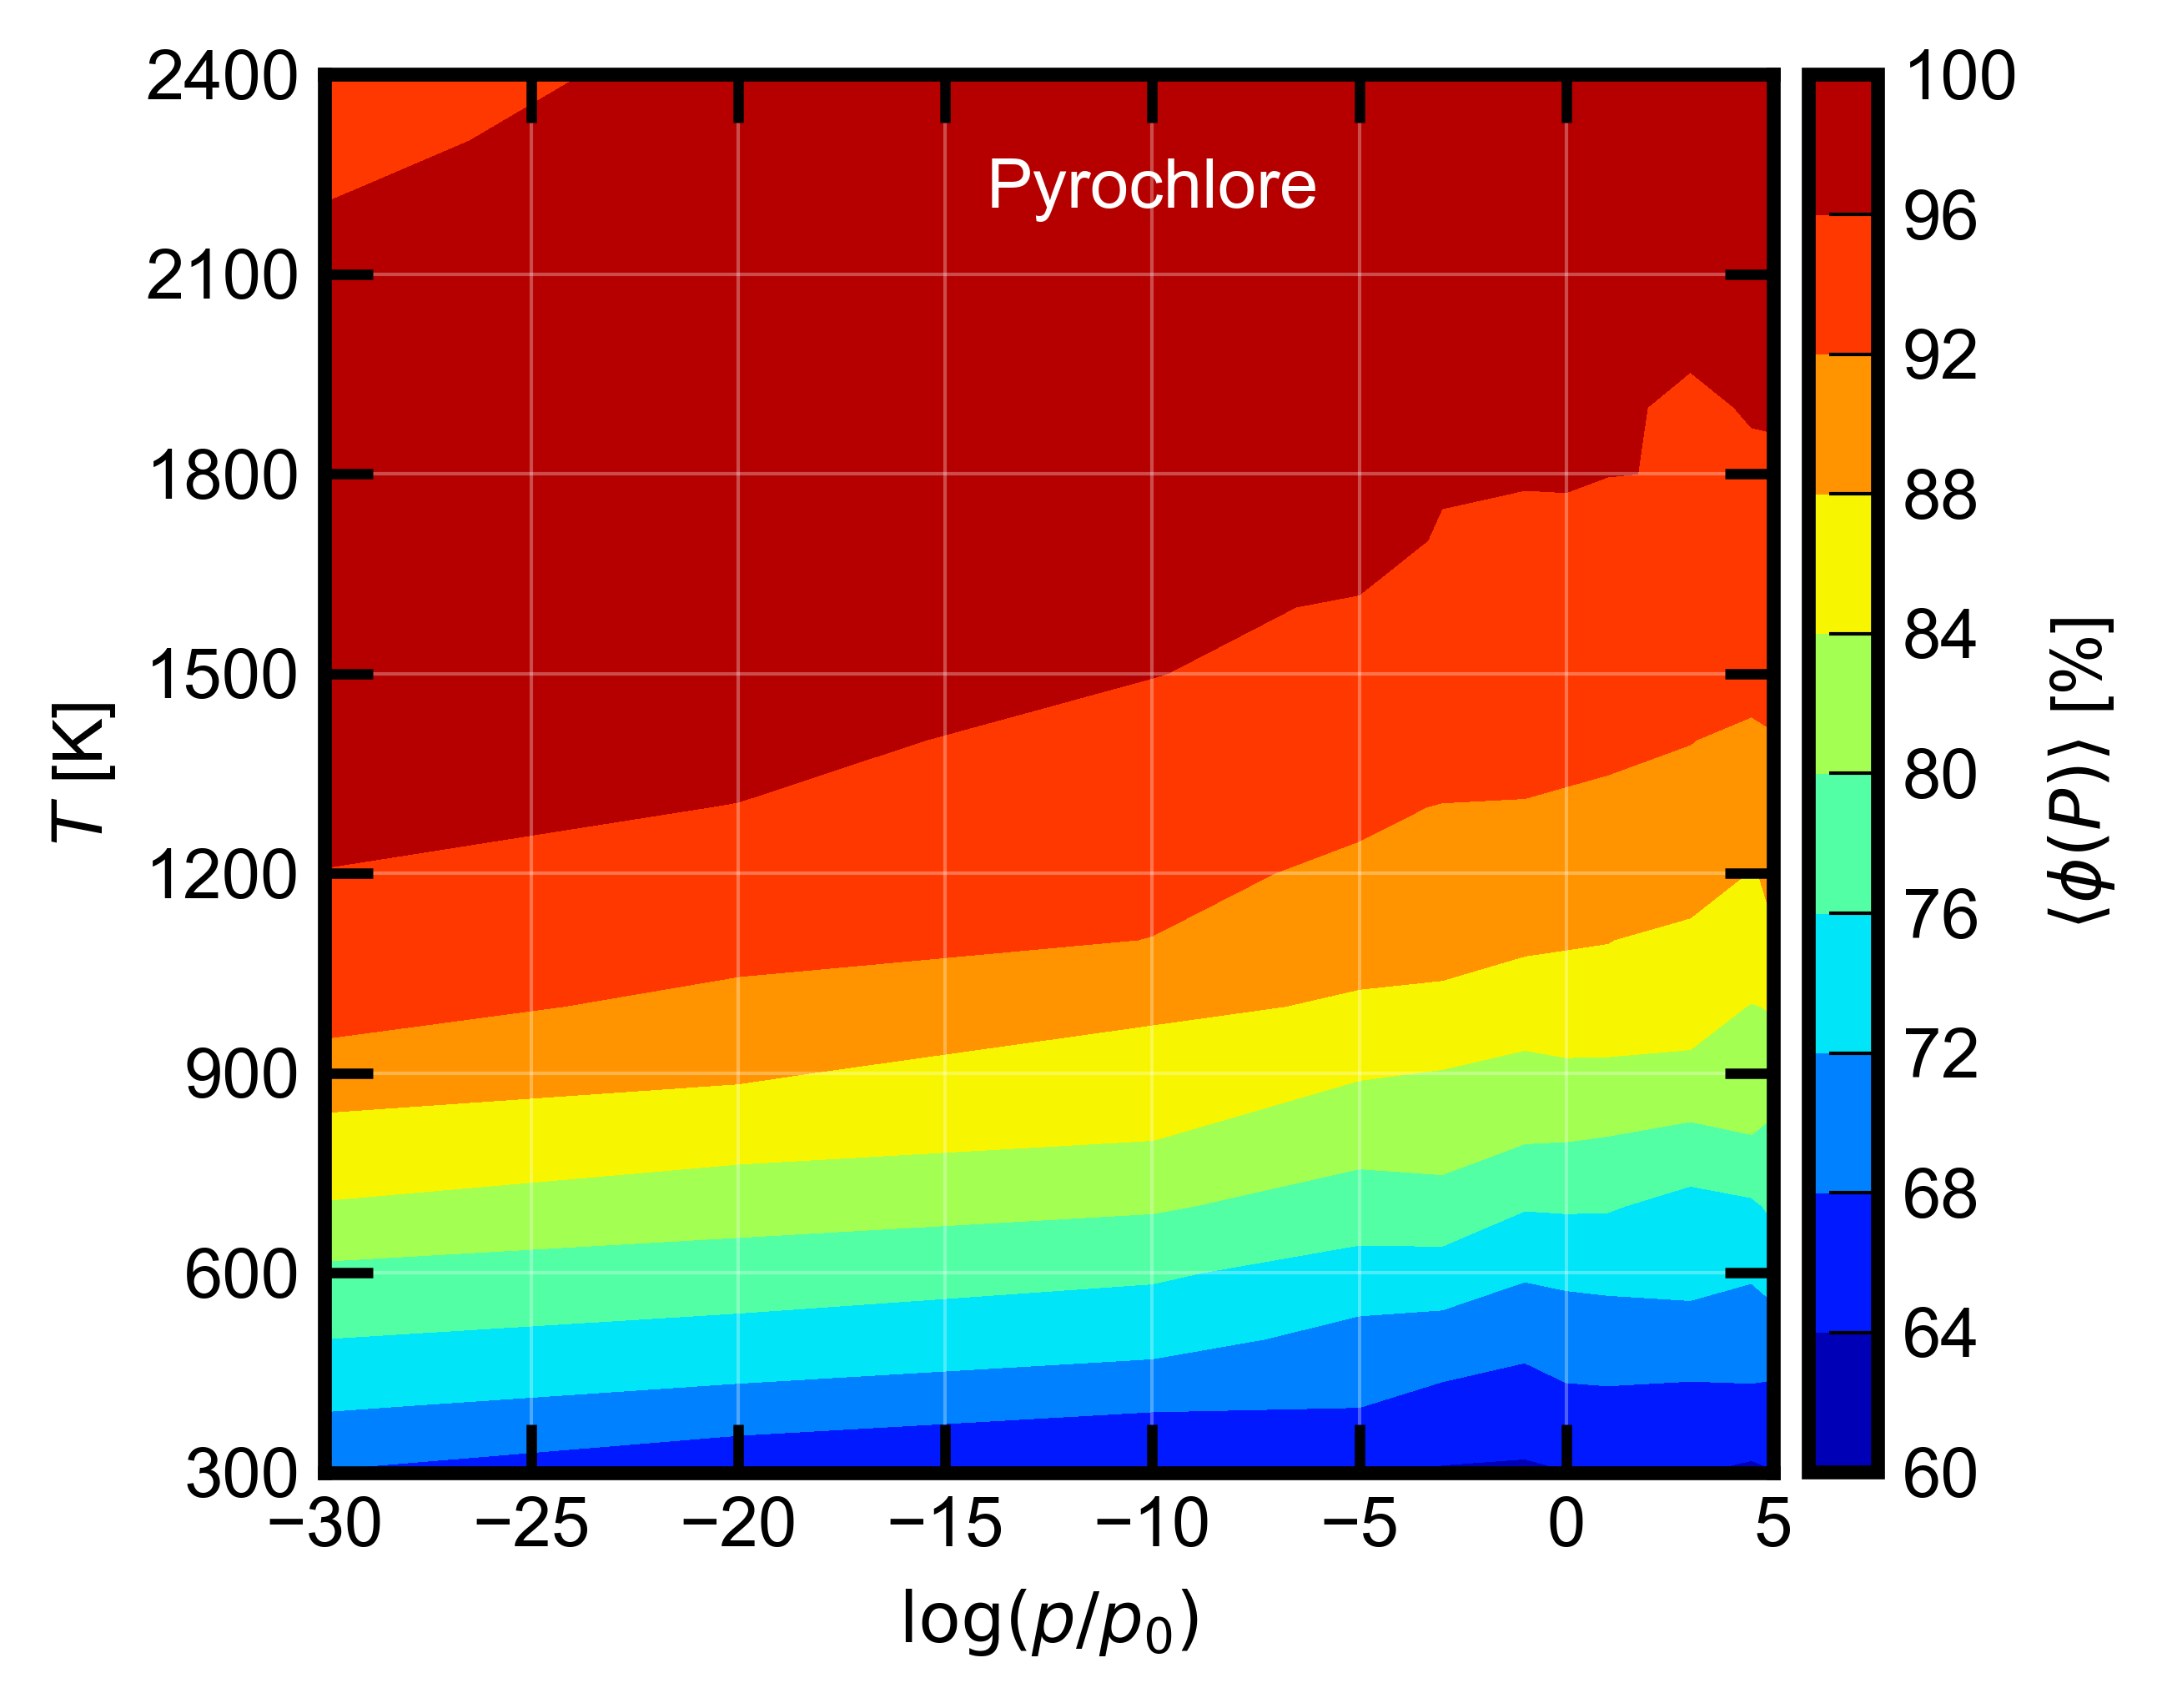

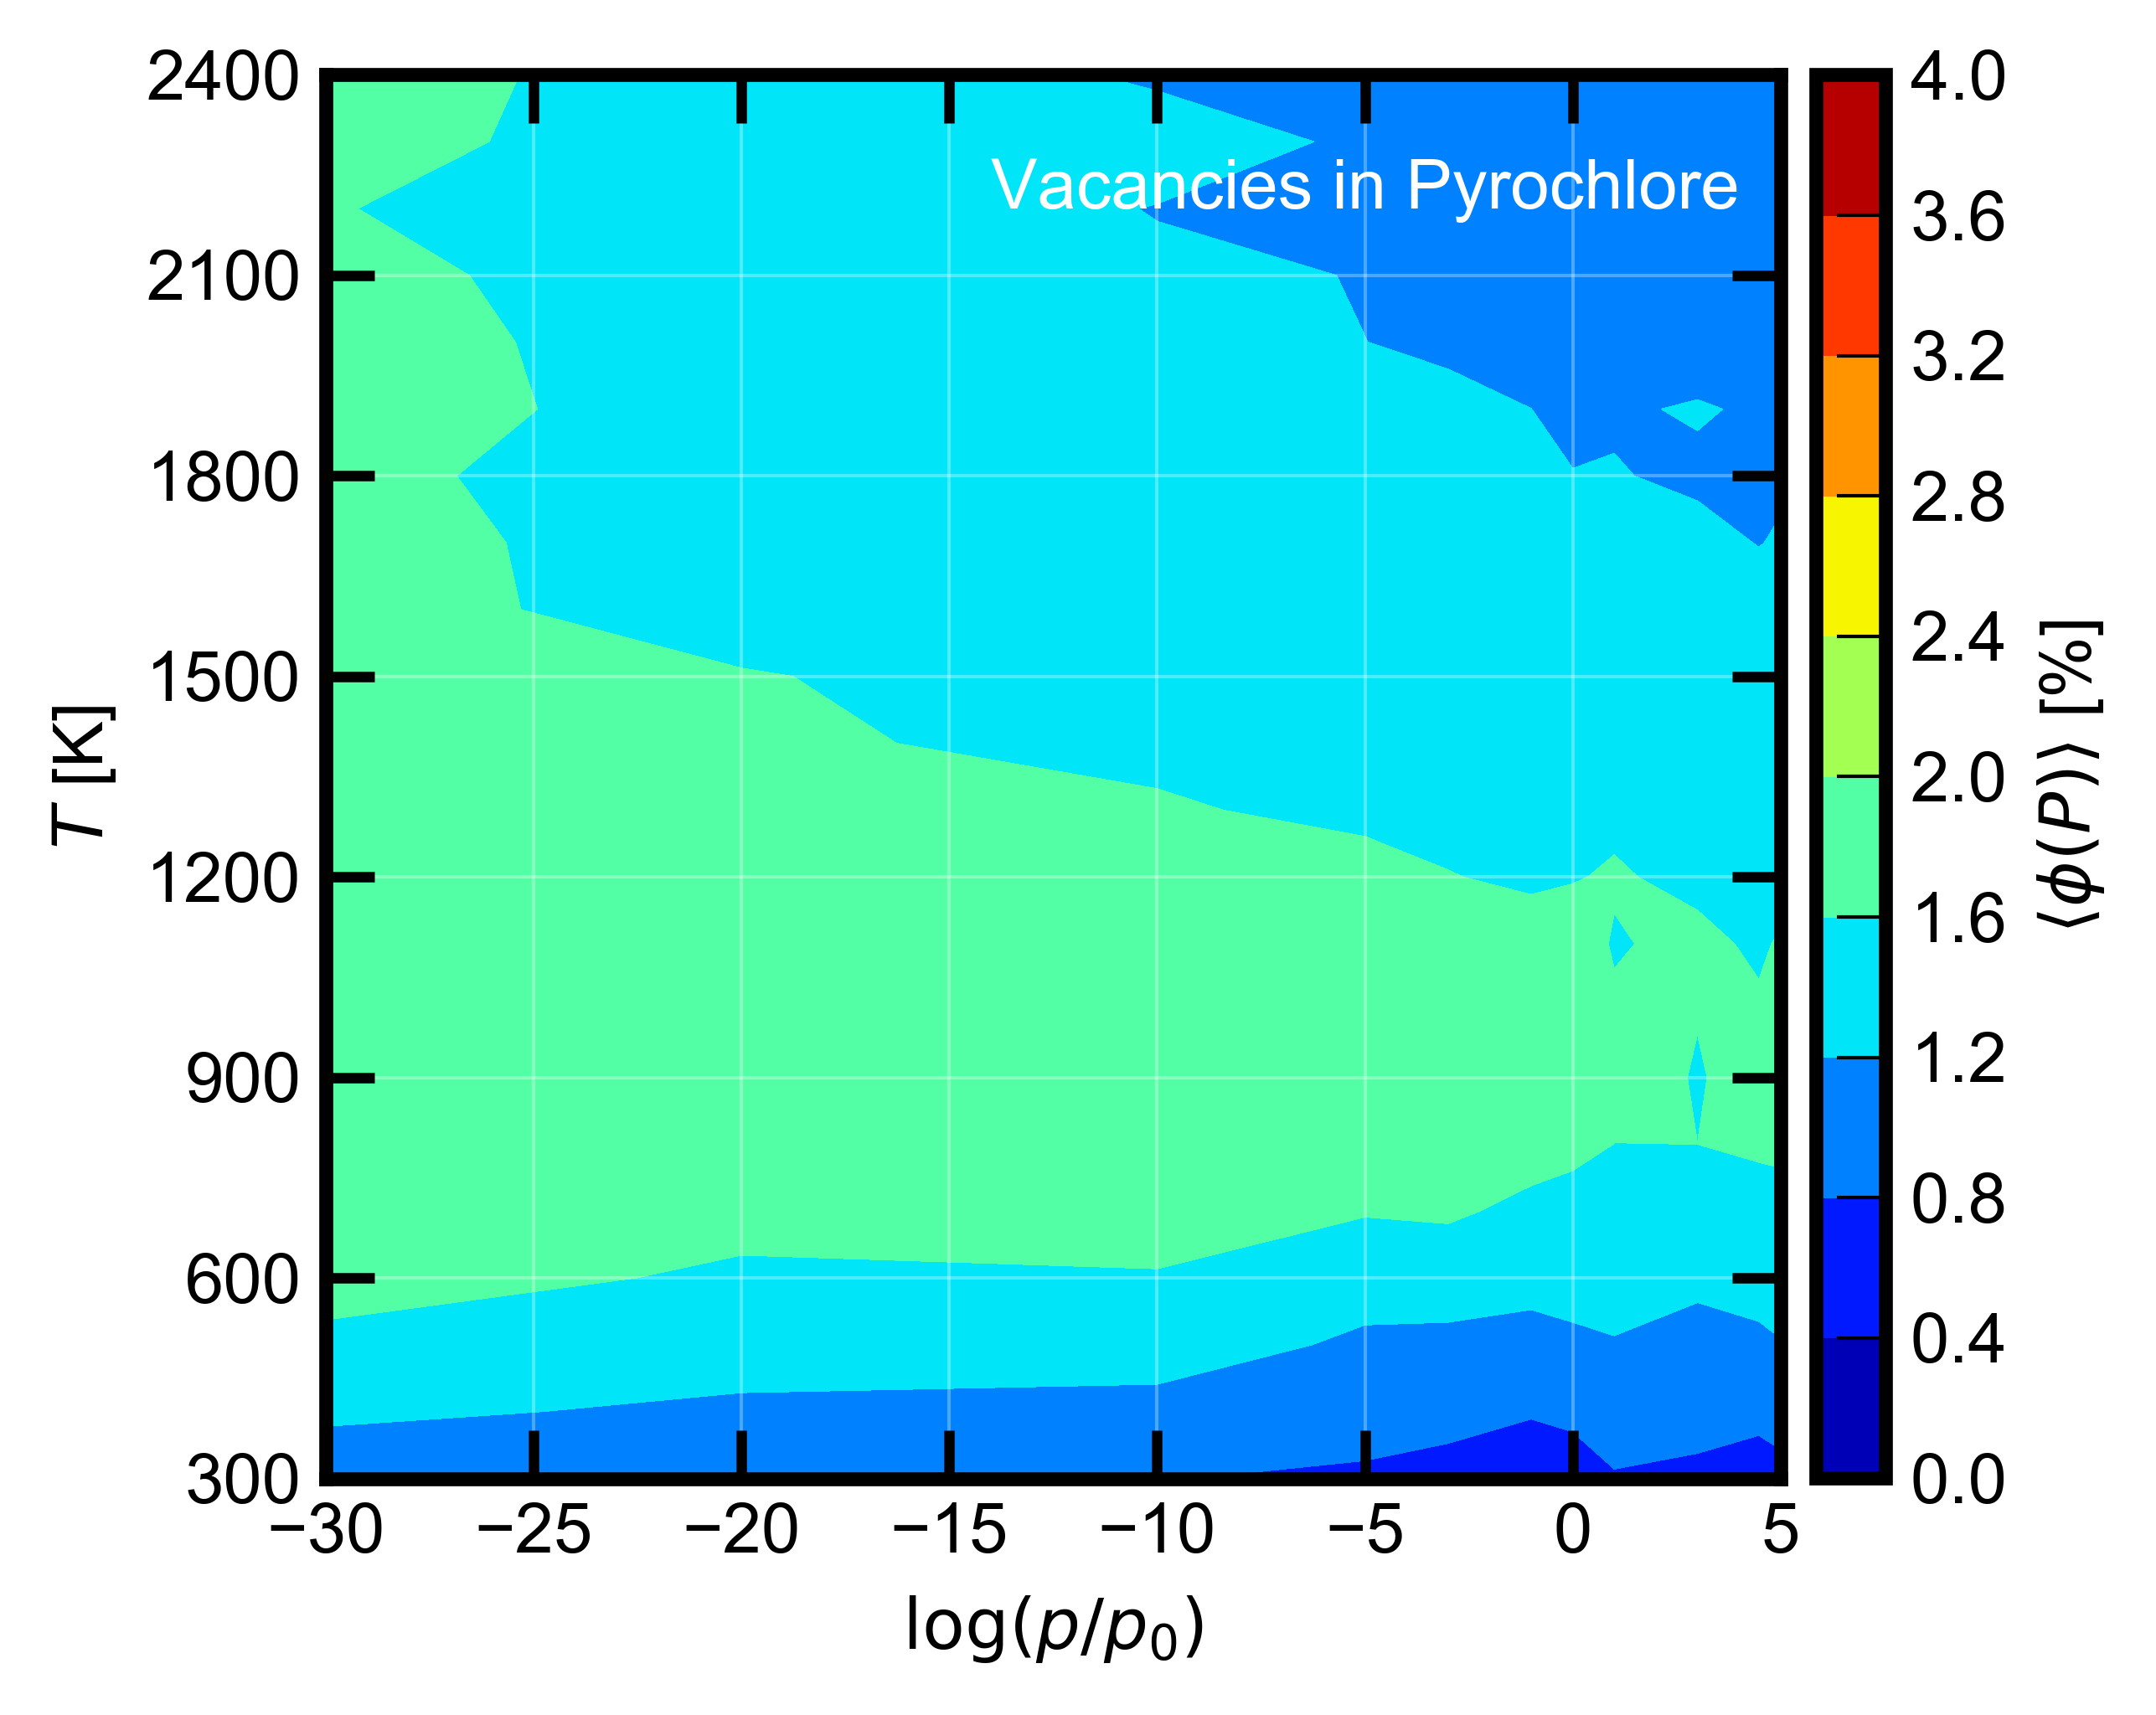

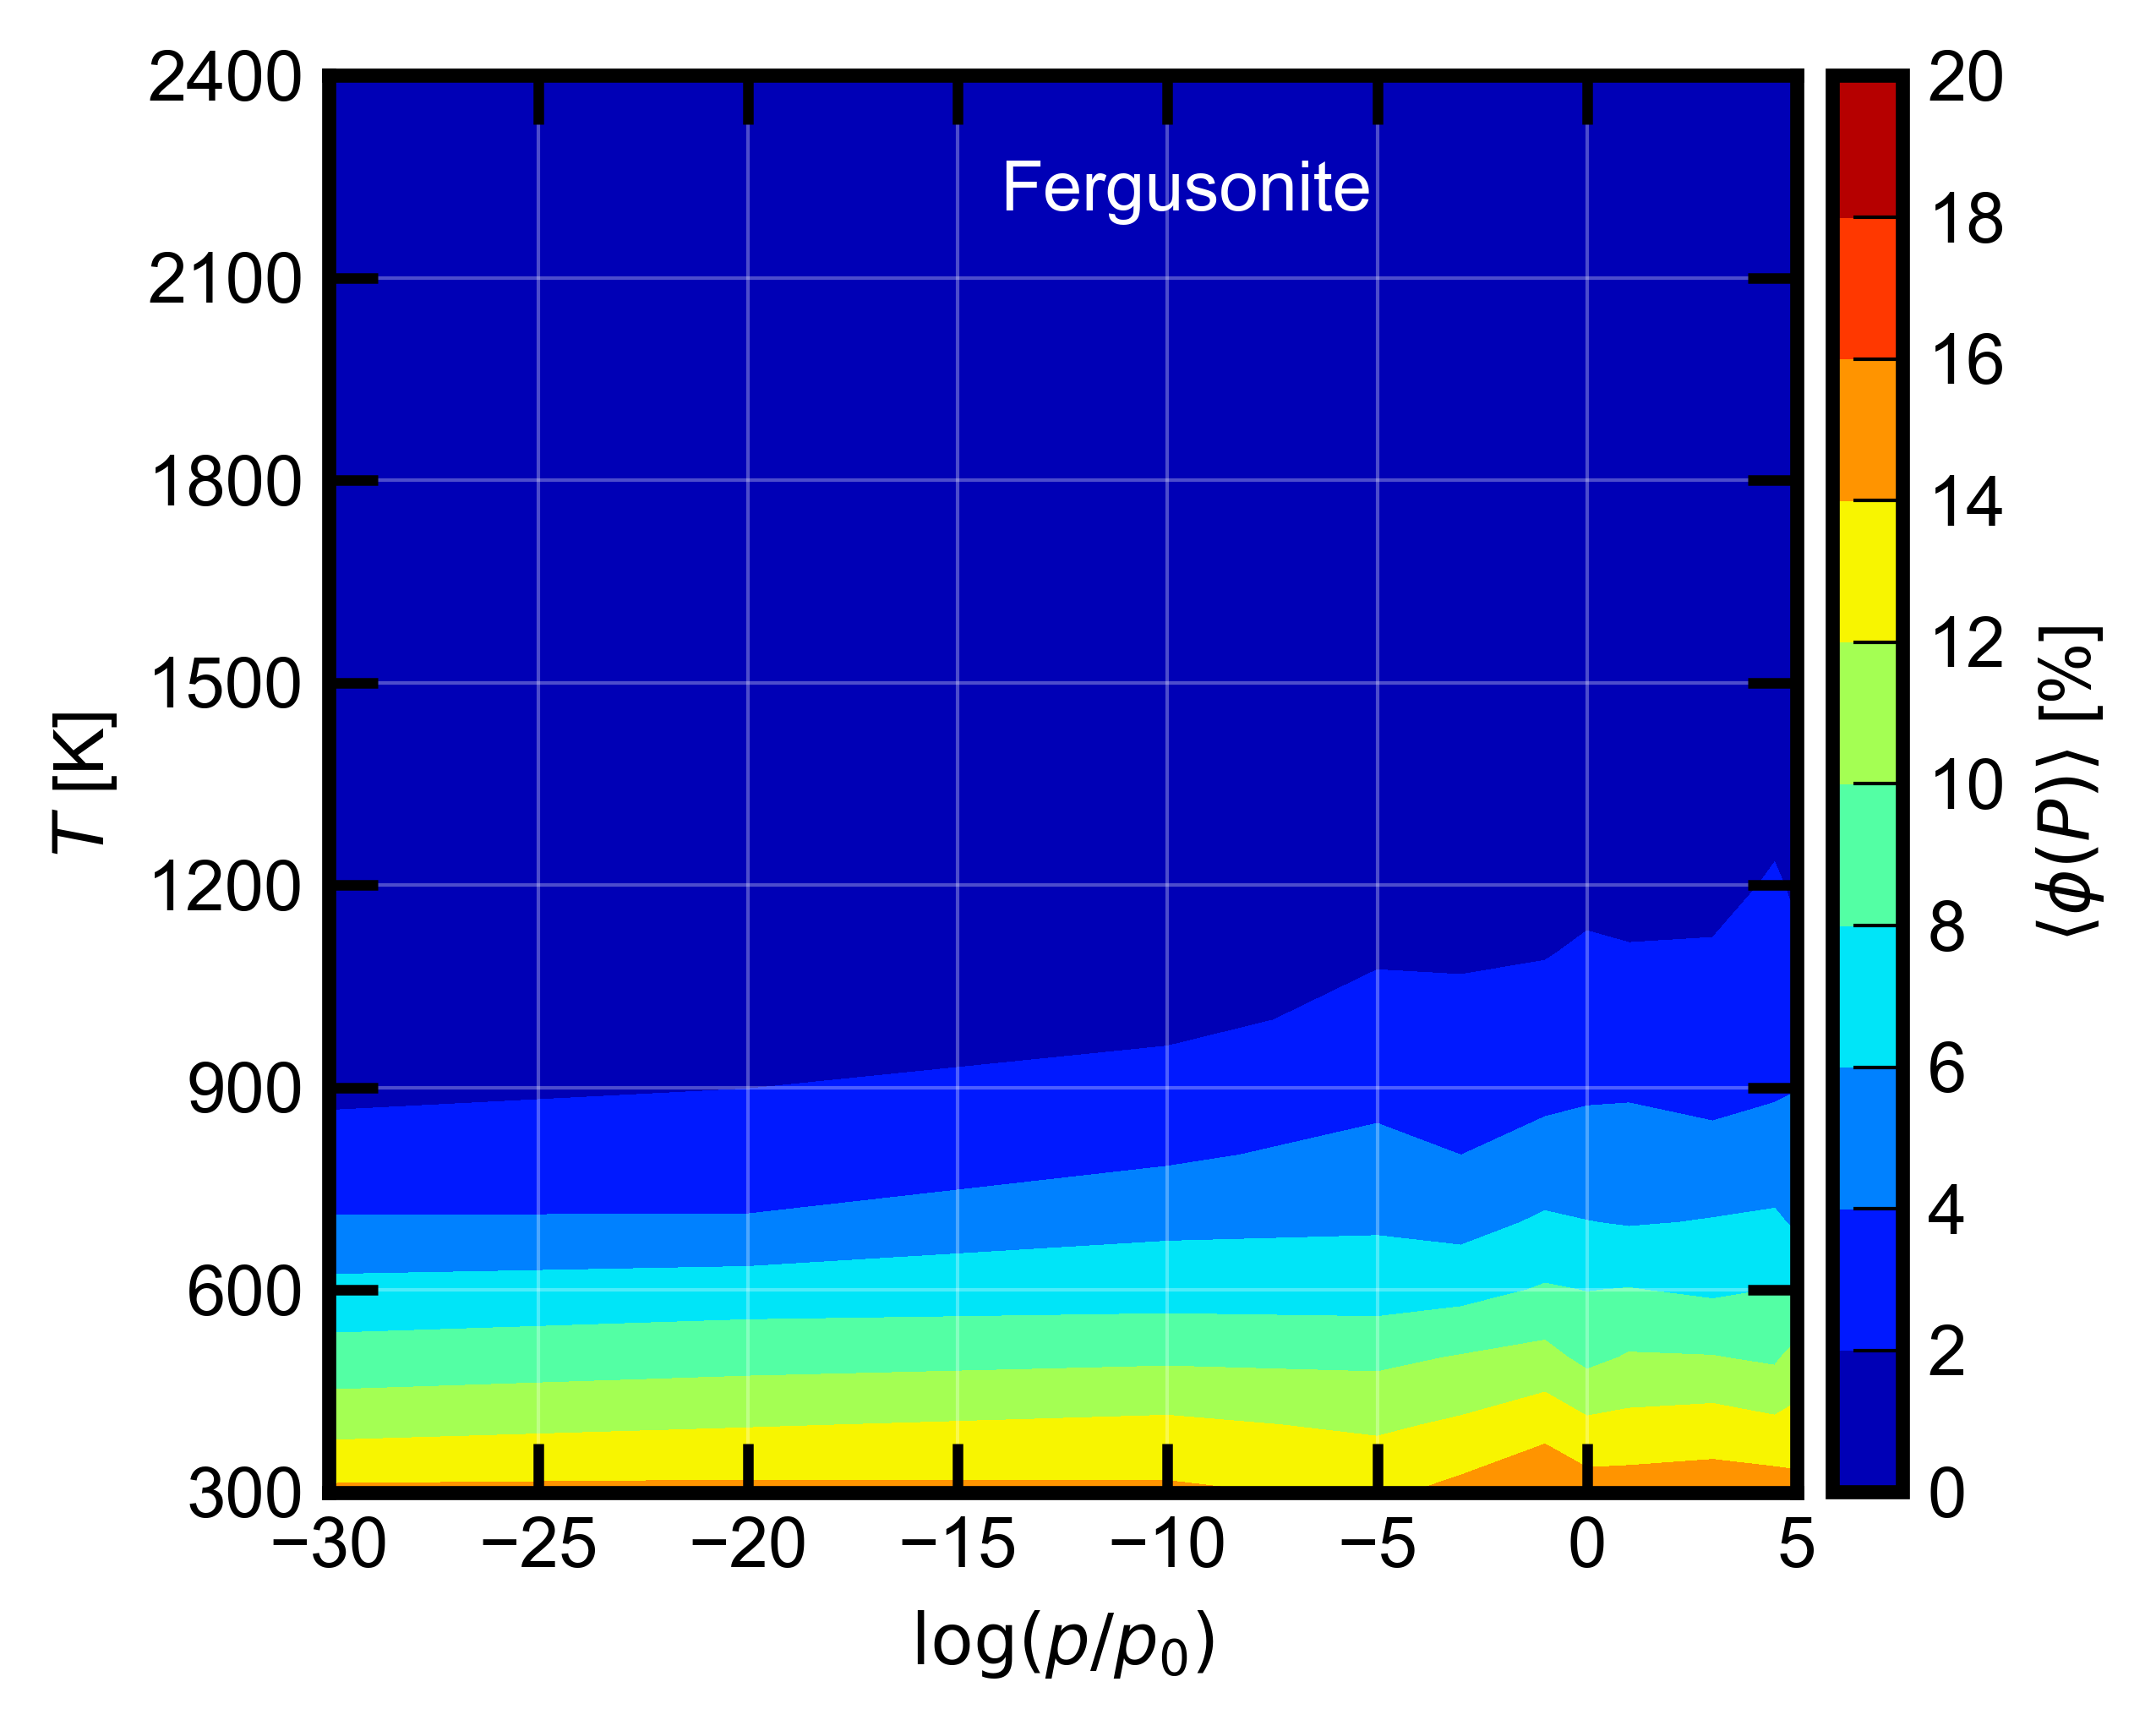

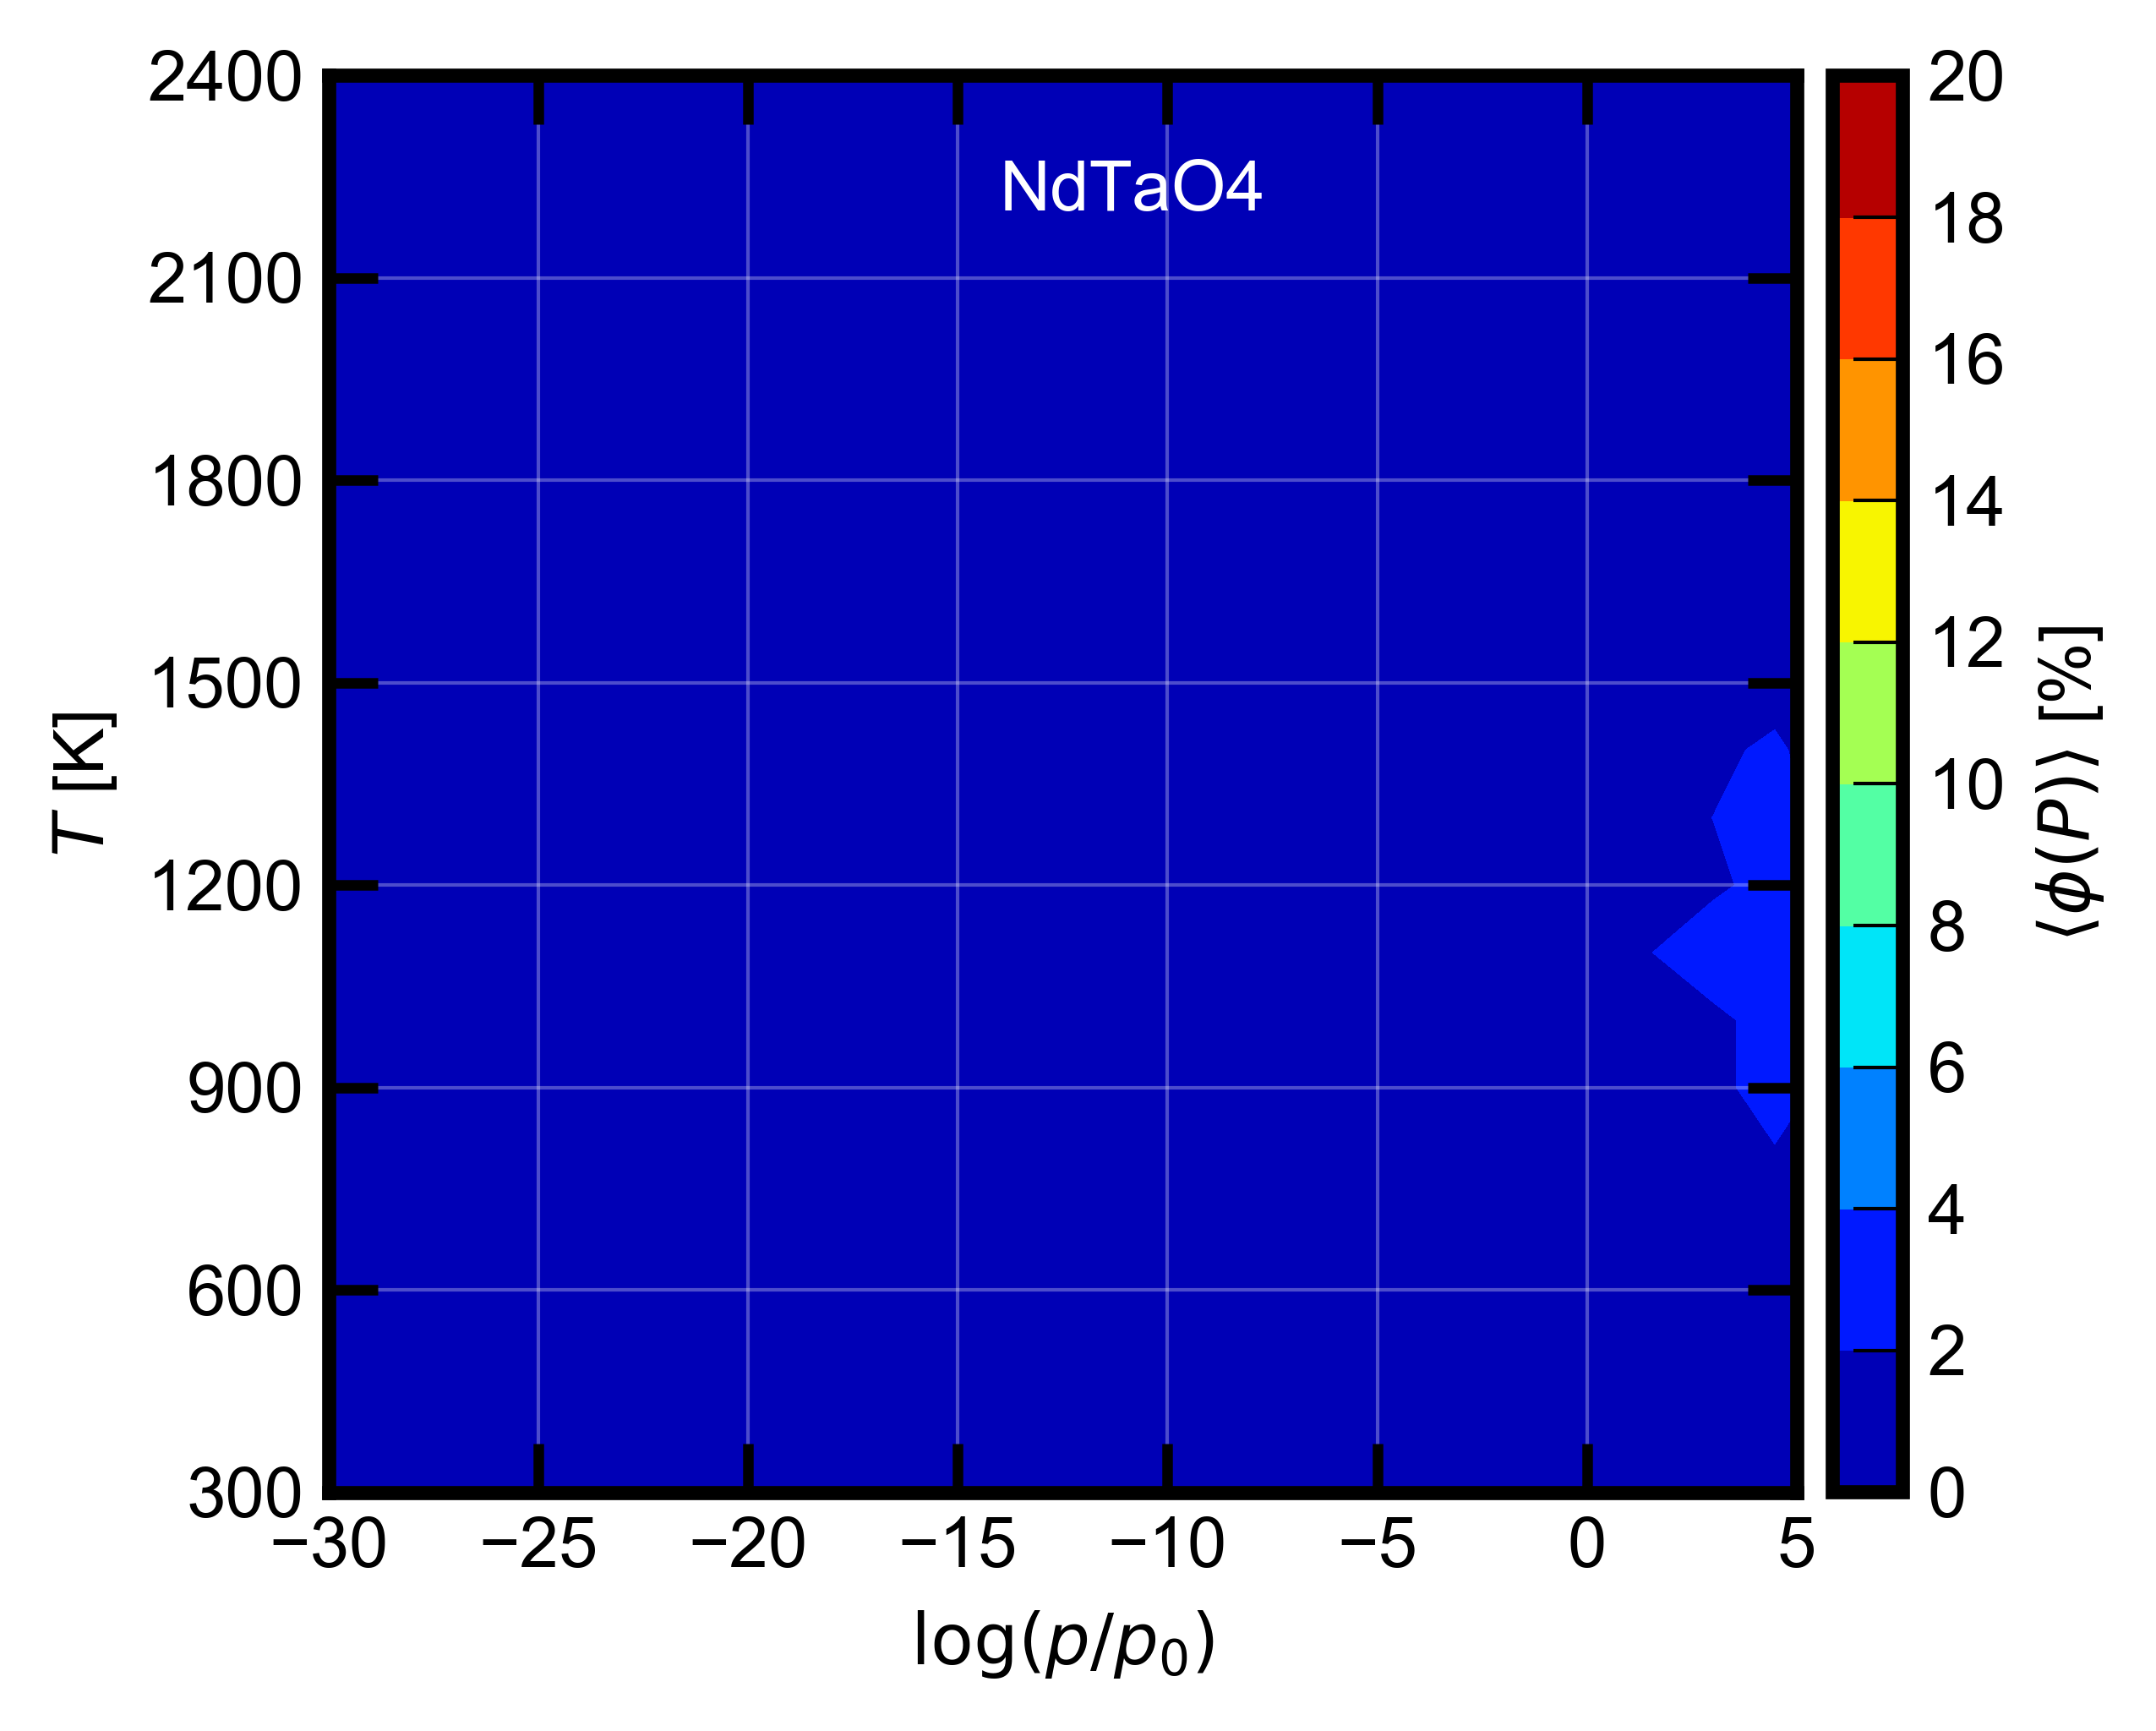

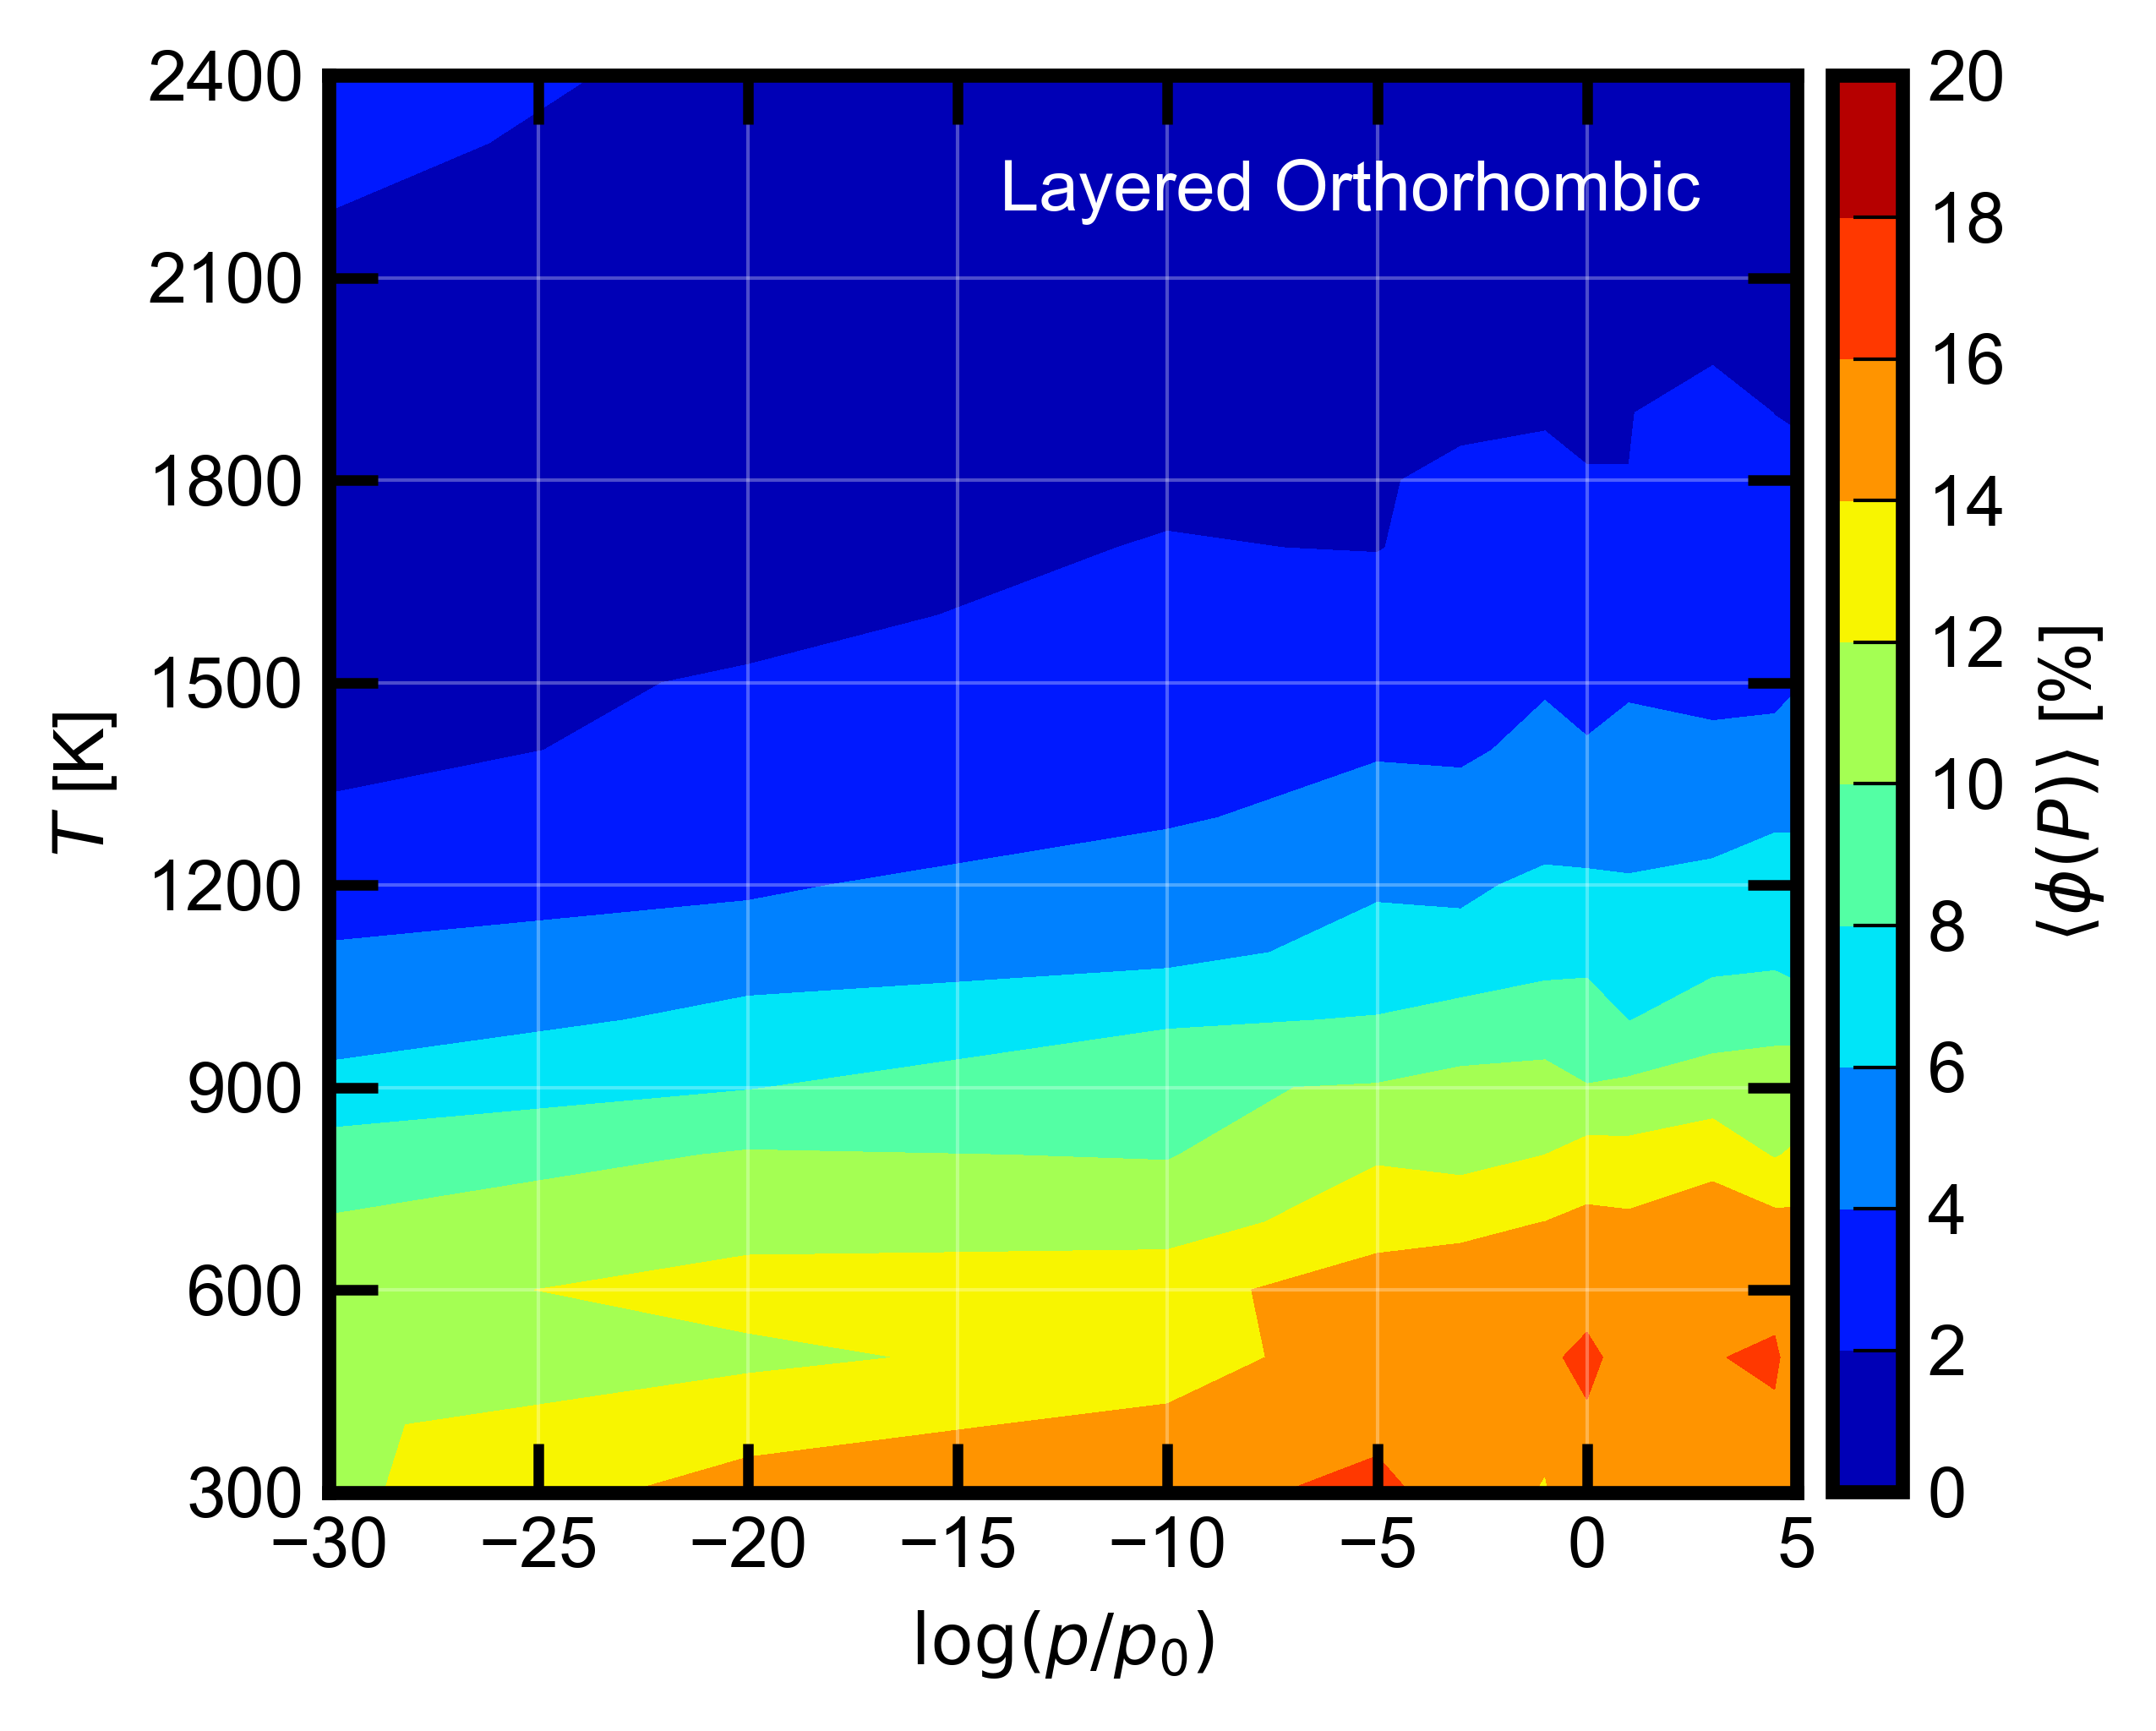

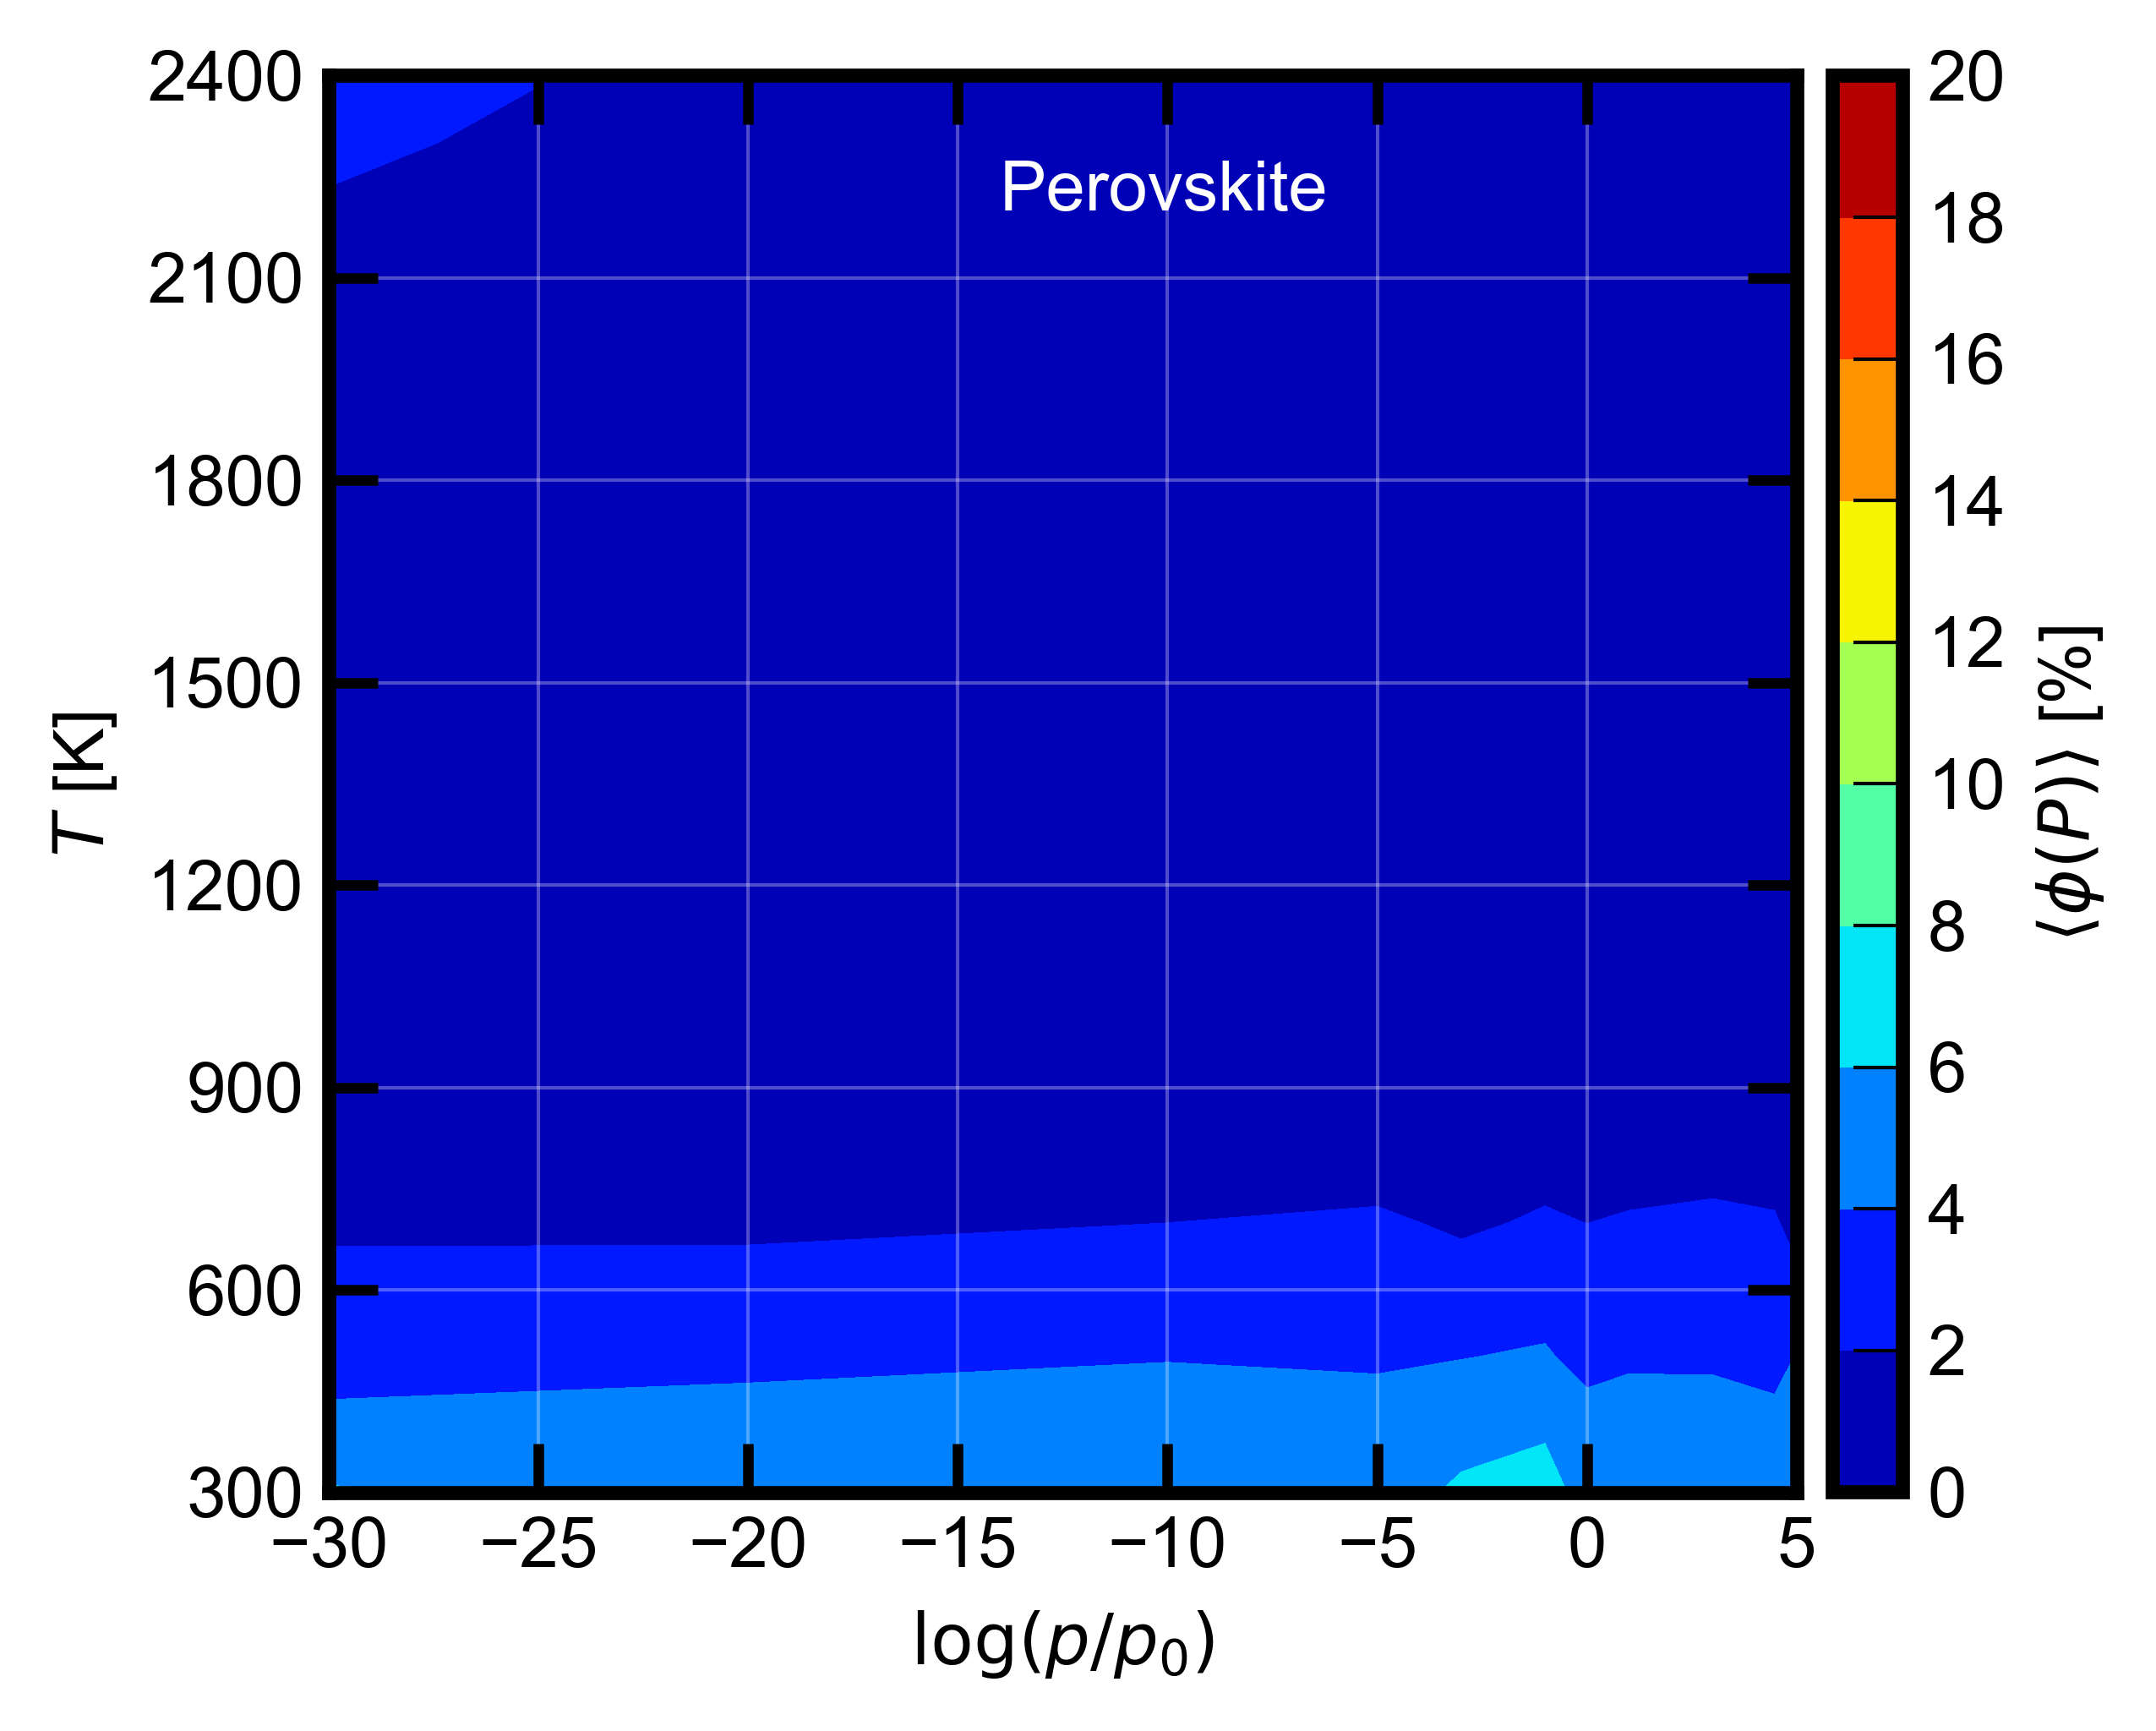

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


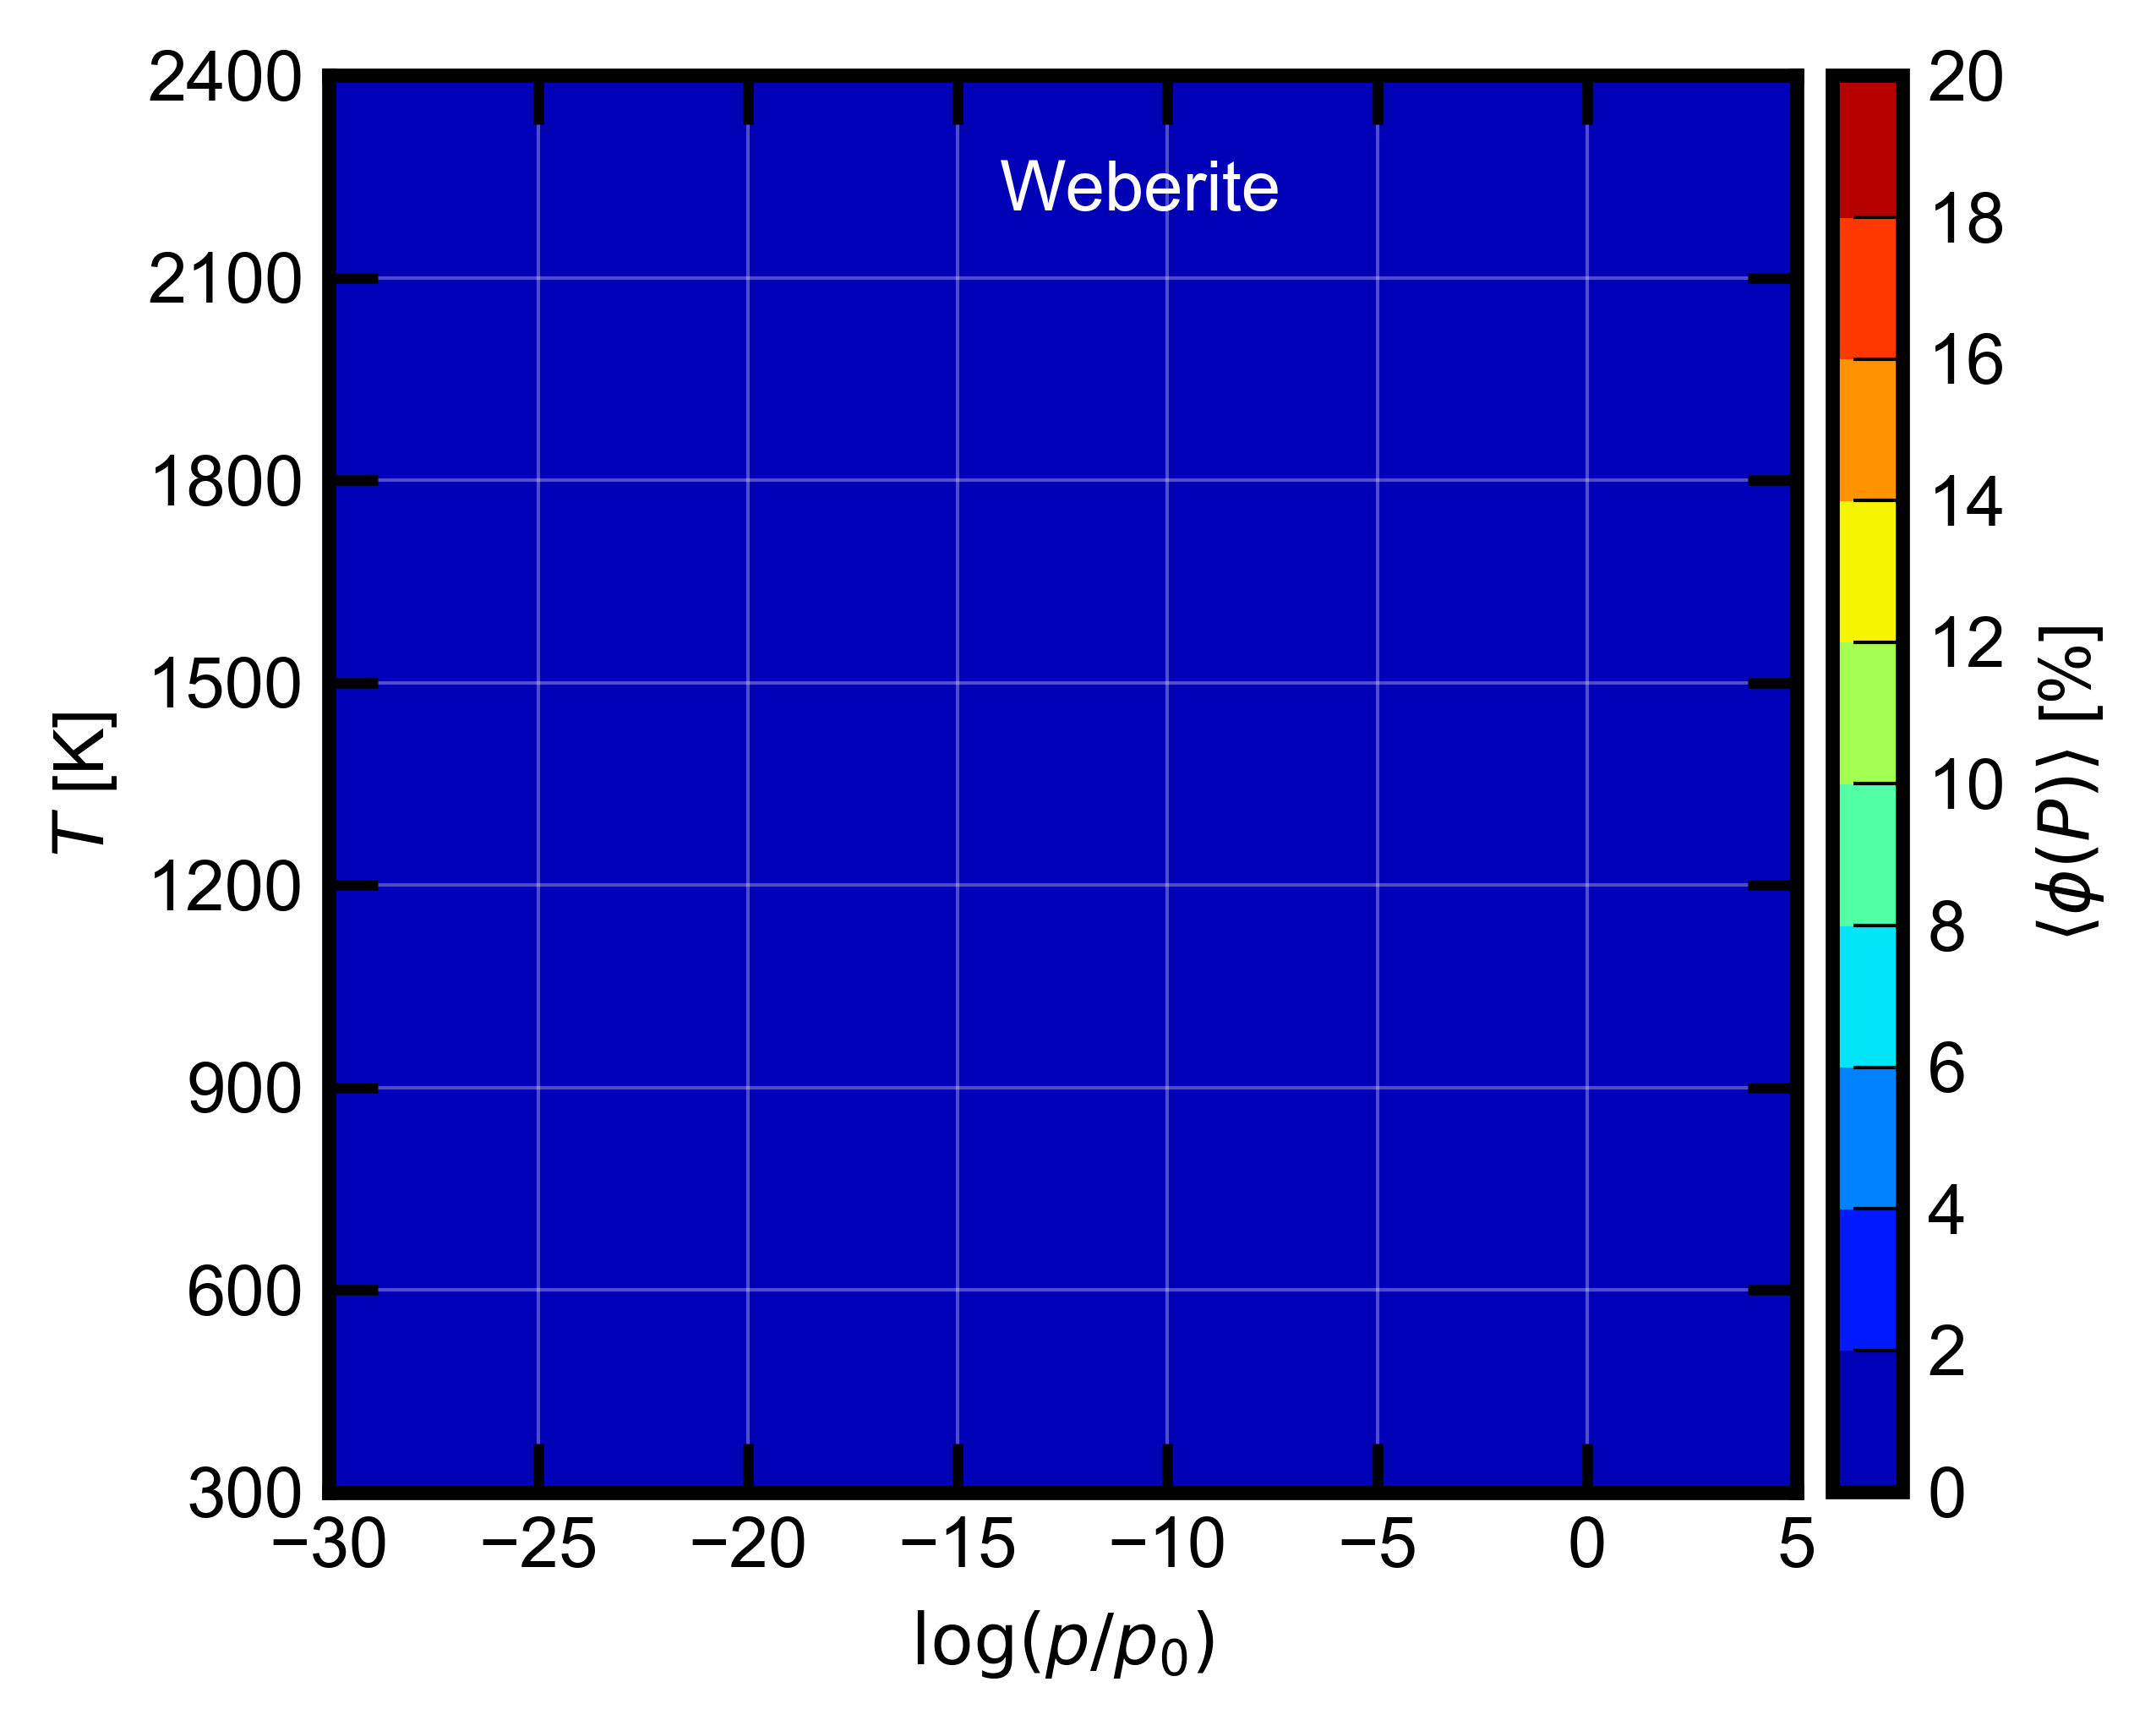

In [3]:
rcParams['axes.linewidth']   = 2
rcParams['figure.figsize']   = 4.5,3.7
rcParams['figure.dpi']       = 600

for it,val in enumerate(Z_phase):
    Z=val*100
    levels=np.arange(eMin[it],eMax[it]+eDiff[it],eDiff[it])
    ax=plt.axes()
    CTF=plt.contourf(X,Y,Z,levels,cmap='jet',vmin=eMin[it],vmax=eMax[it]) #cmap='jet'
    plt.xlabel('$\mathrm{log}(p/p_0)$')
    plt.ylabel('$T$ [K]')
    #ax.set_yscale('log')
    plt.ylim(300,2400)
    plt.yticks(np.arange(300,2500,300))
    plt.xticks(np.arange(-30,10,5))
    plt.text(-14,2200,phaseNames[it],color='W')
    ax.xaxis.grid(True, linewidth=0.5, alpha=0.3,color='w')
    ax.yaxis.grid(True, linewidth=0.5, alpha=0.3,color='w')
    plt.tick_params(labeltop=False, labelright=False, 
                    bottom=True, top=True, left=True, right=True, 
                    axis='both',direction='in')
    plt.colorbar(orientation='vertical',
                     ticks=levels,
                     spacing='uniform',
                     pad=0.02,
                     shrink=1,#norm=norm,
                     label='$\\langle \phi(P) \\rangle$ [%]').ax.tick_params(axis='y', direction='in',width=0.5)
    CS=plt.contour(np.log10(Y),X,Z,levels,colors=('k',),linestyles=('-.','--'),vmin=eMin[it],vmax=eMax[it]) #vmin=0.0,vmax=1.4,
    ax.clabel(CS, inline=1, fontsize=10)
    plt.clim(eMin[it], eMax[it])
    plt.show()

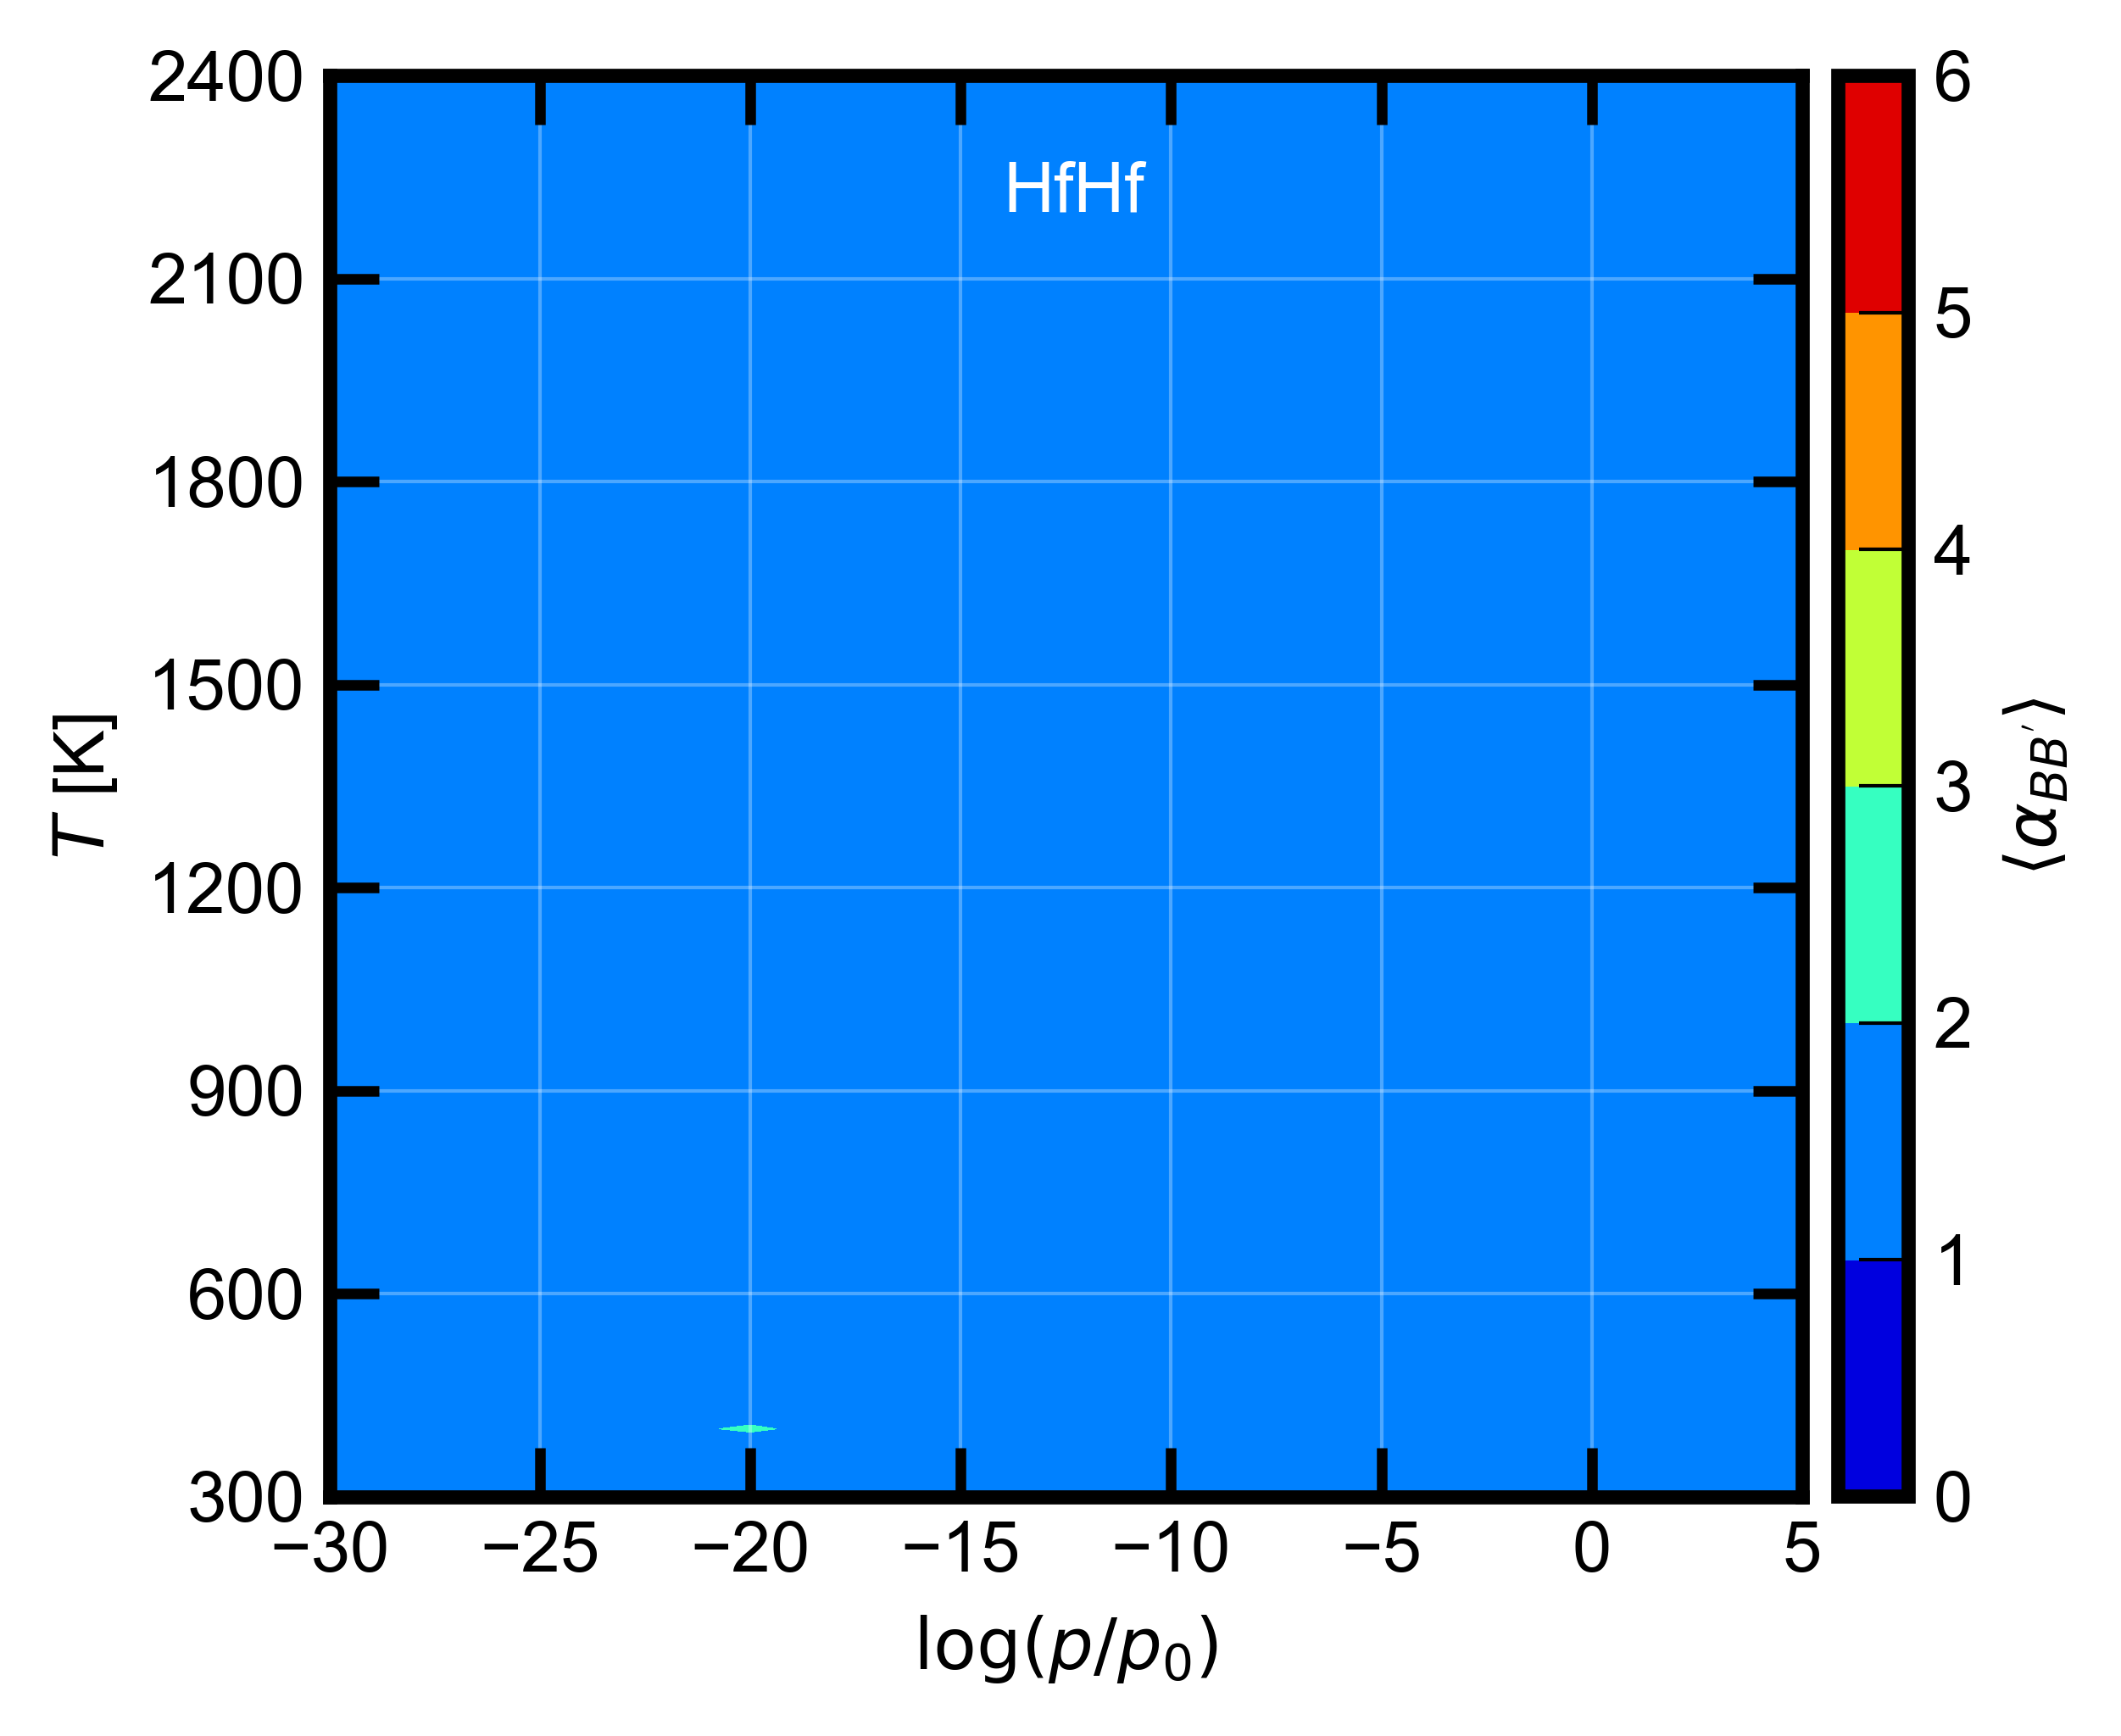

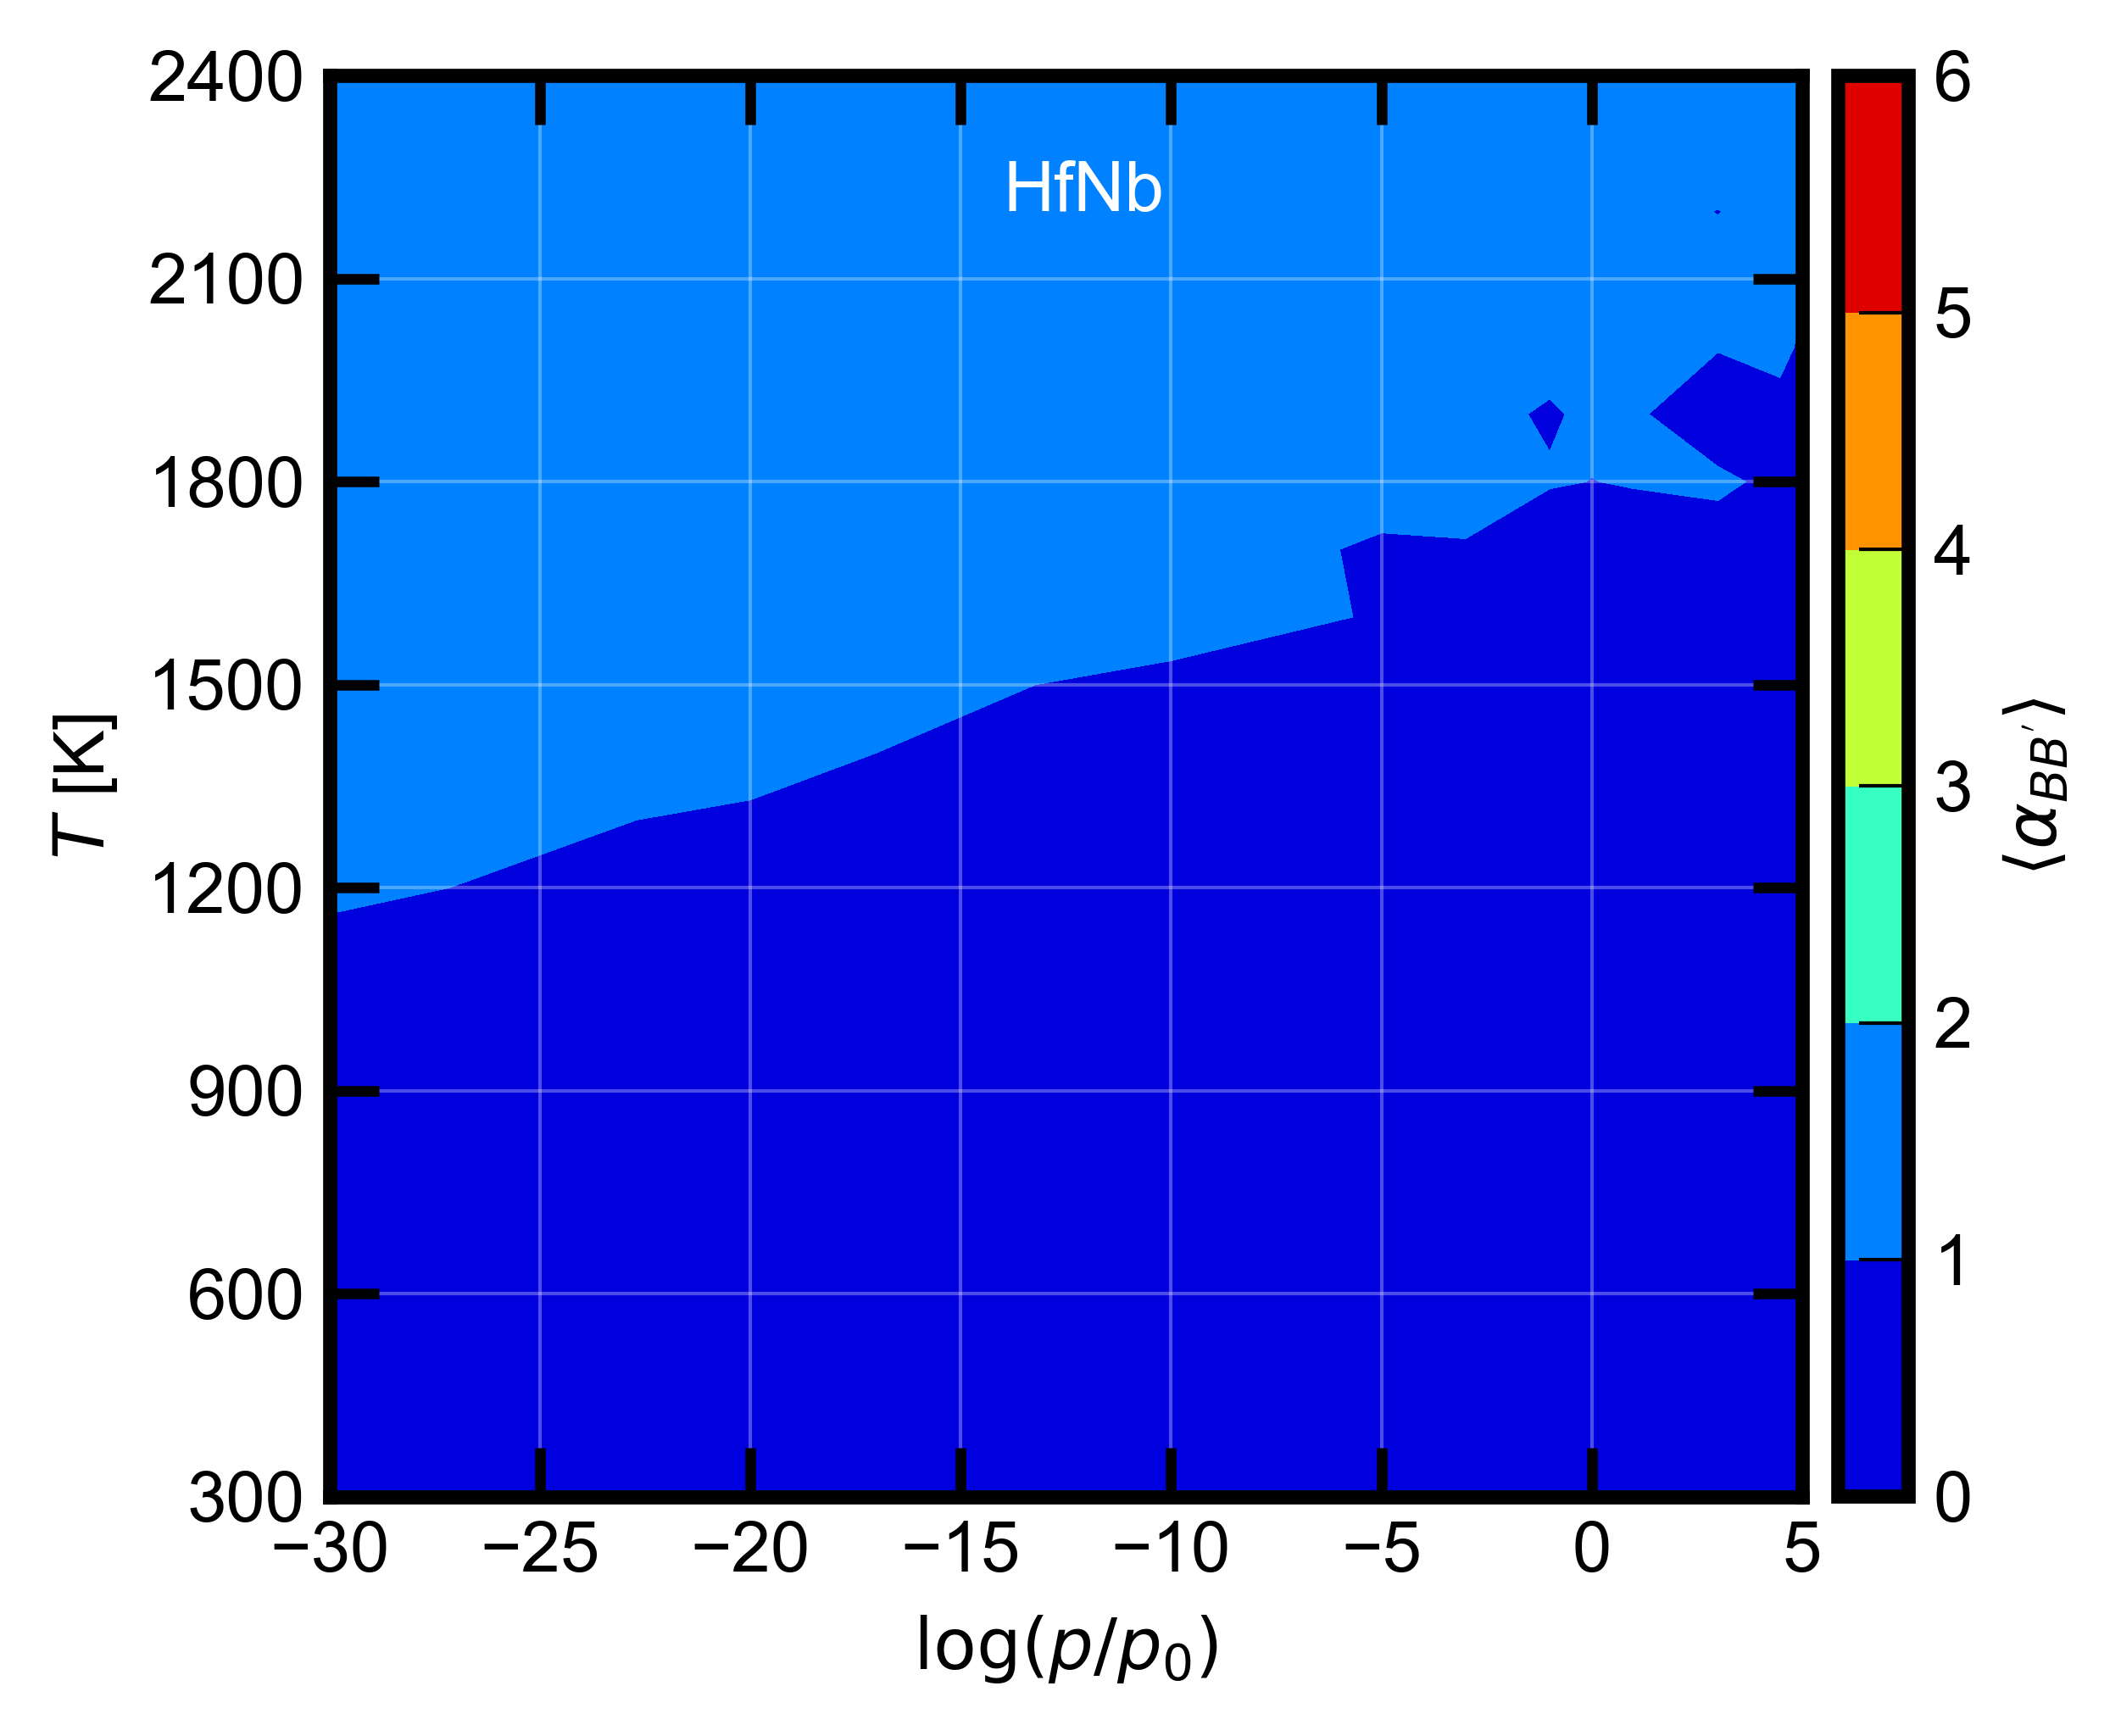

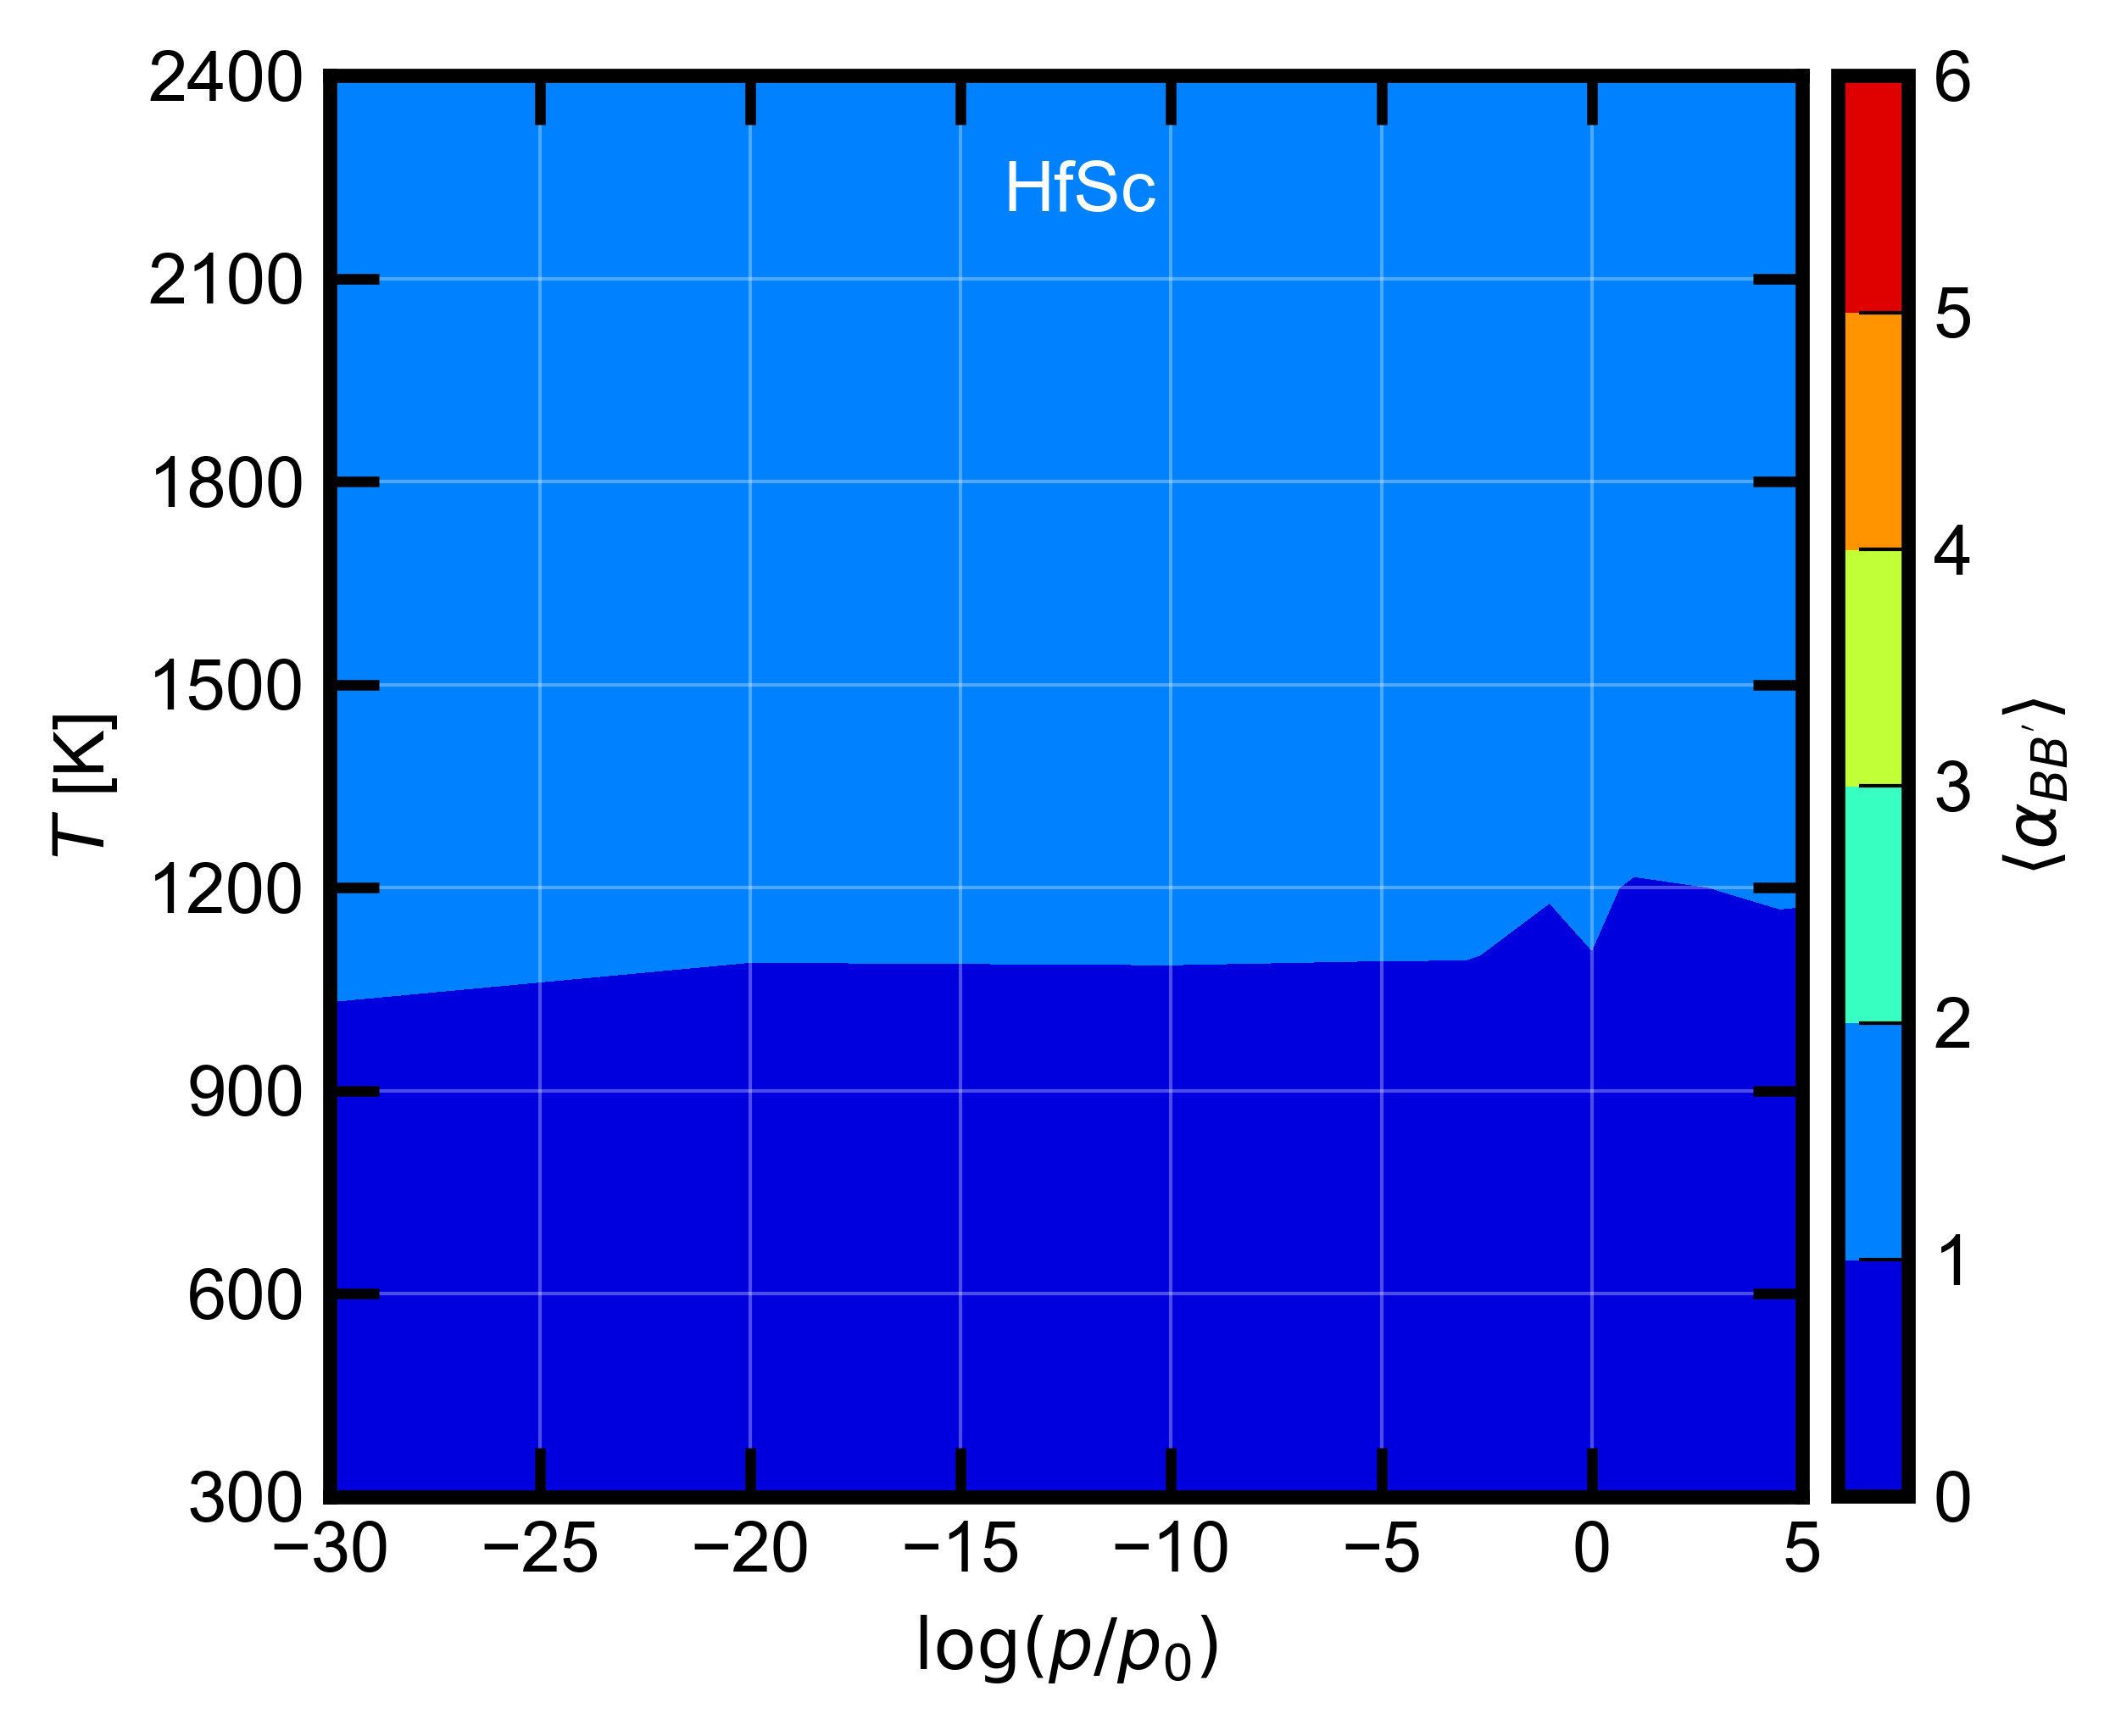

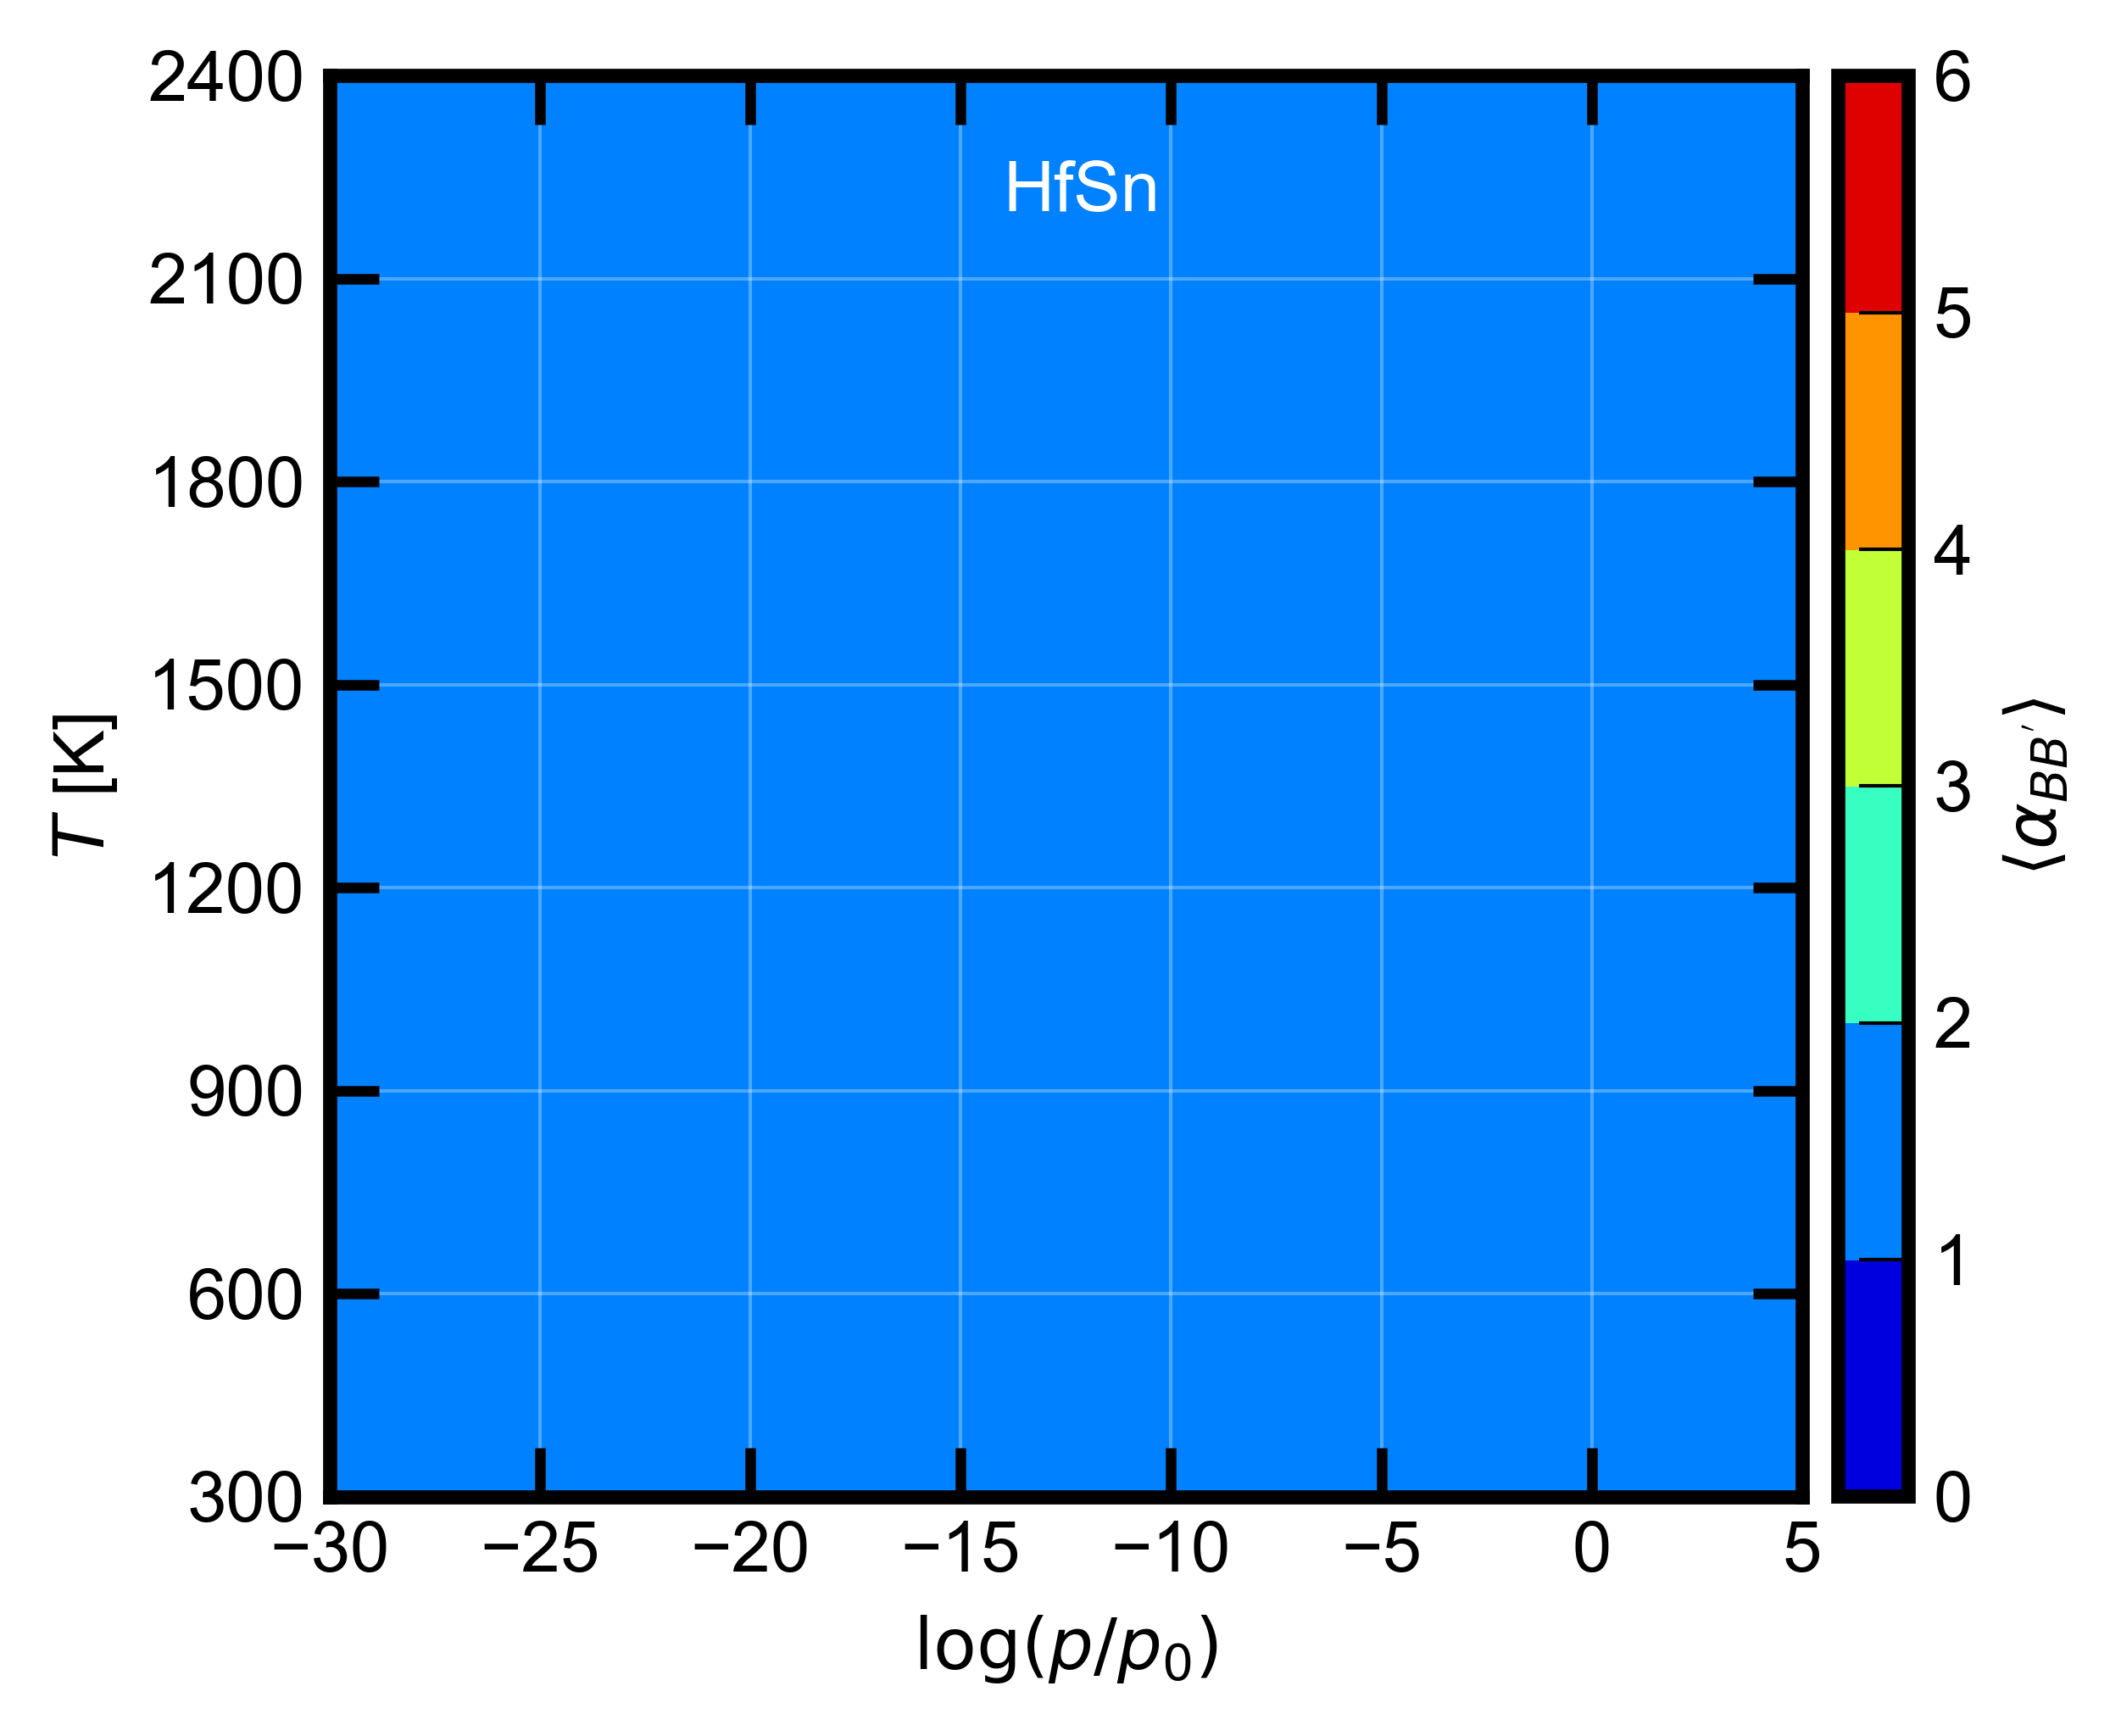

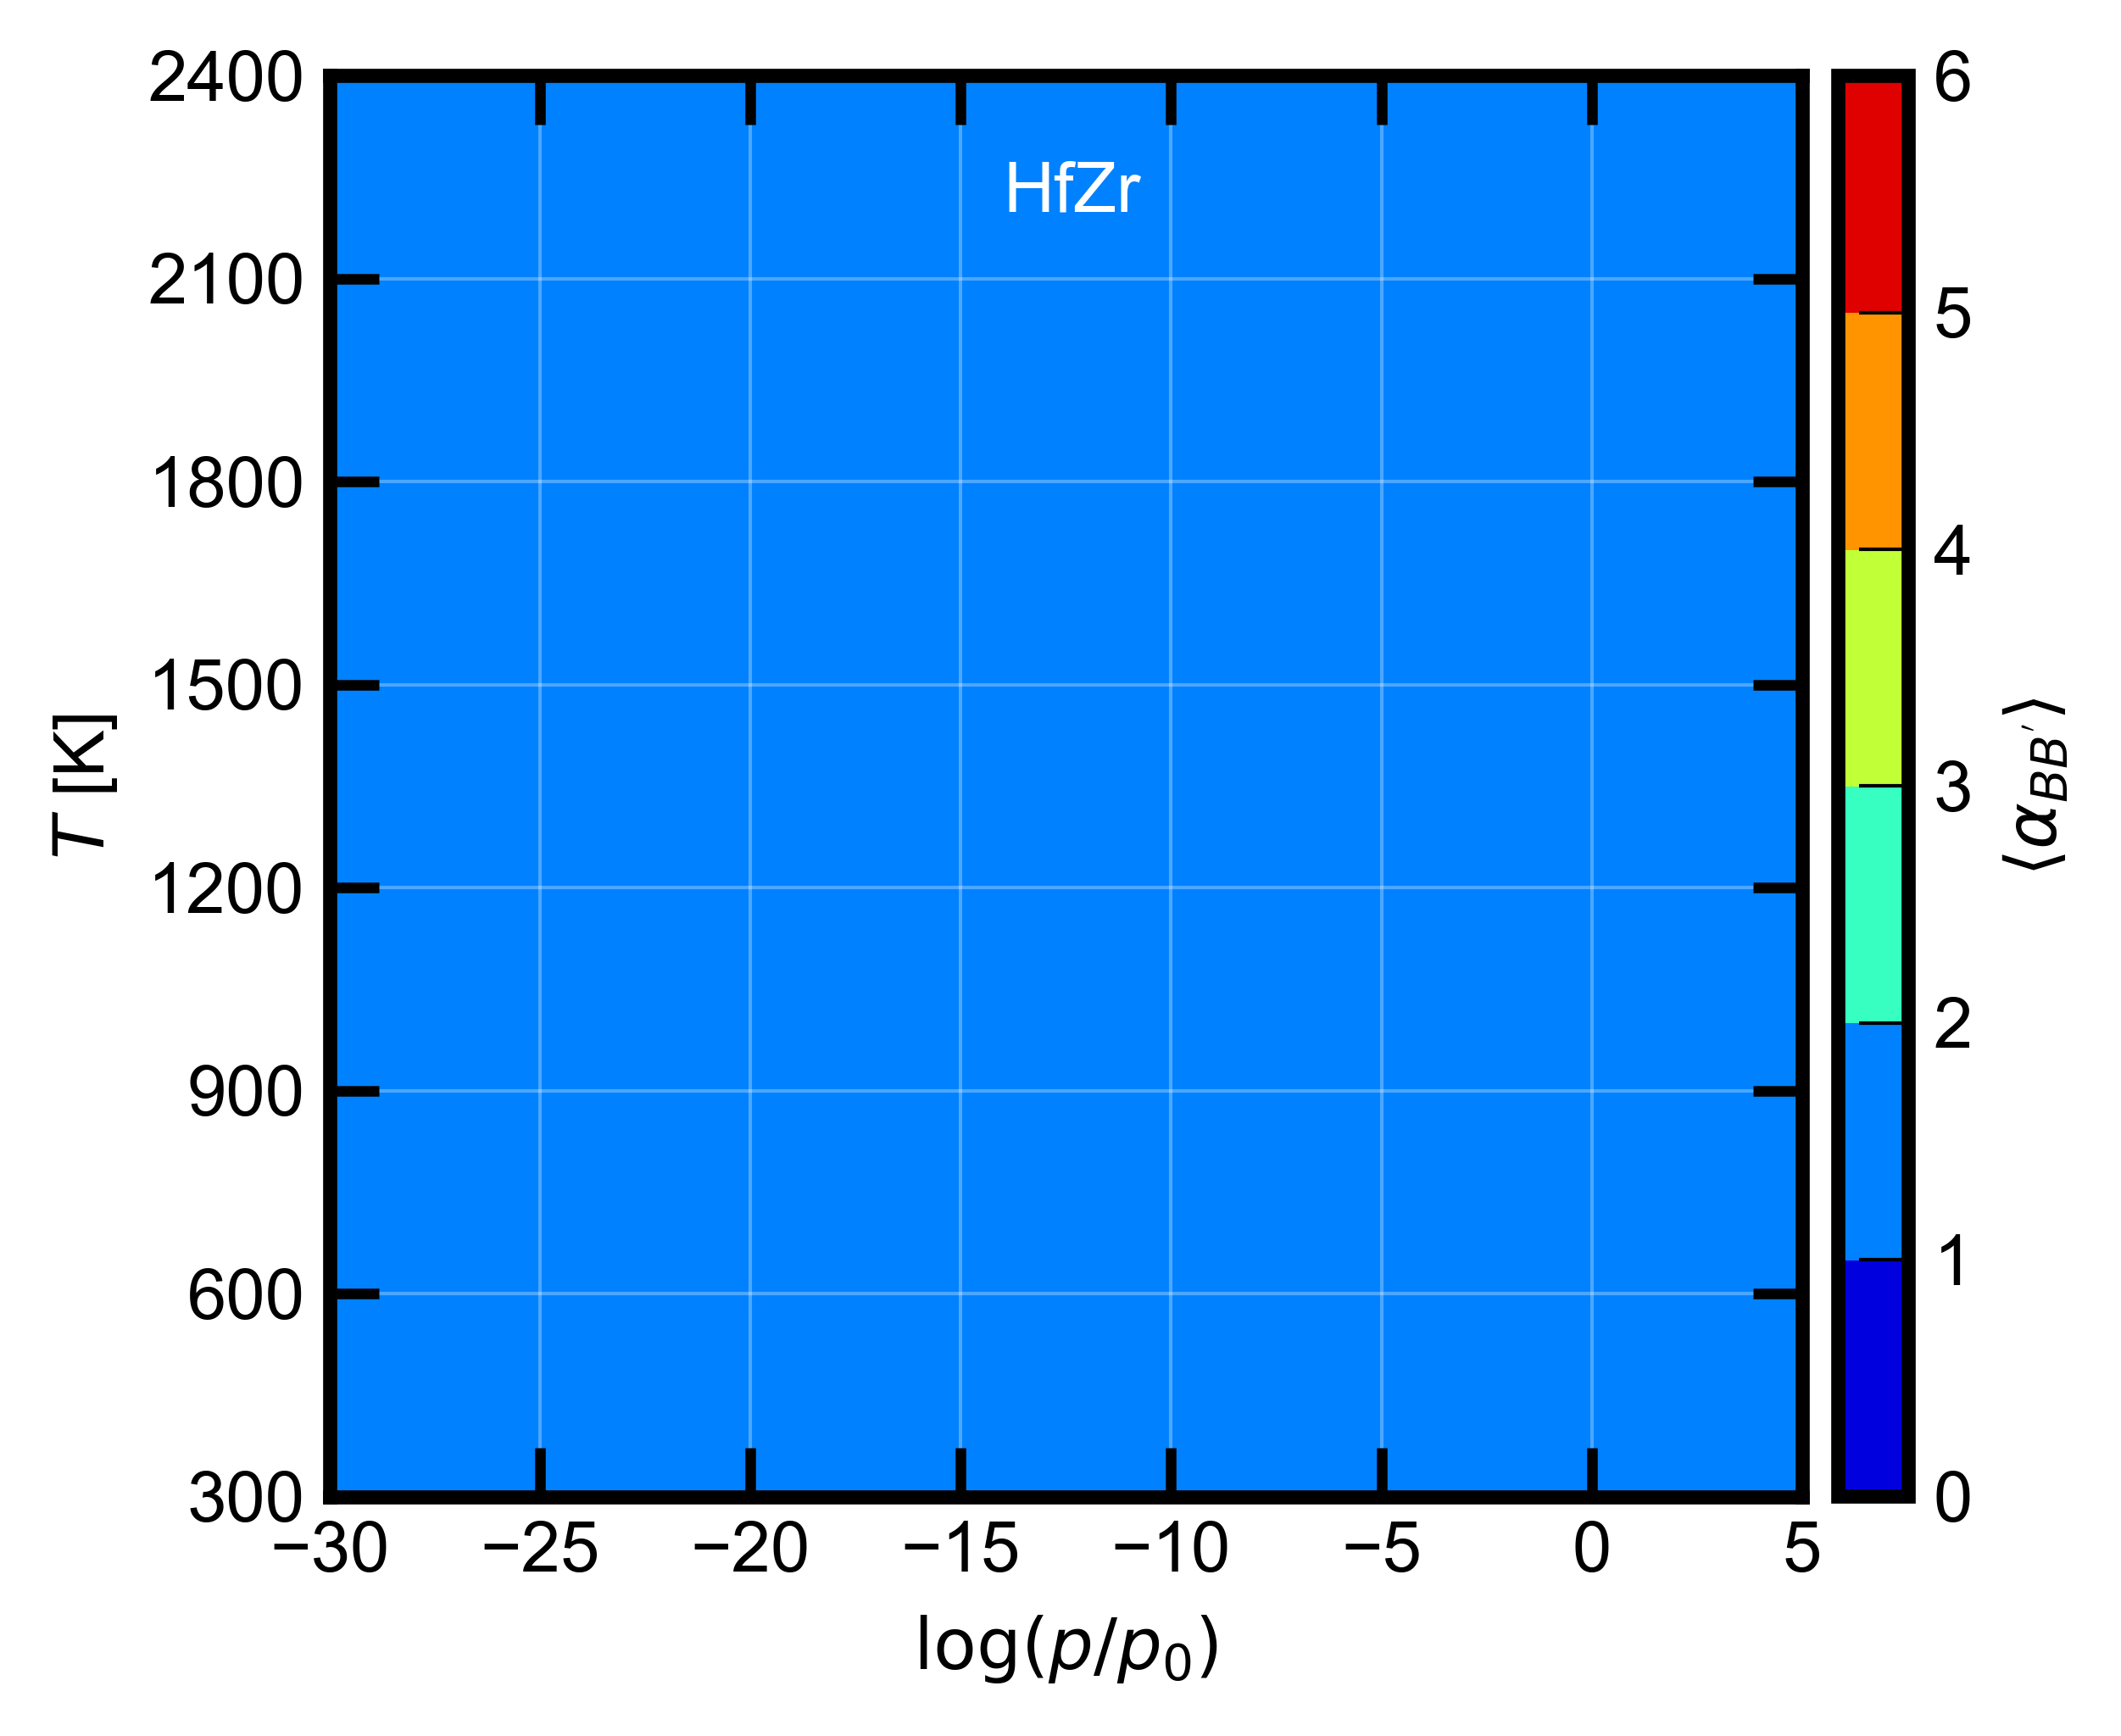

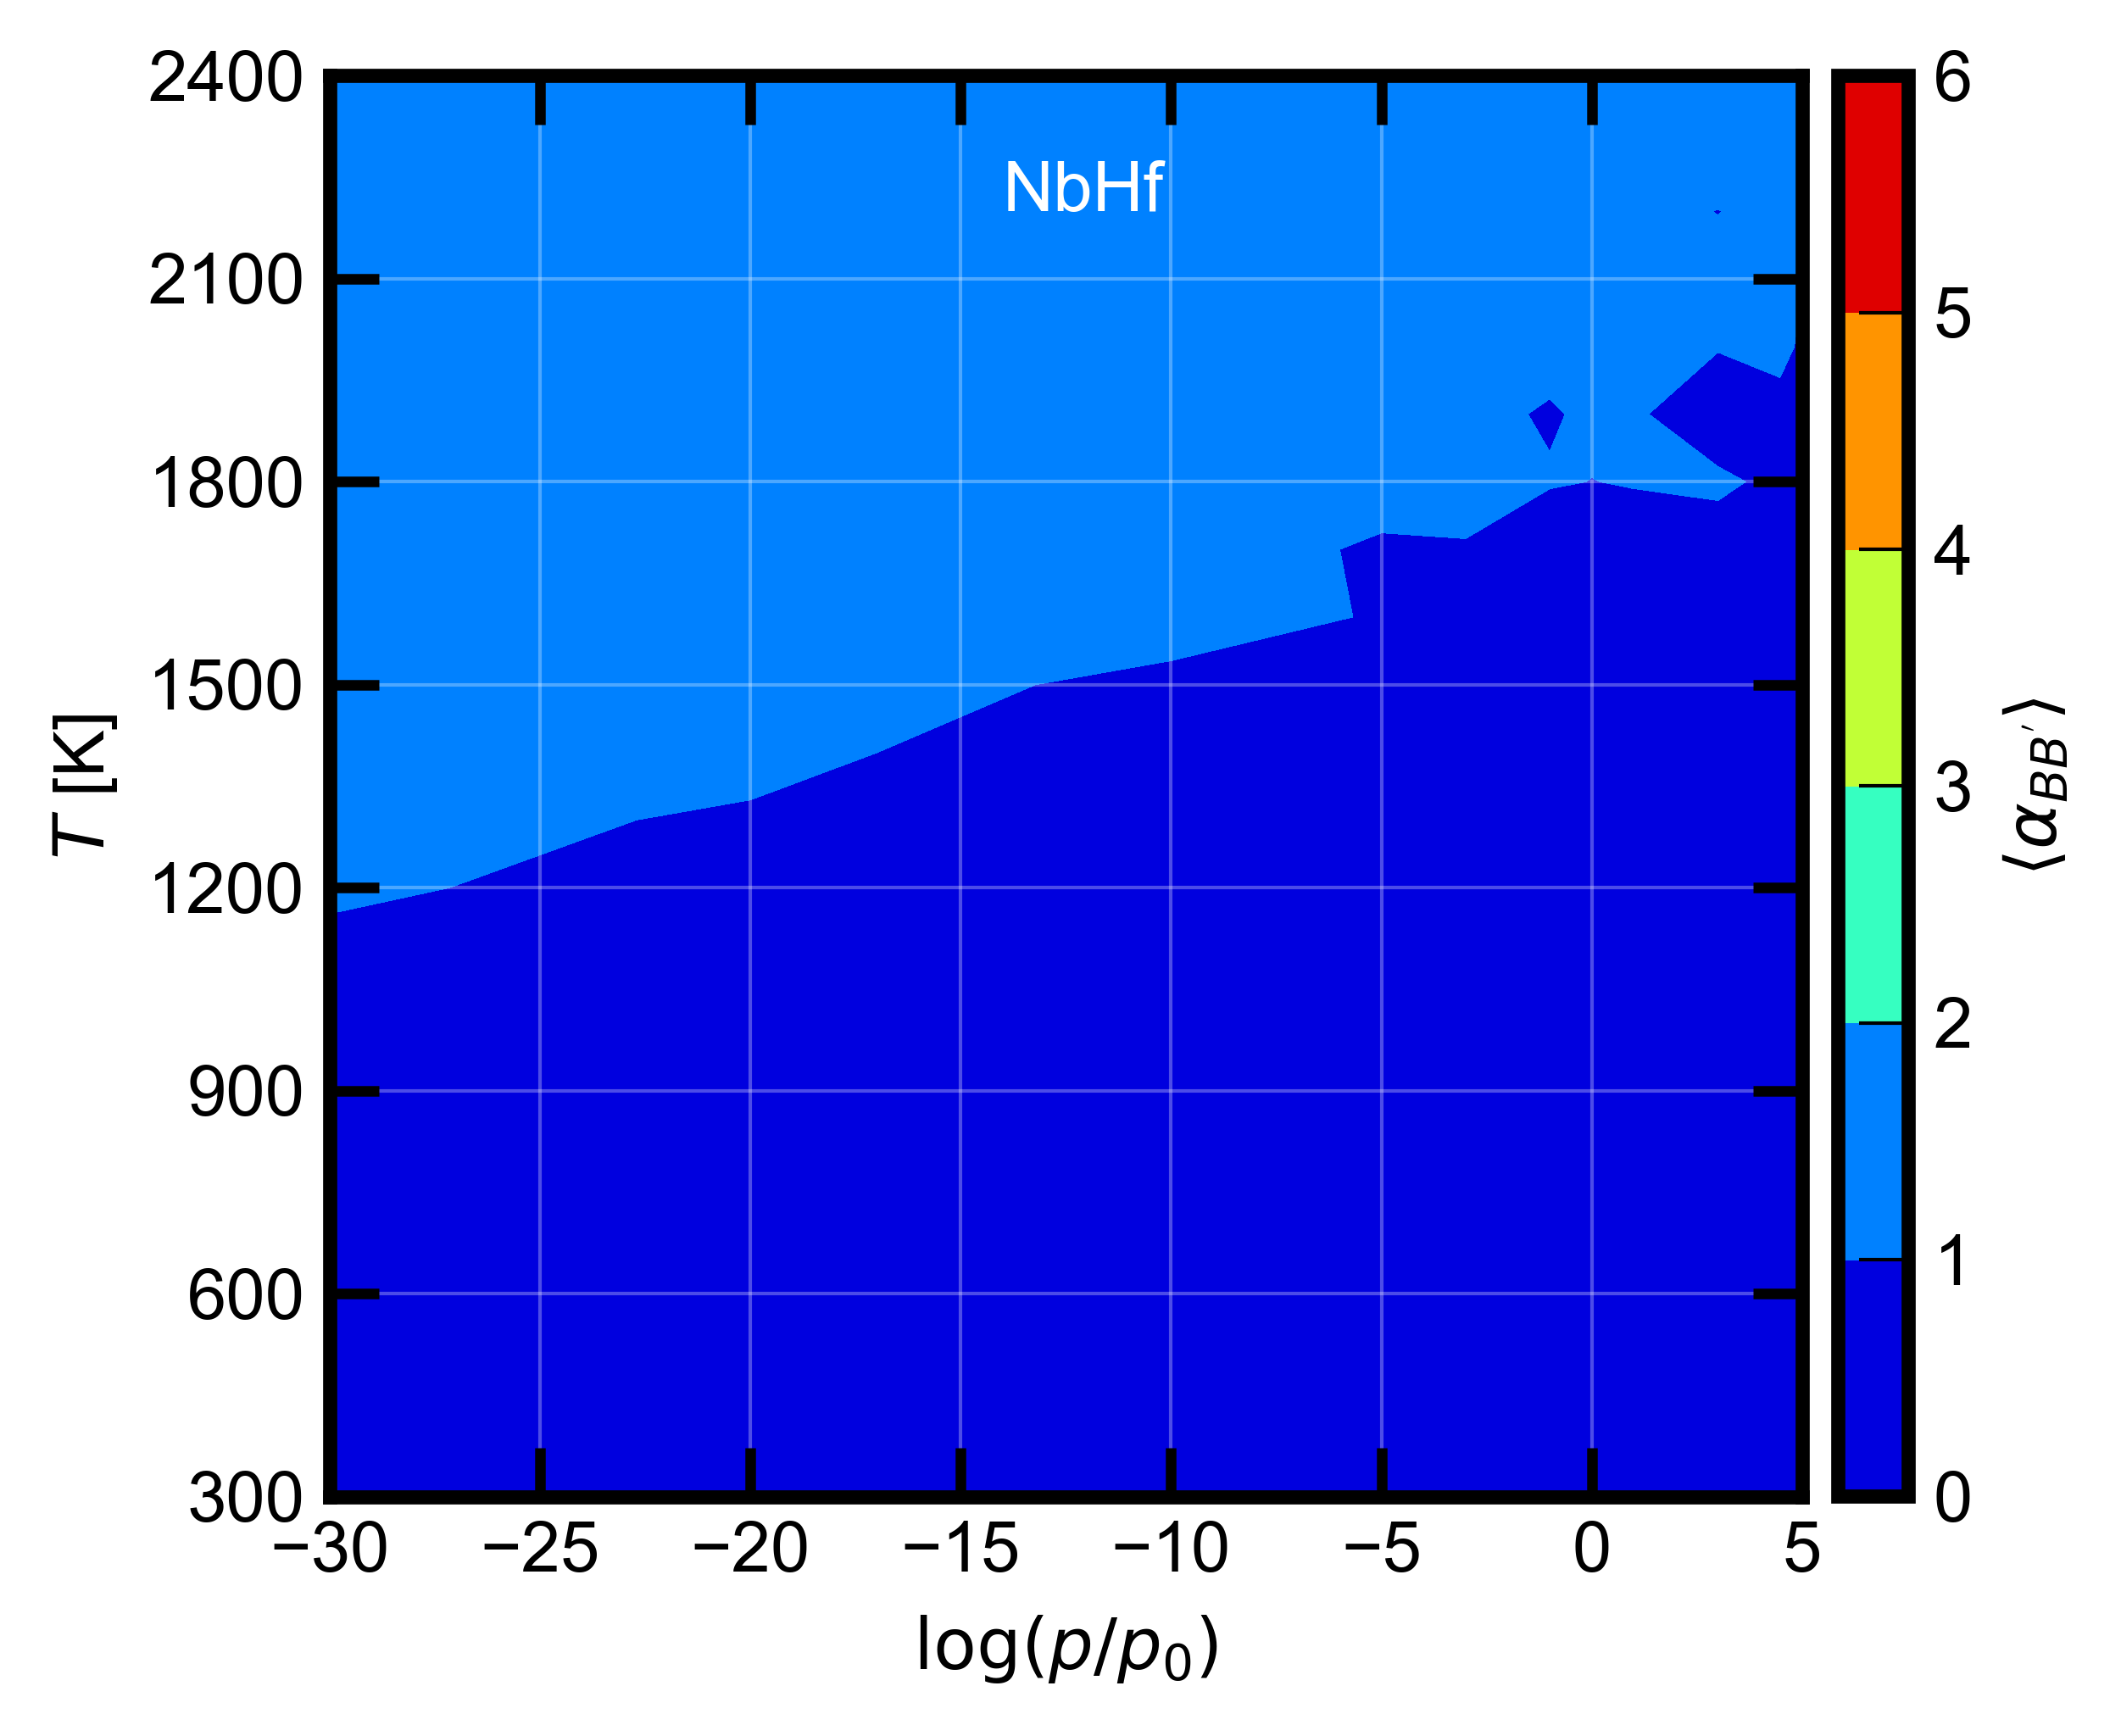

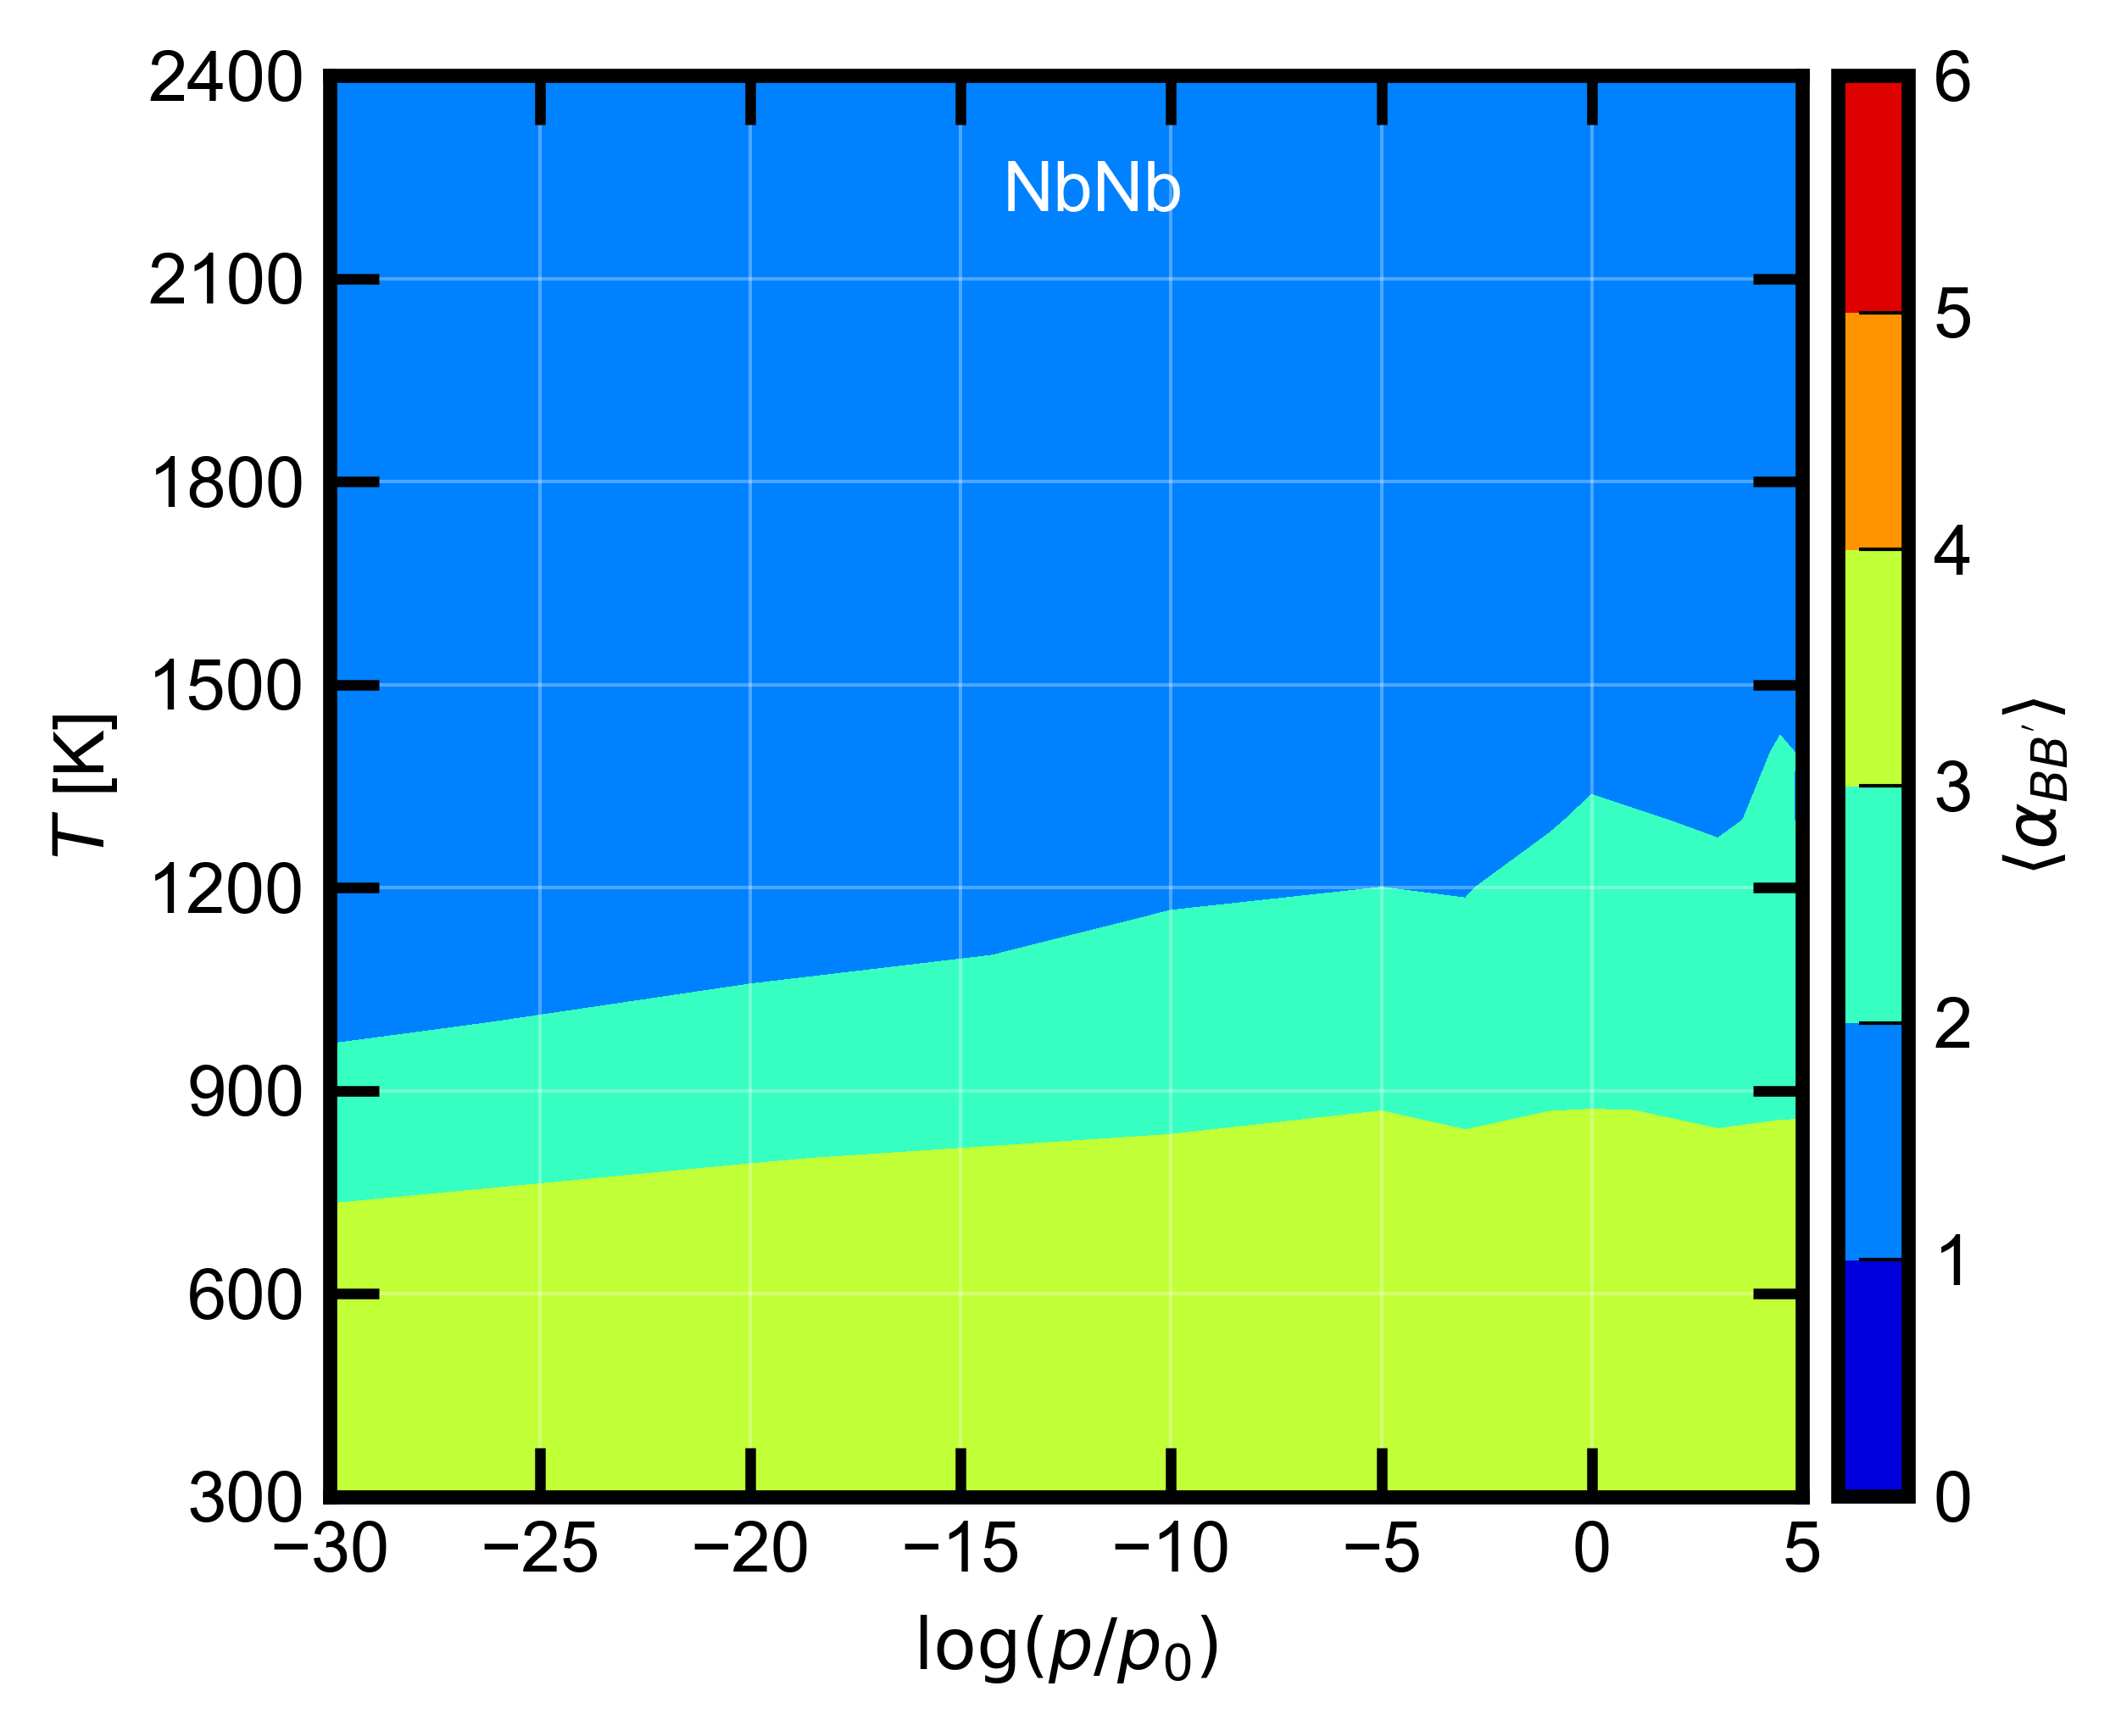

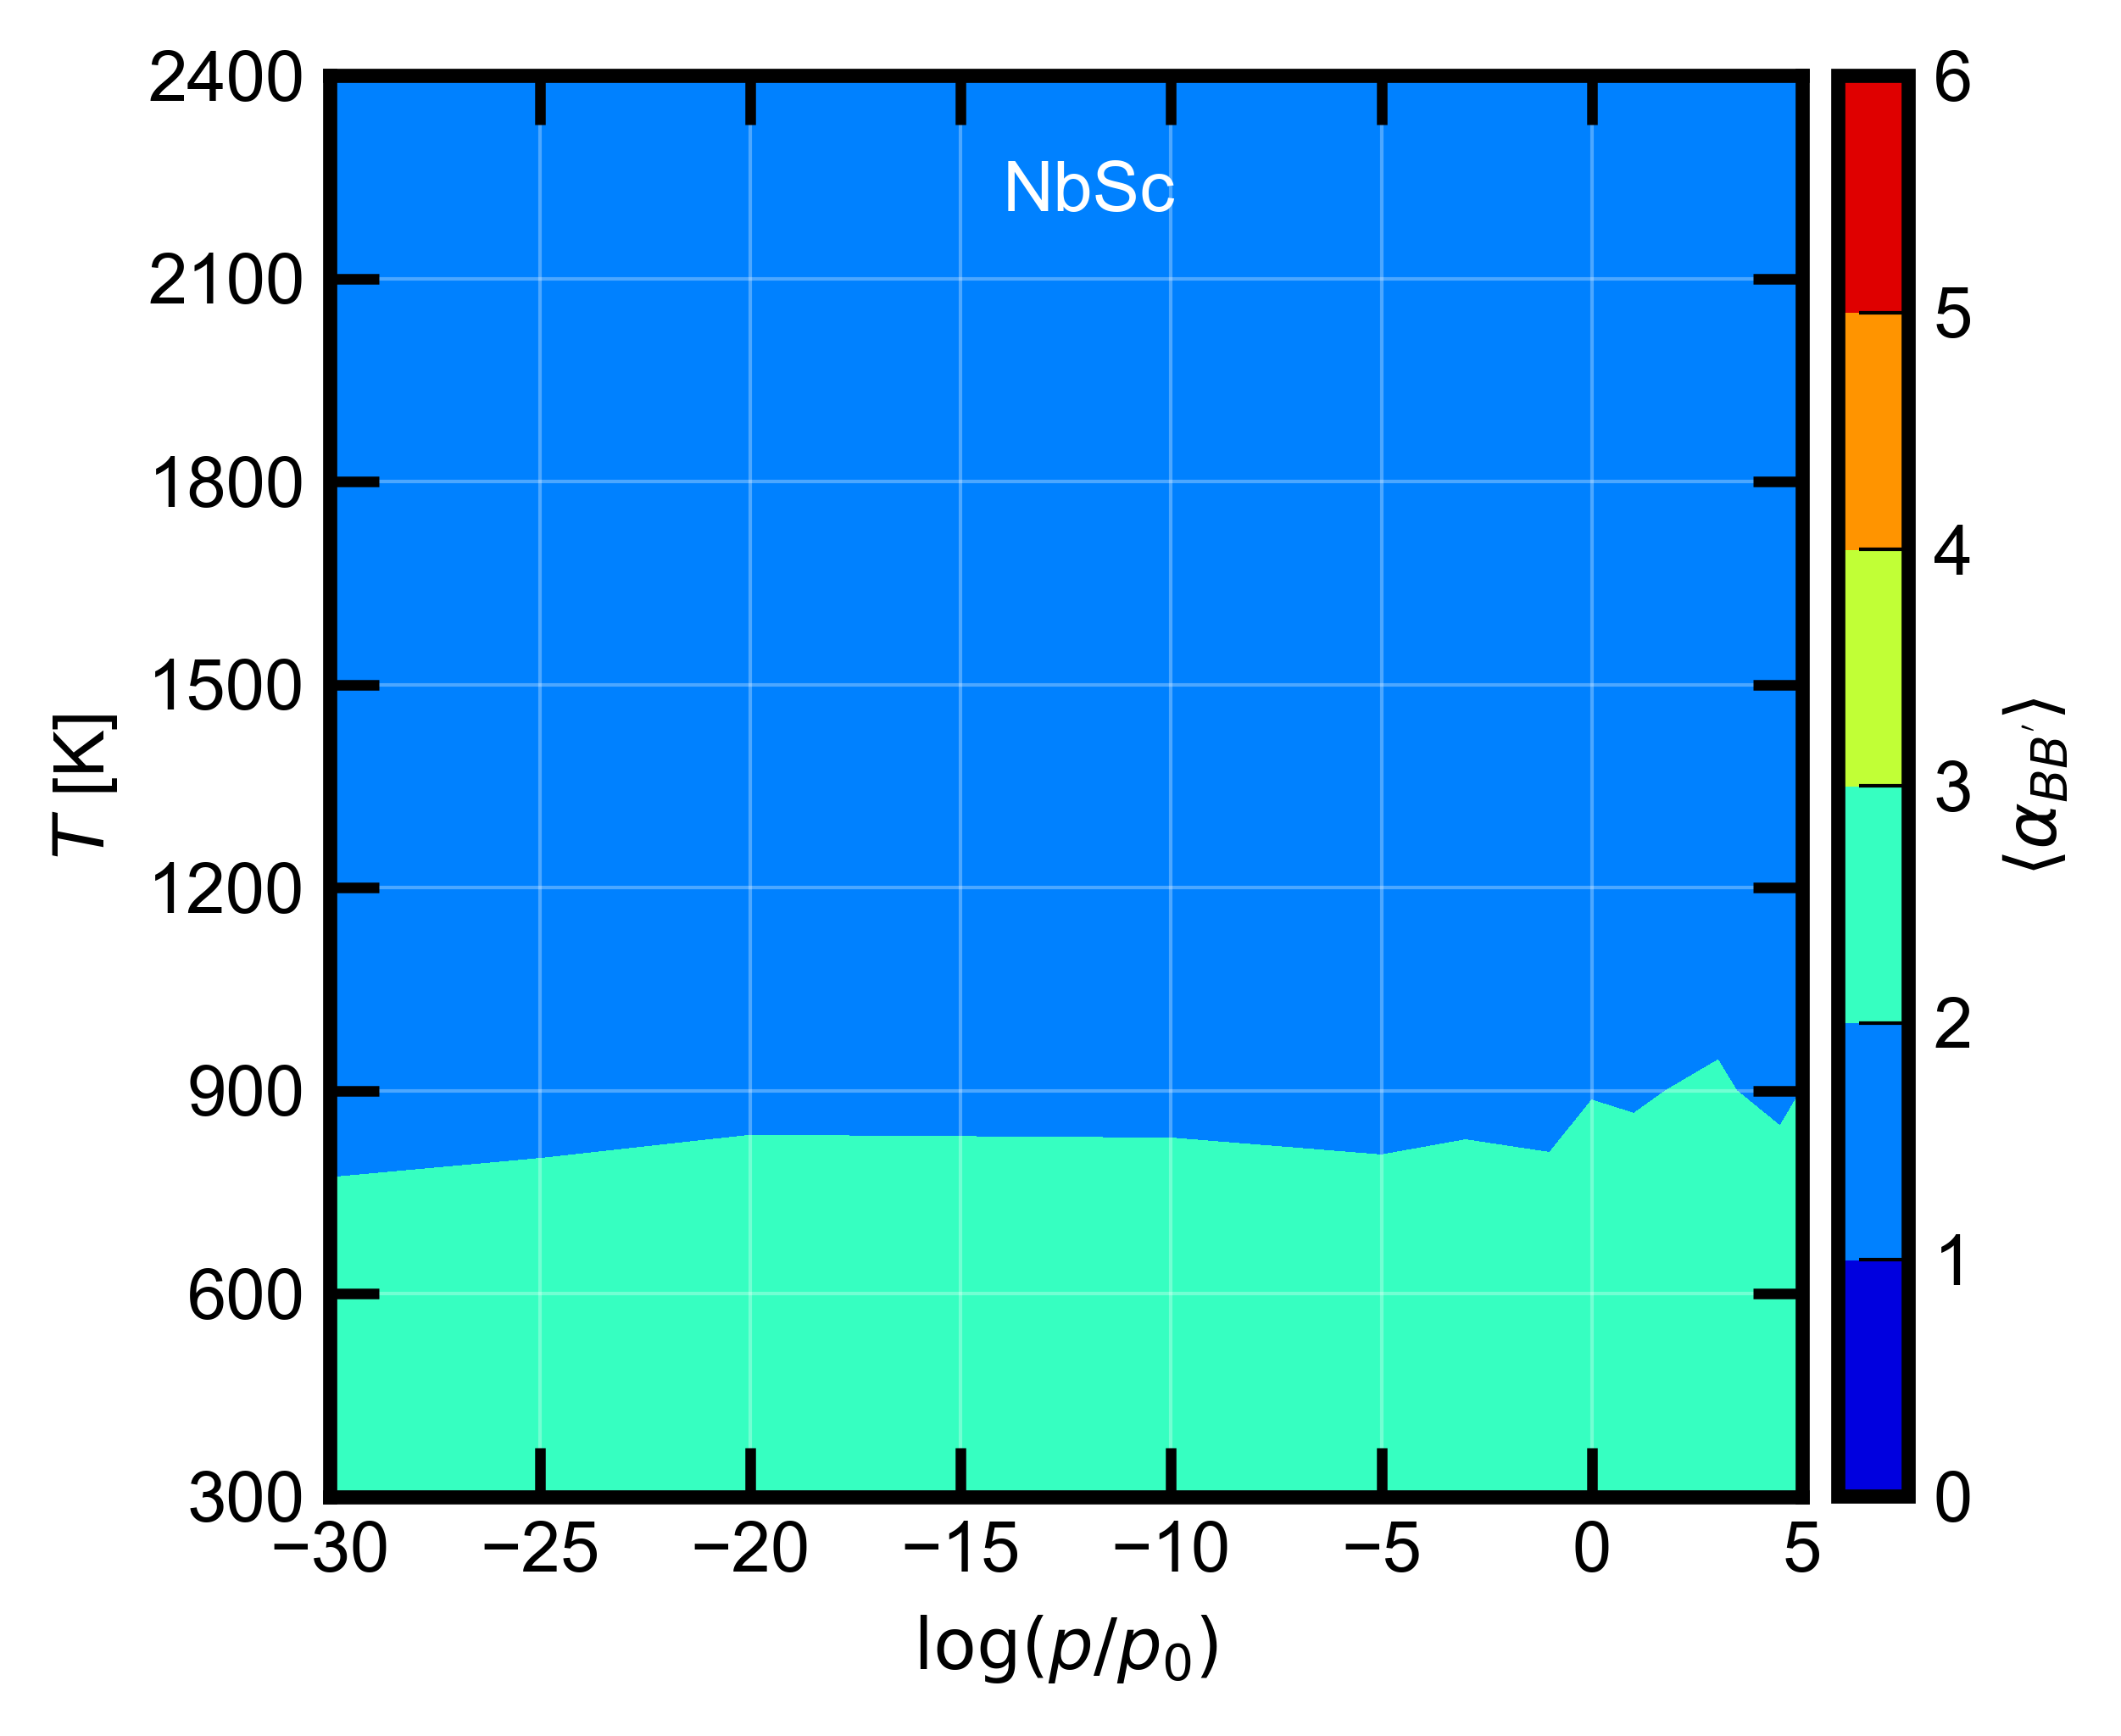

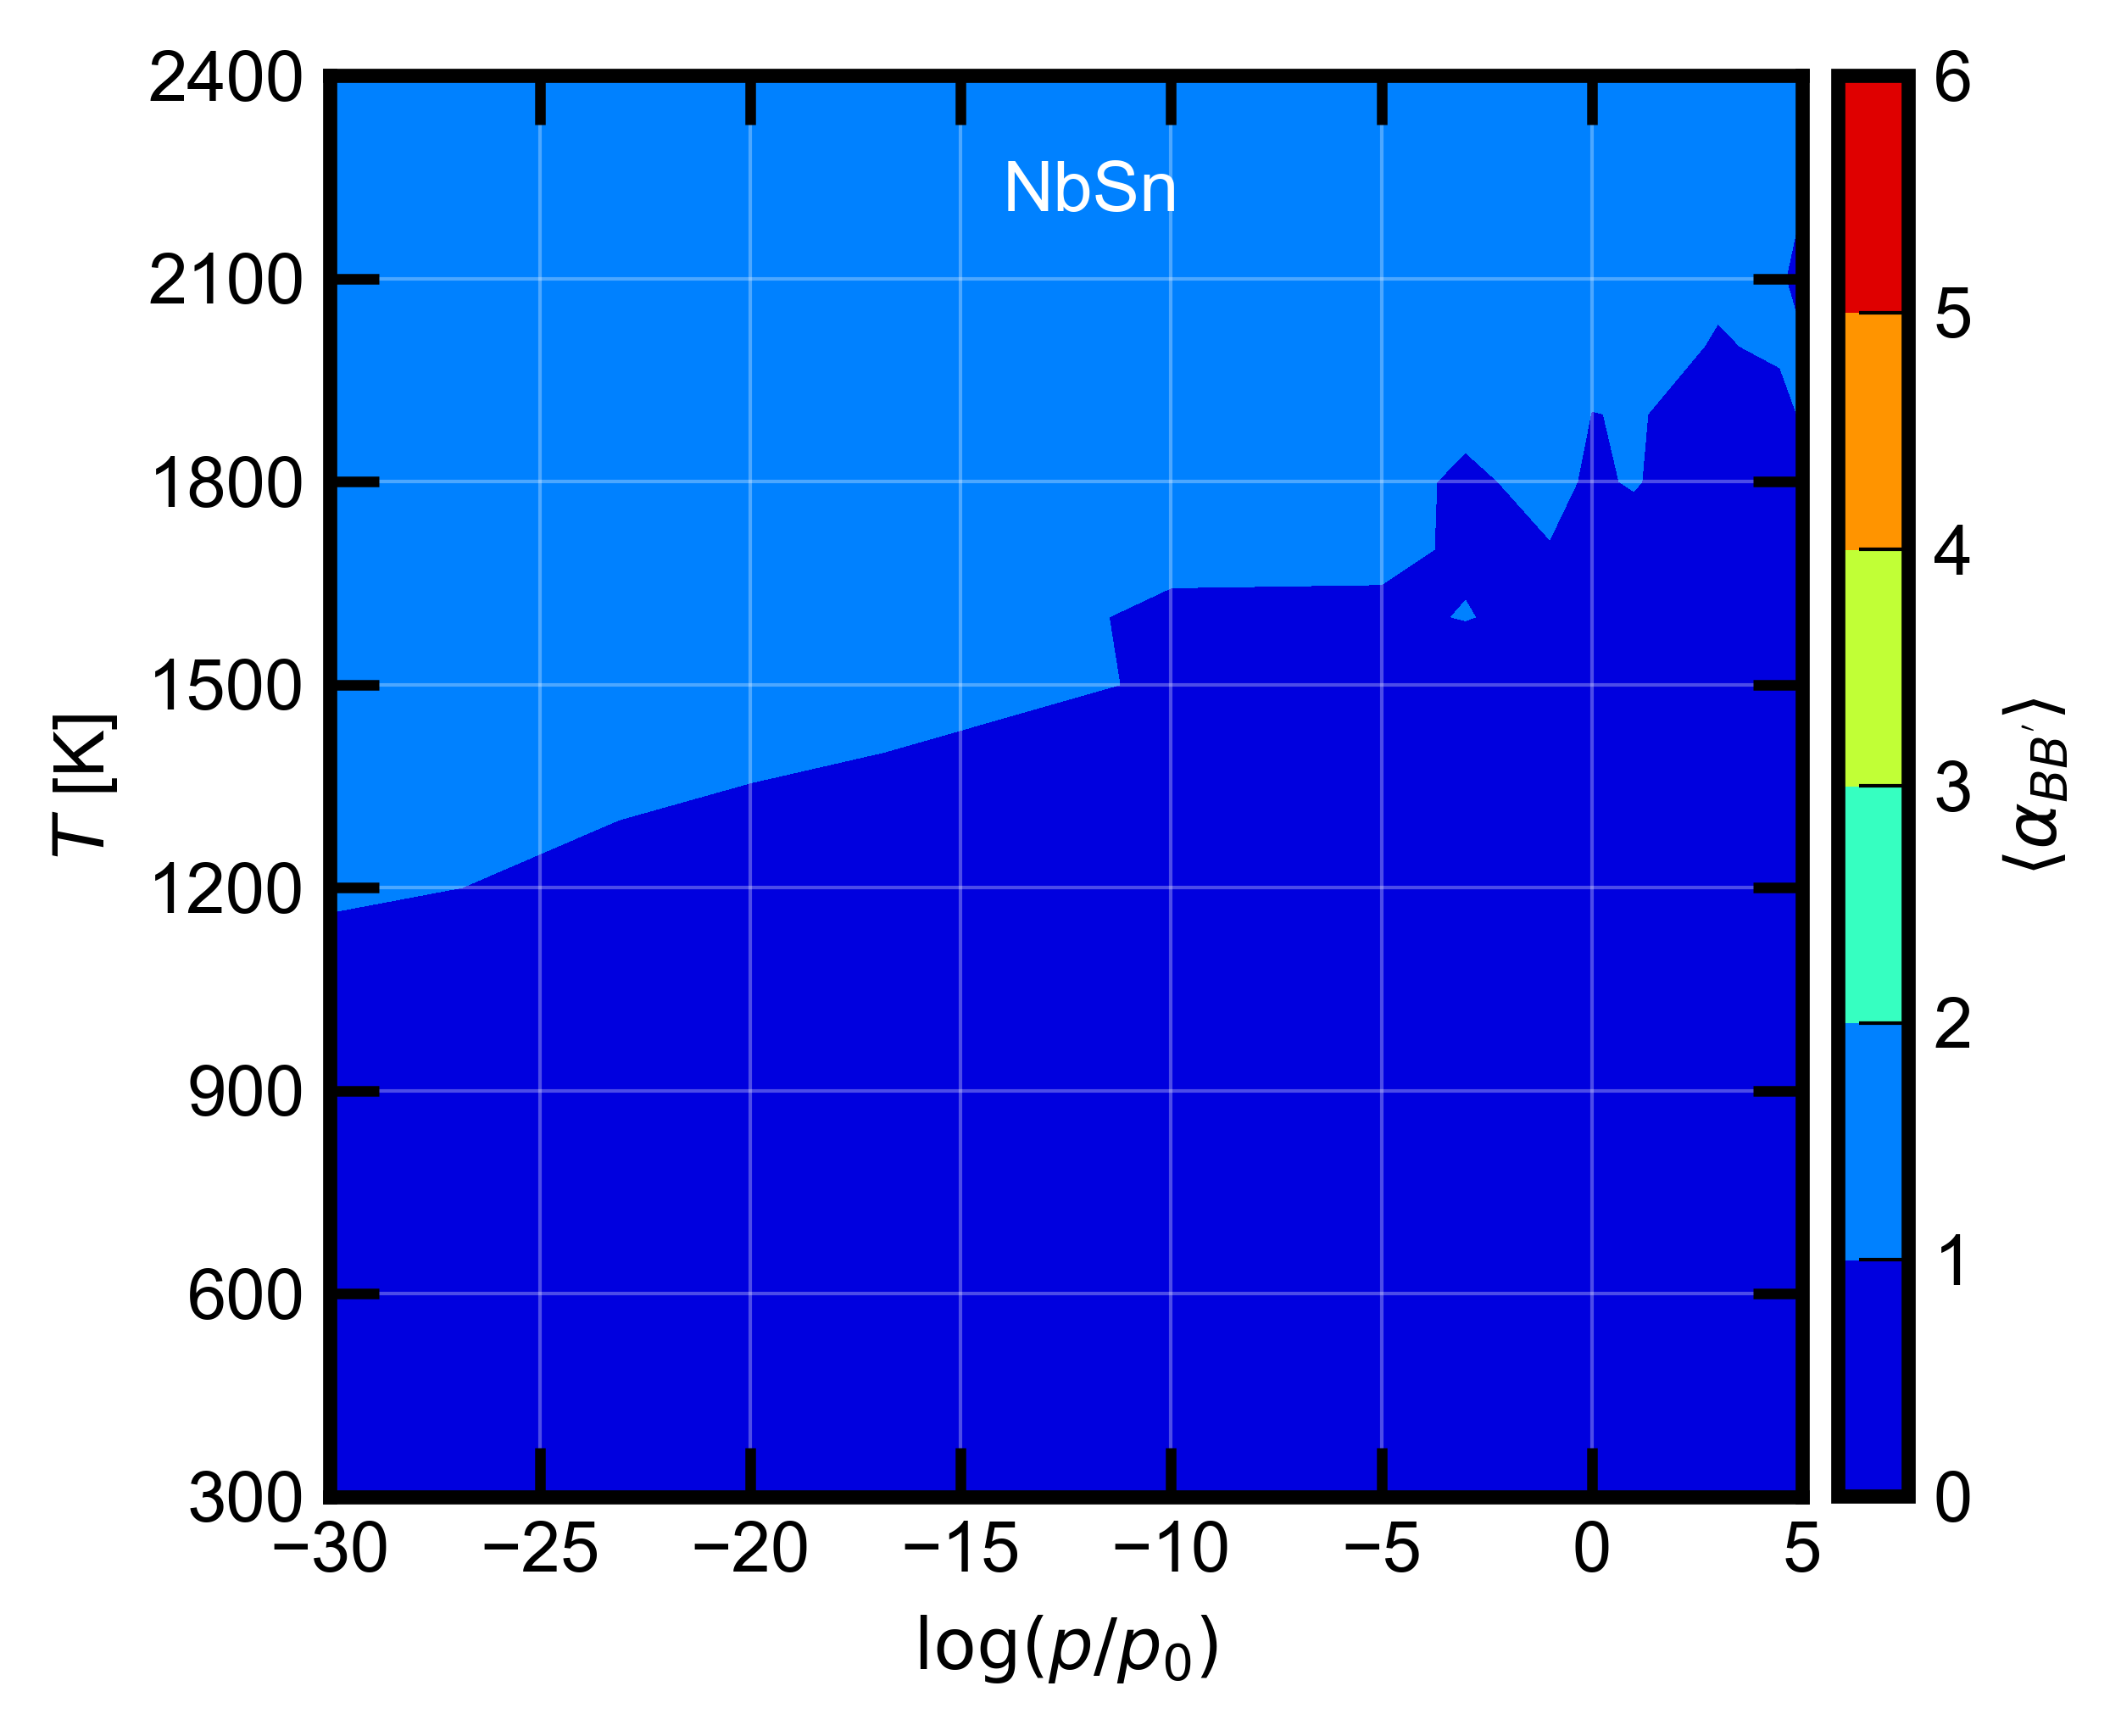

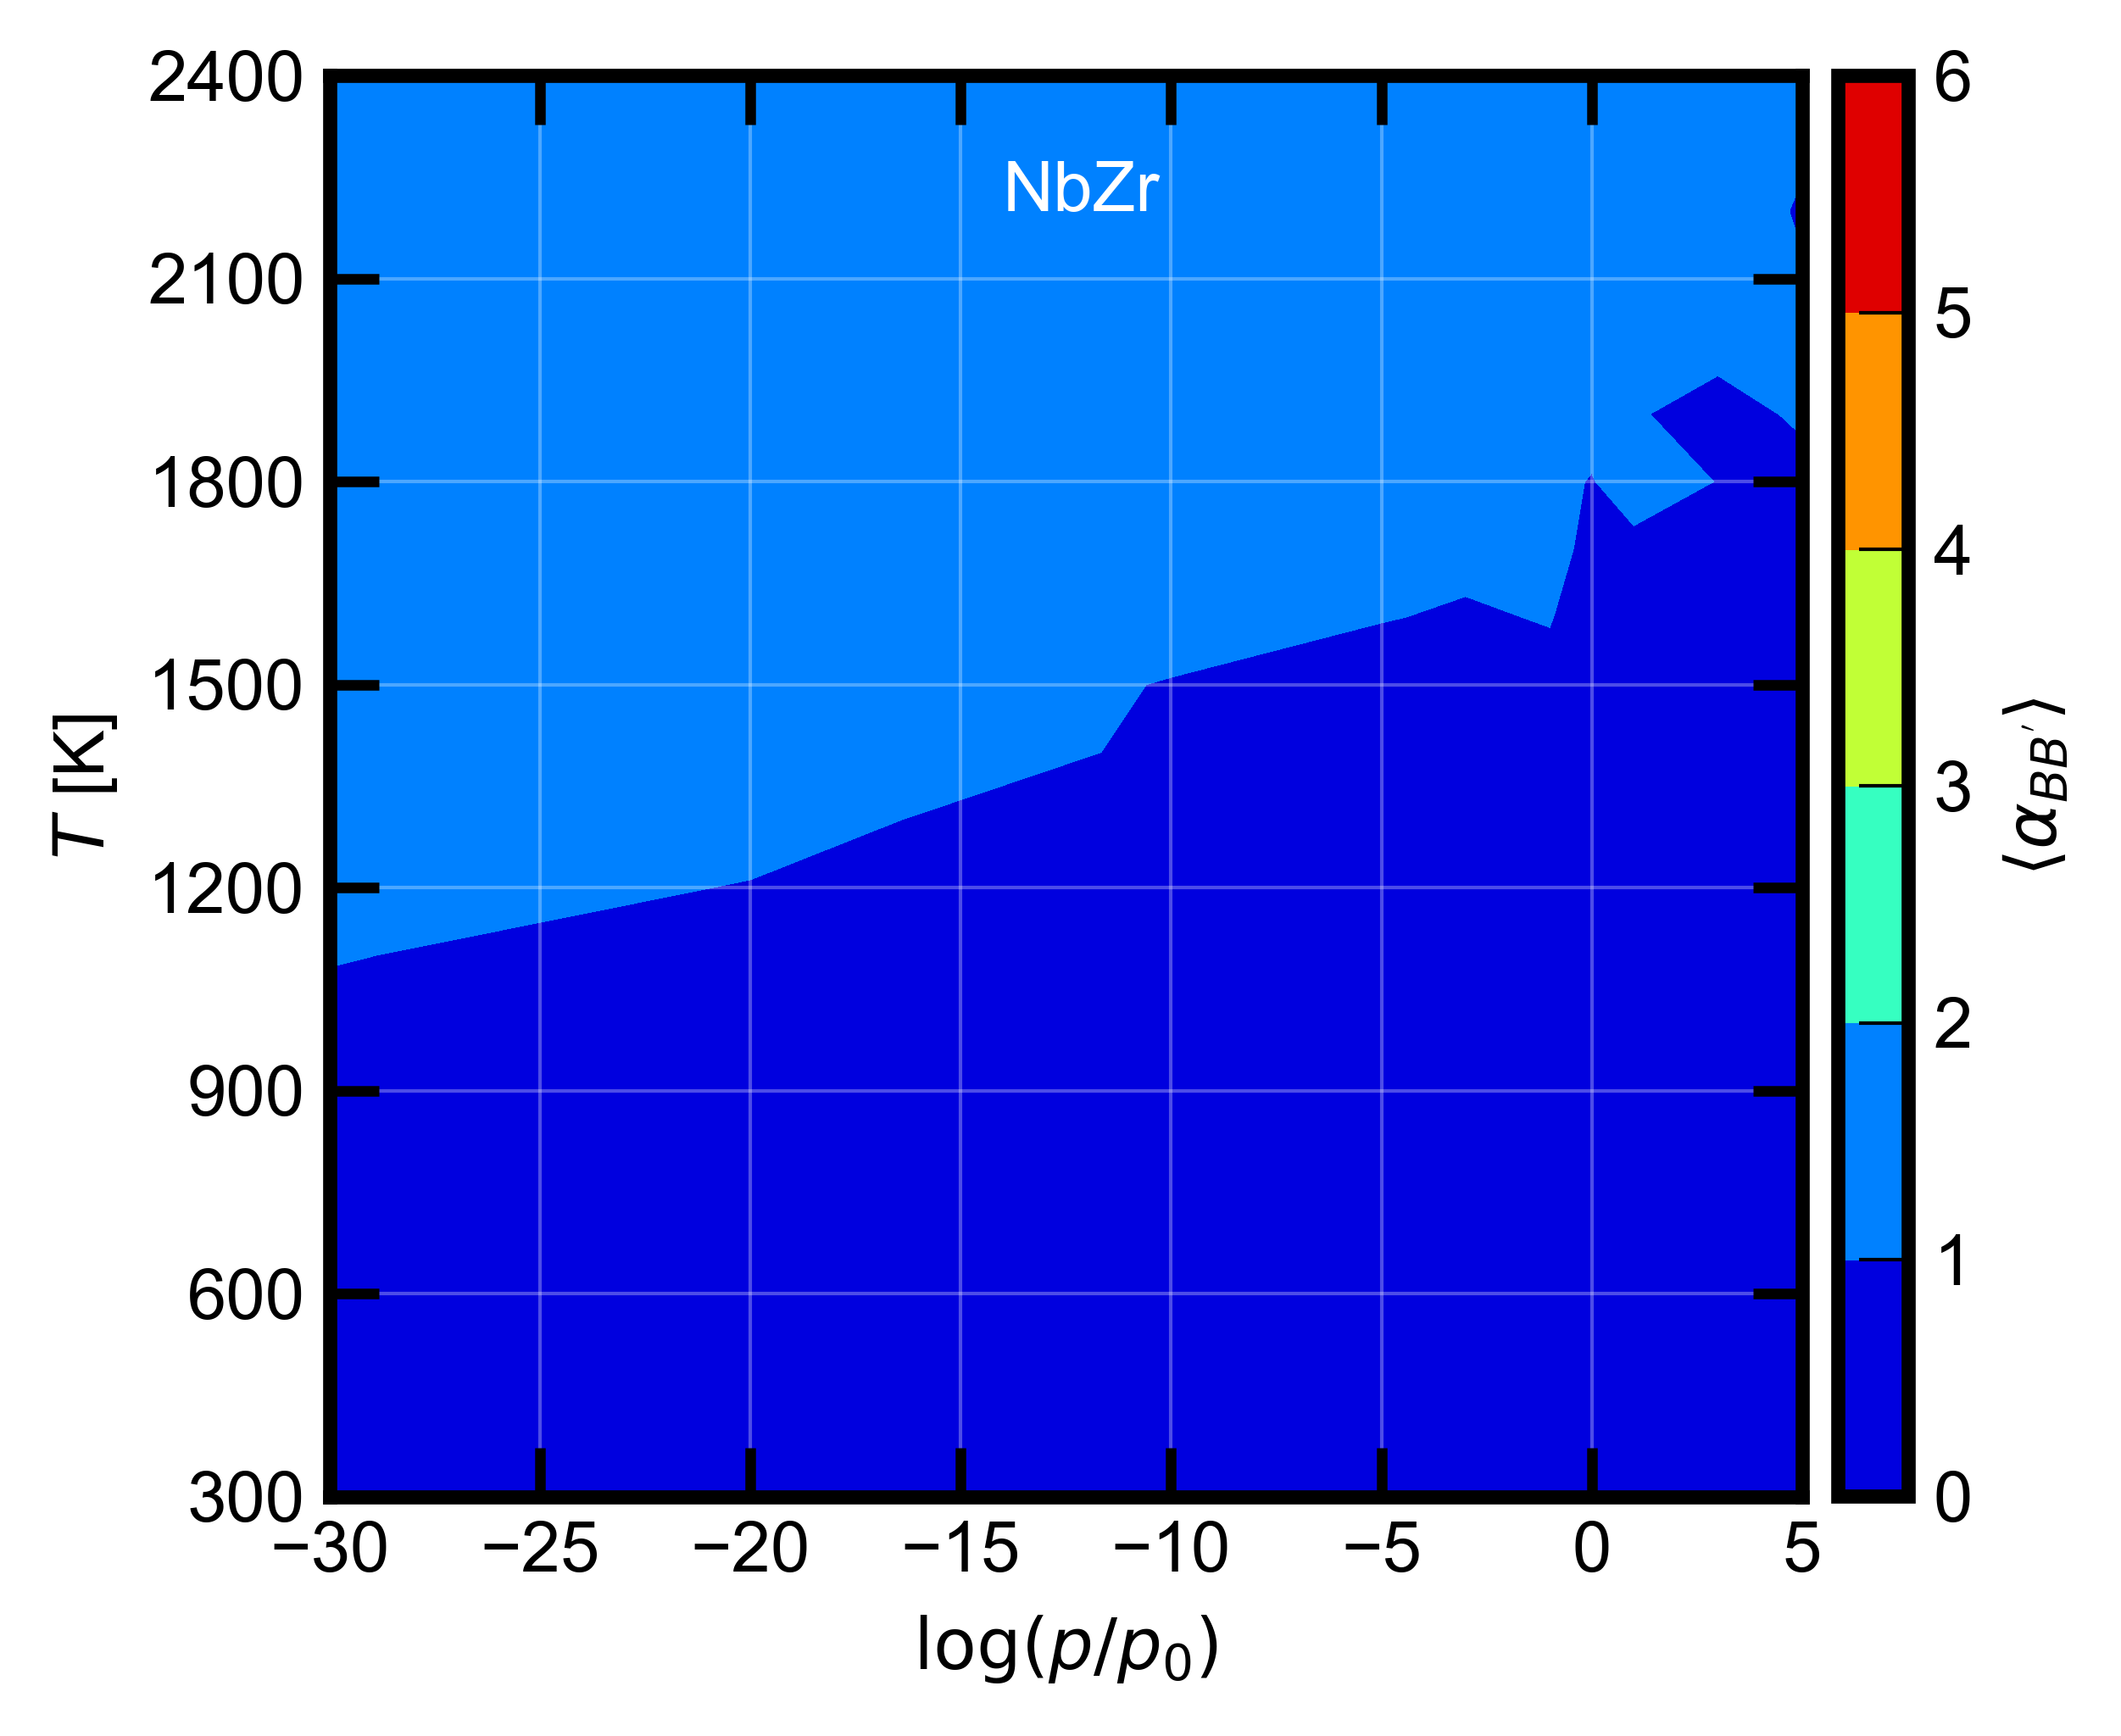

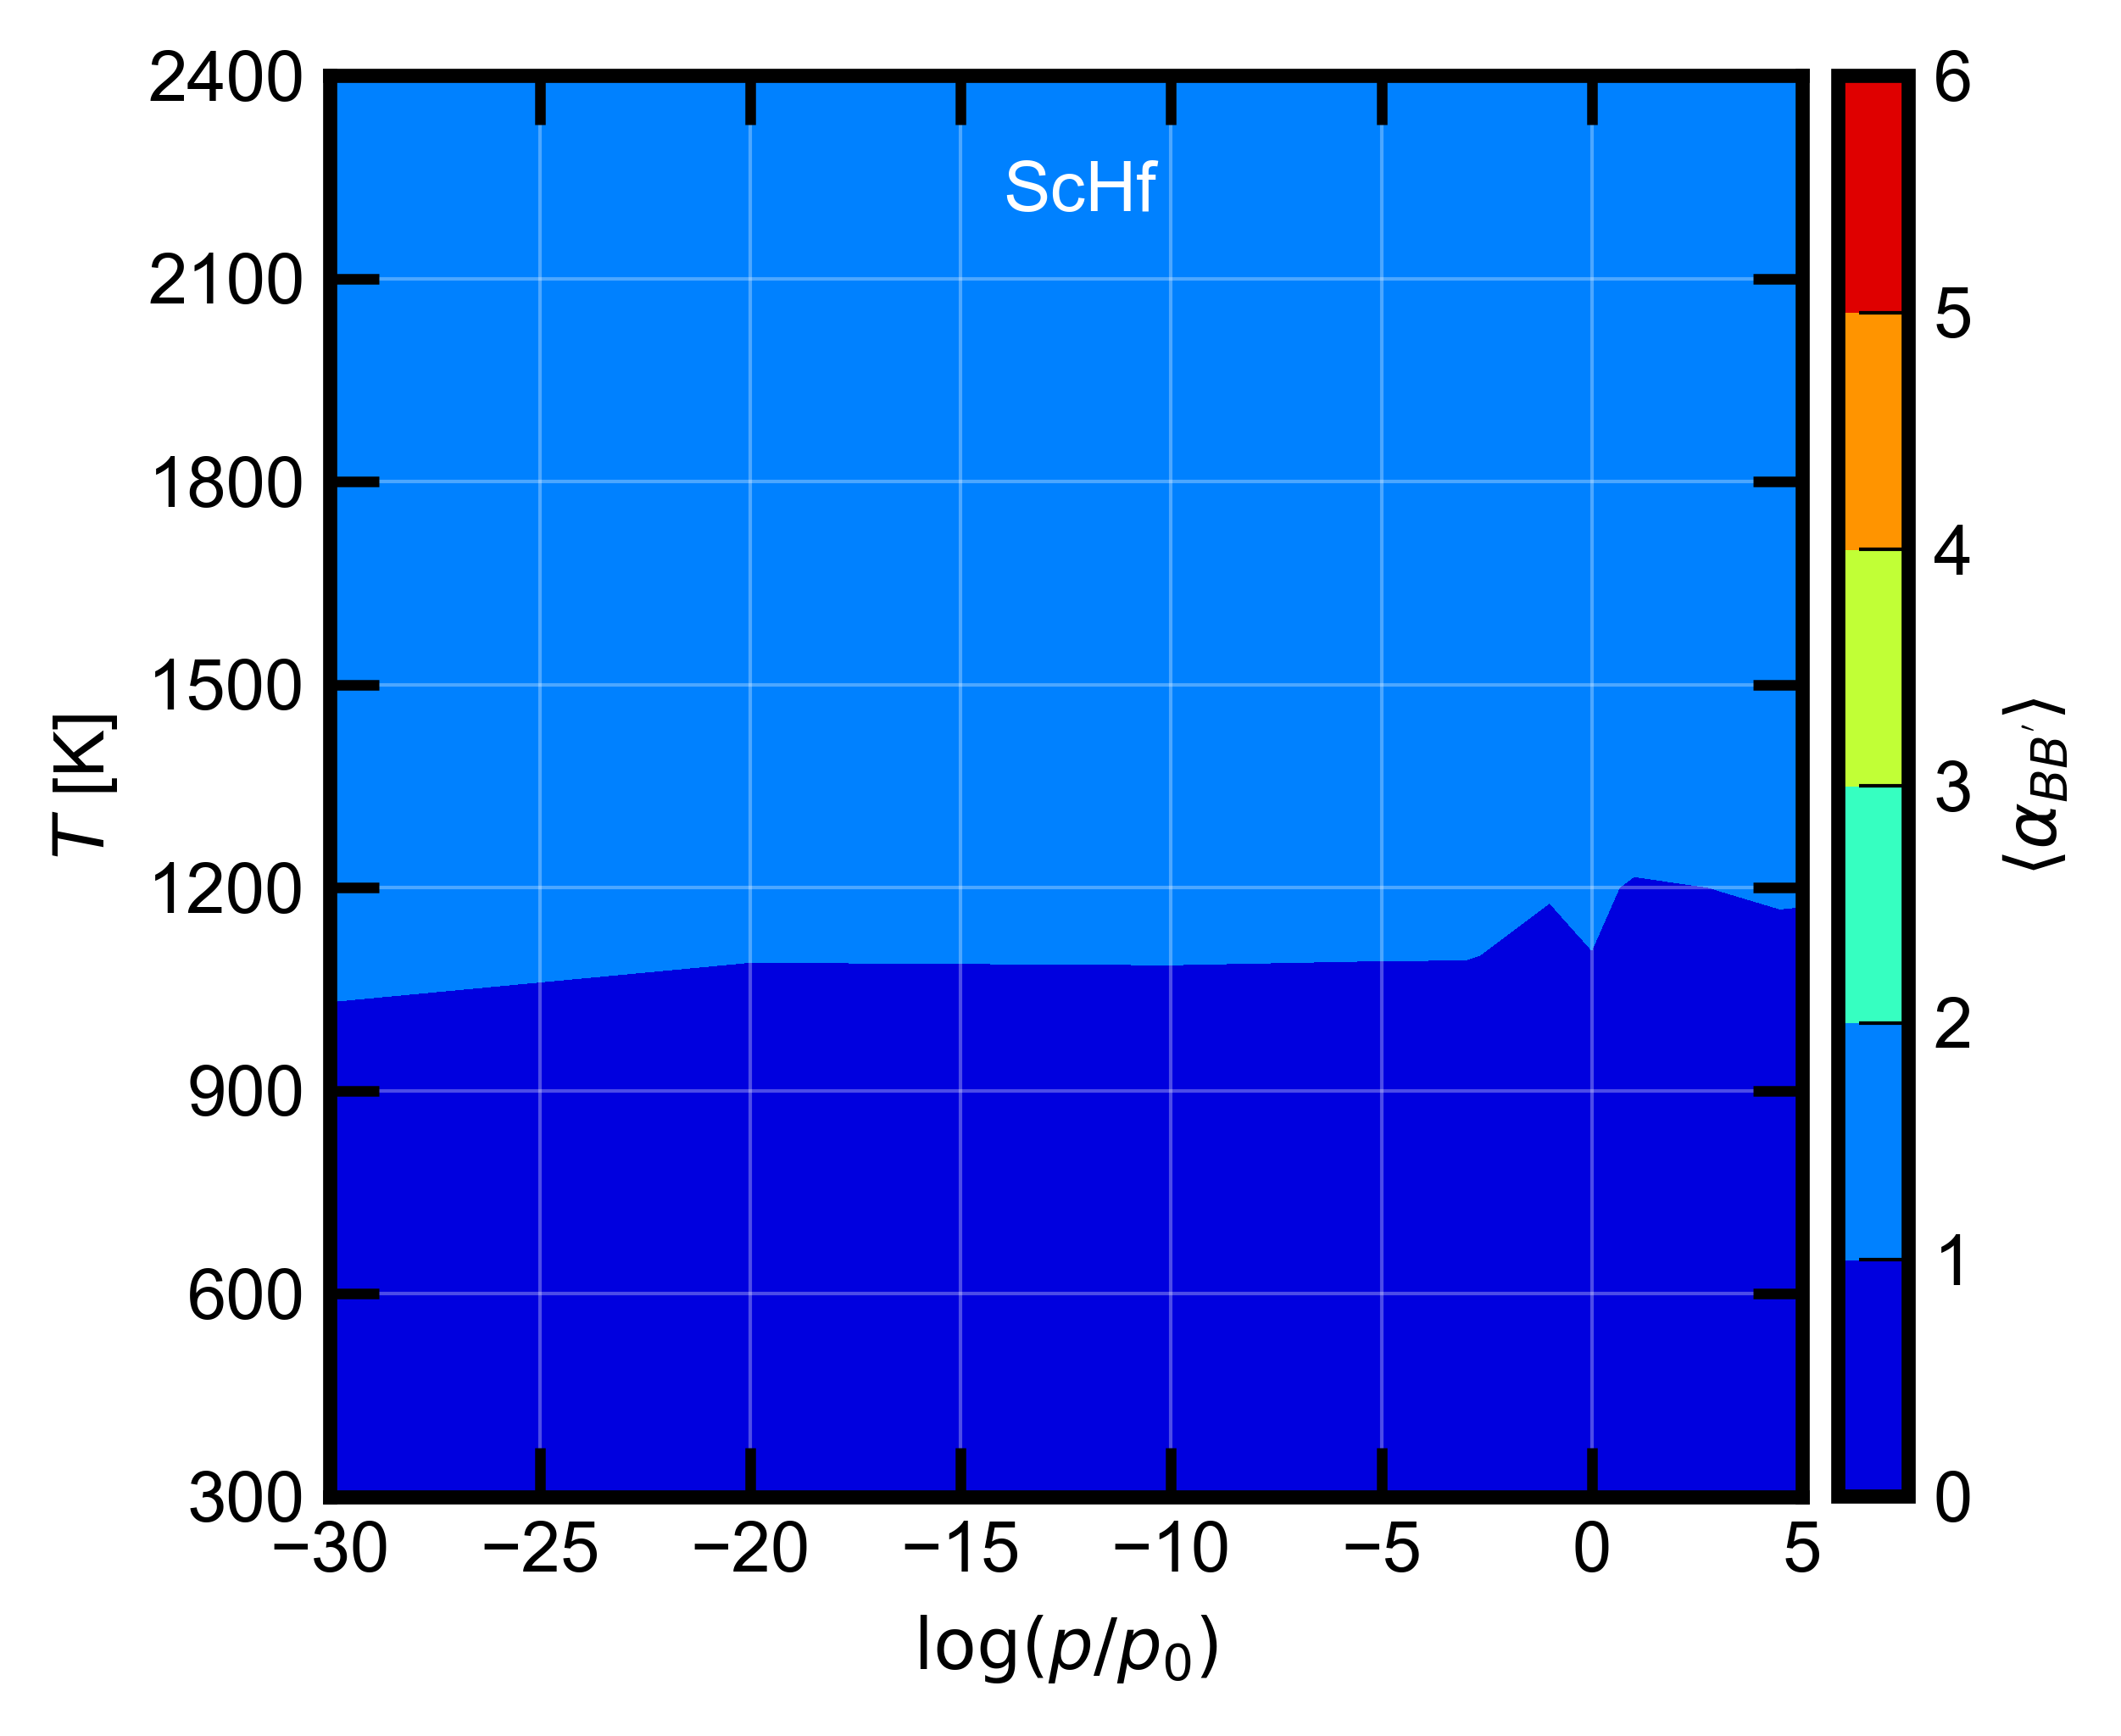

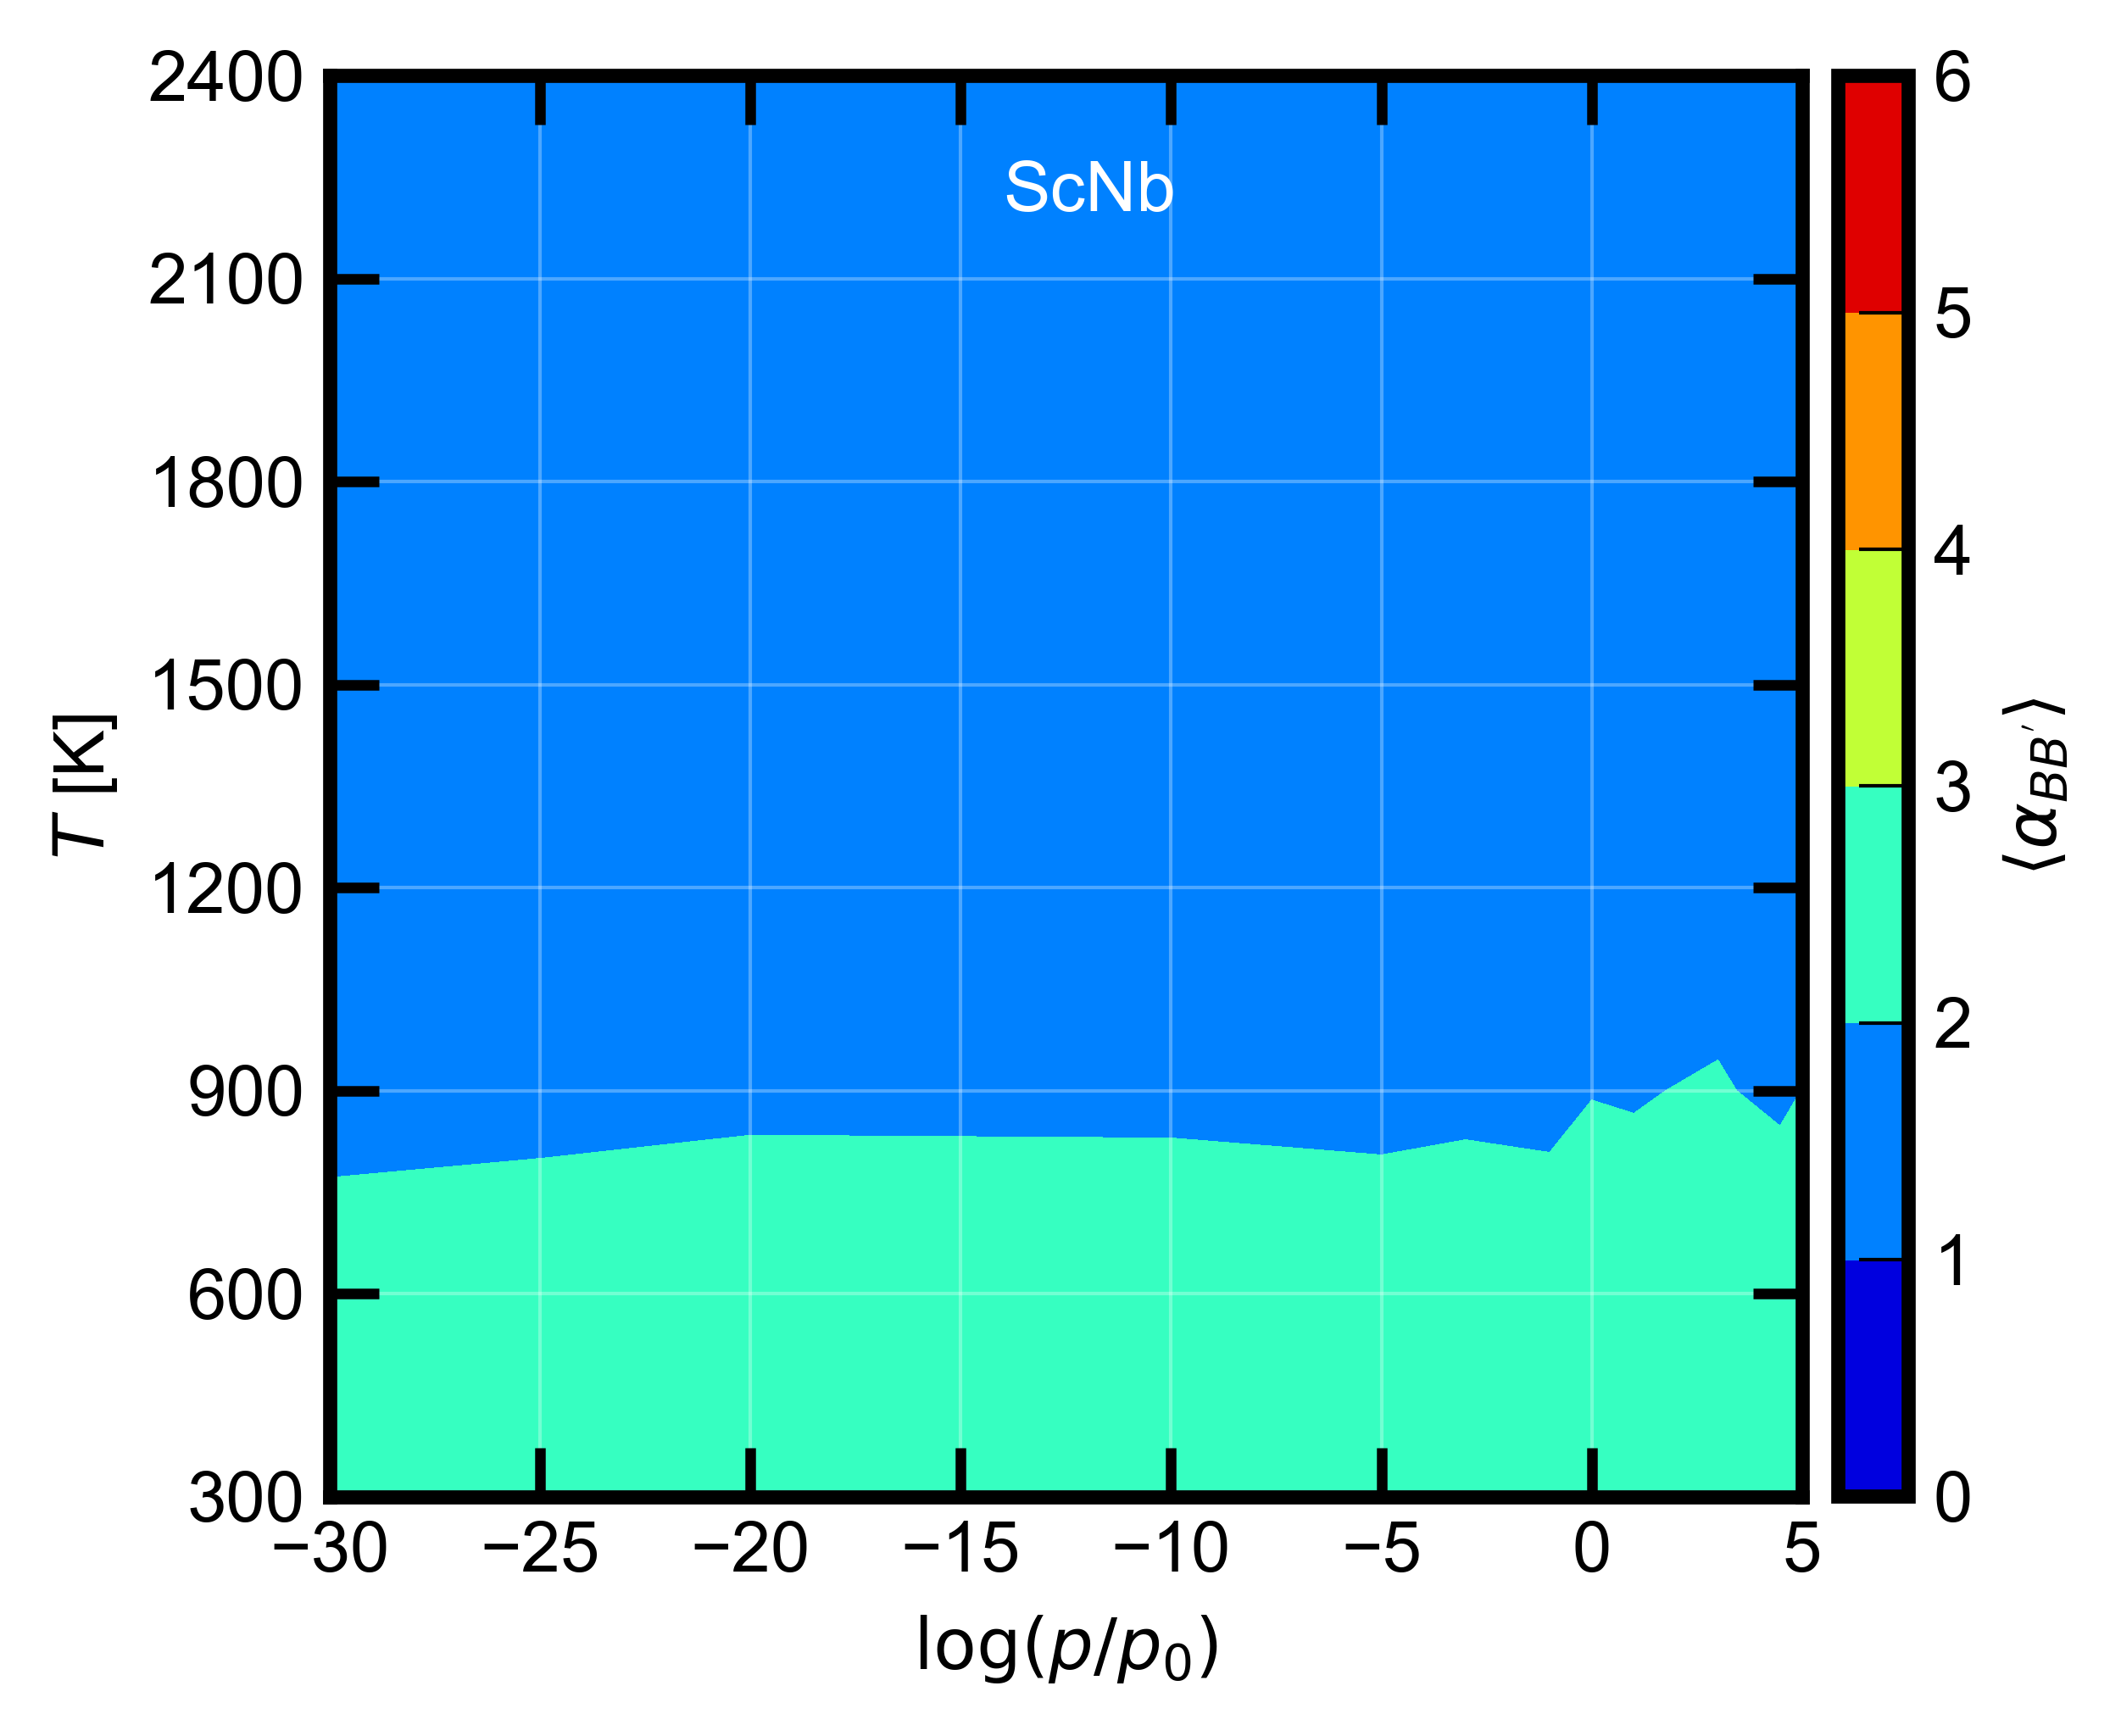

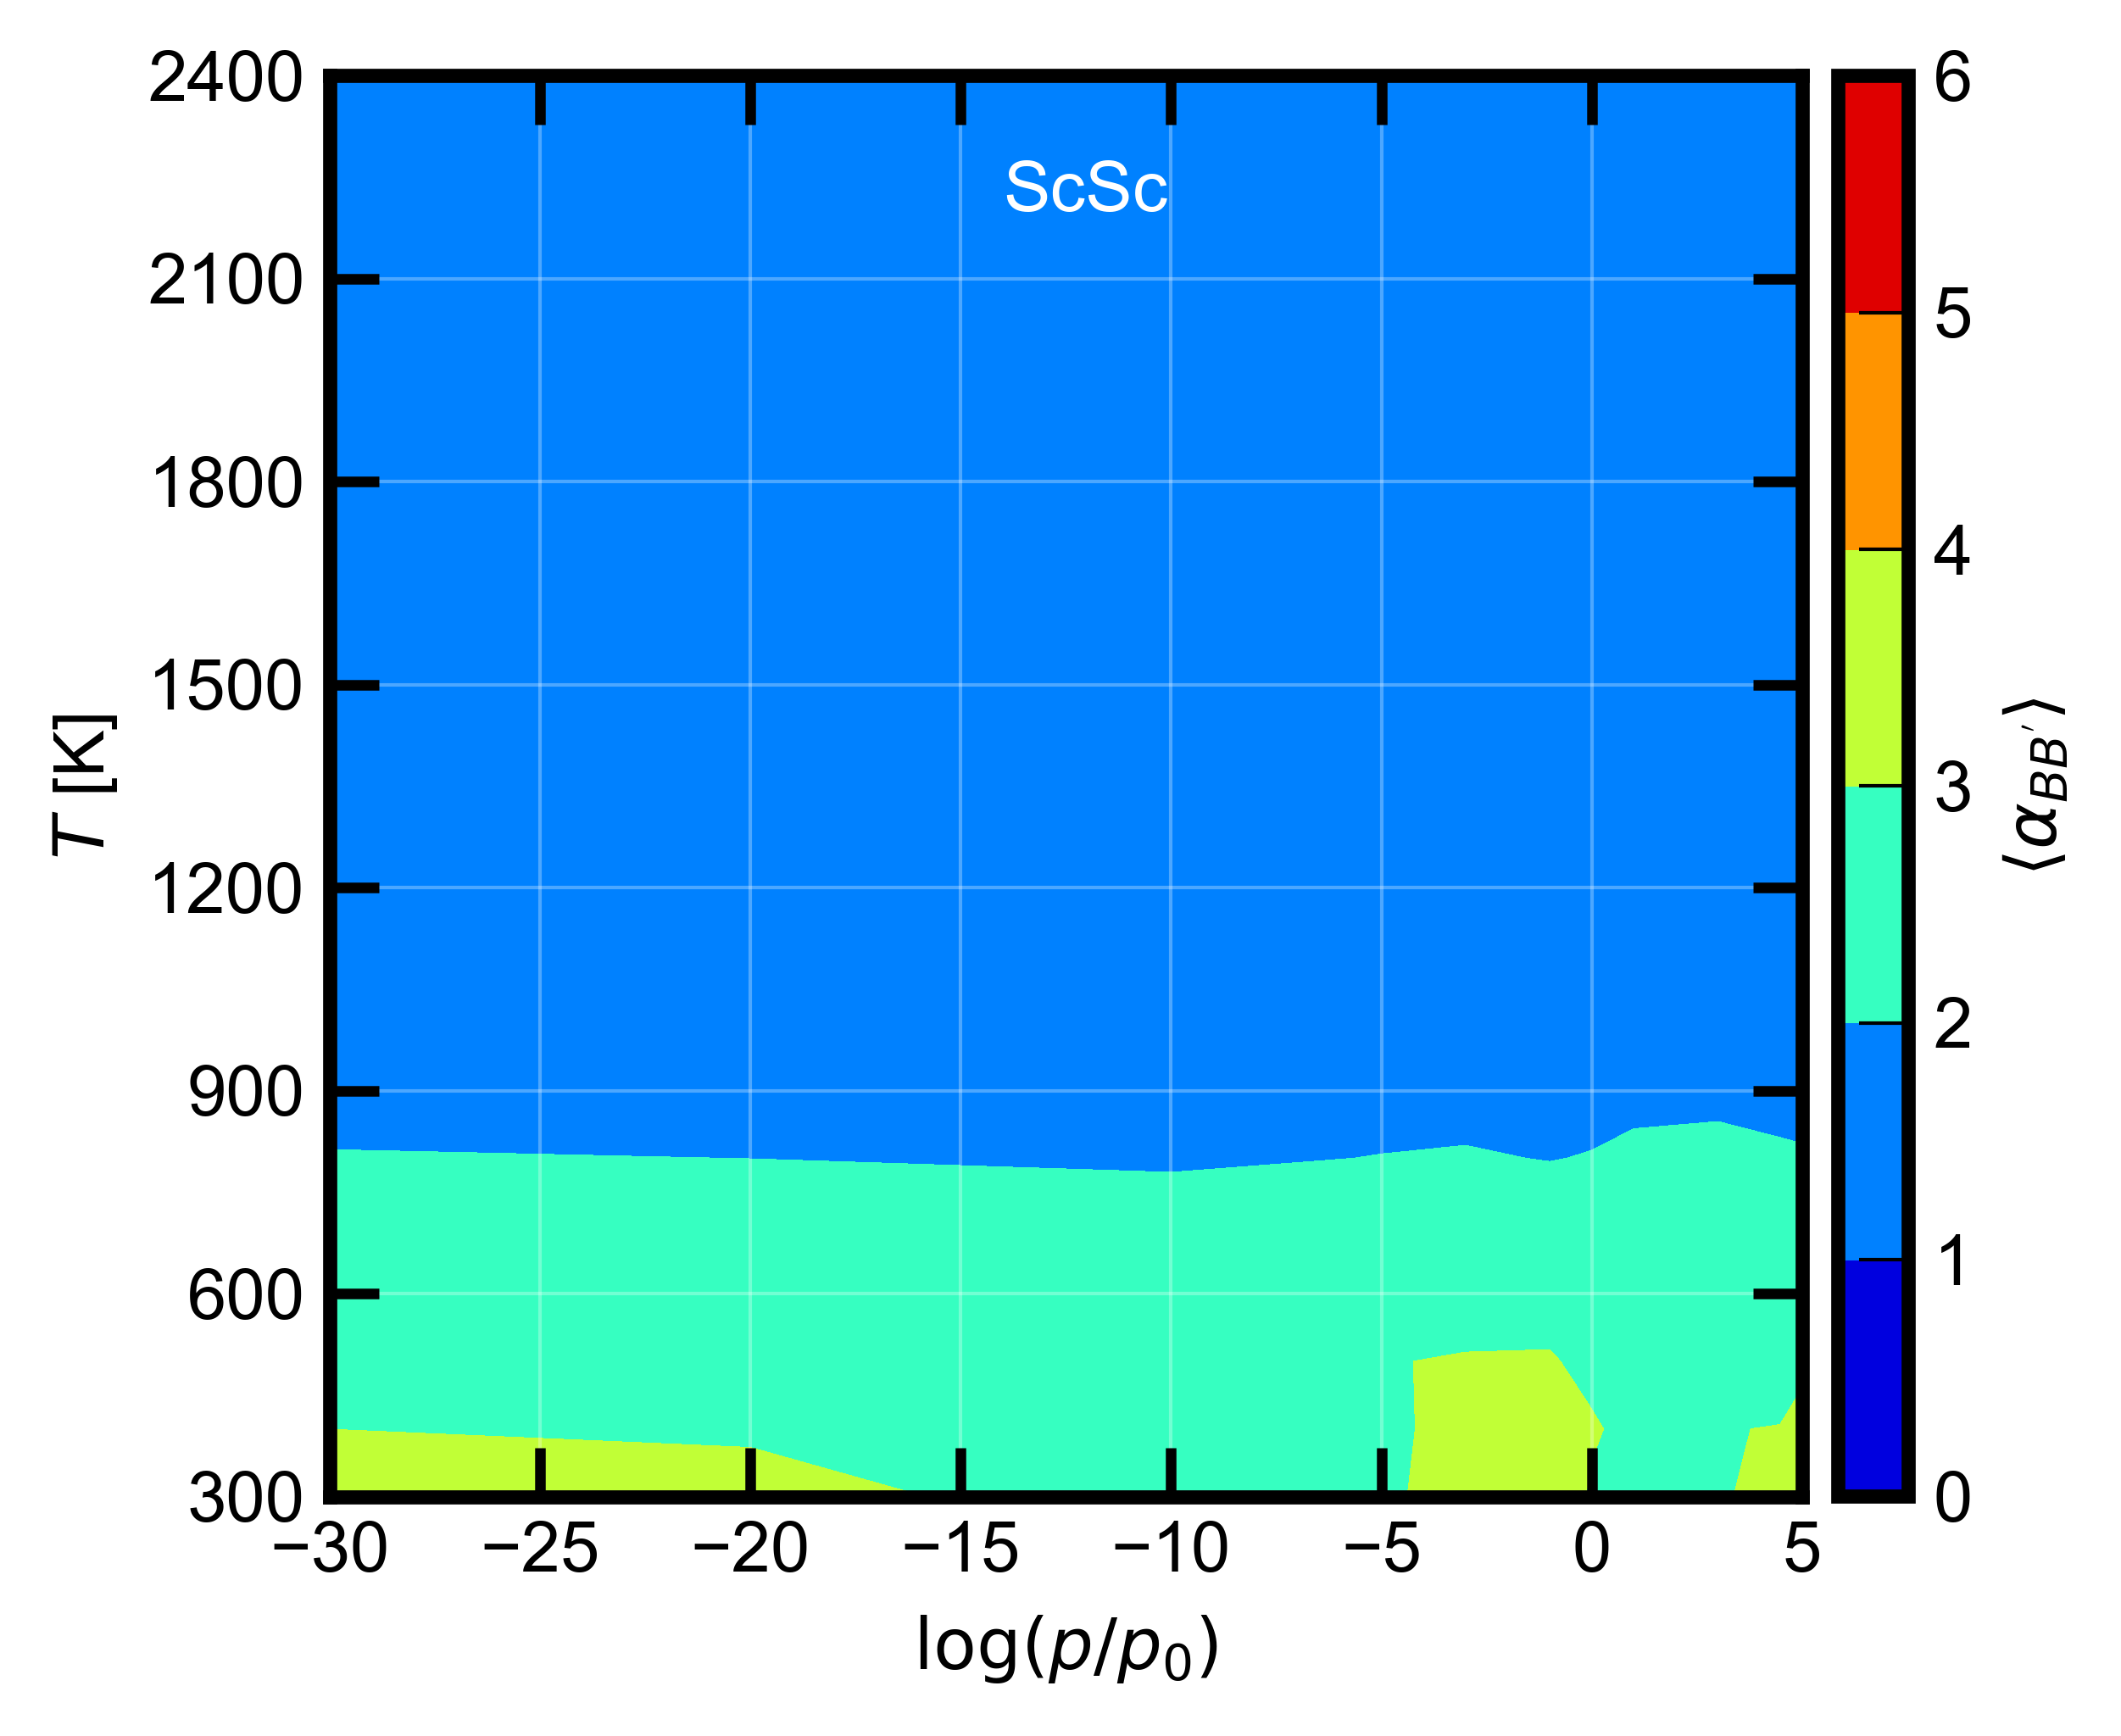

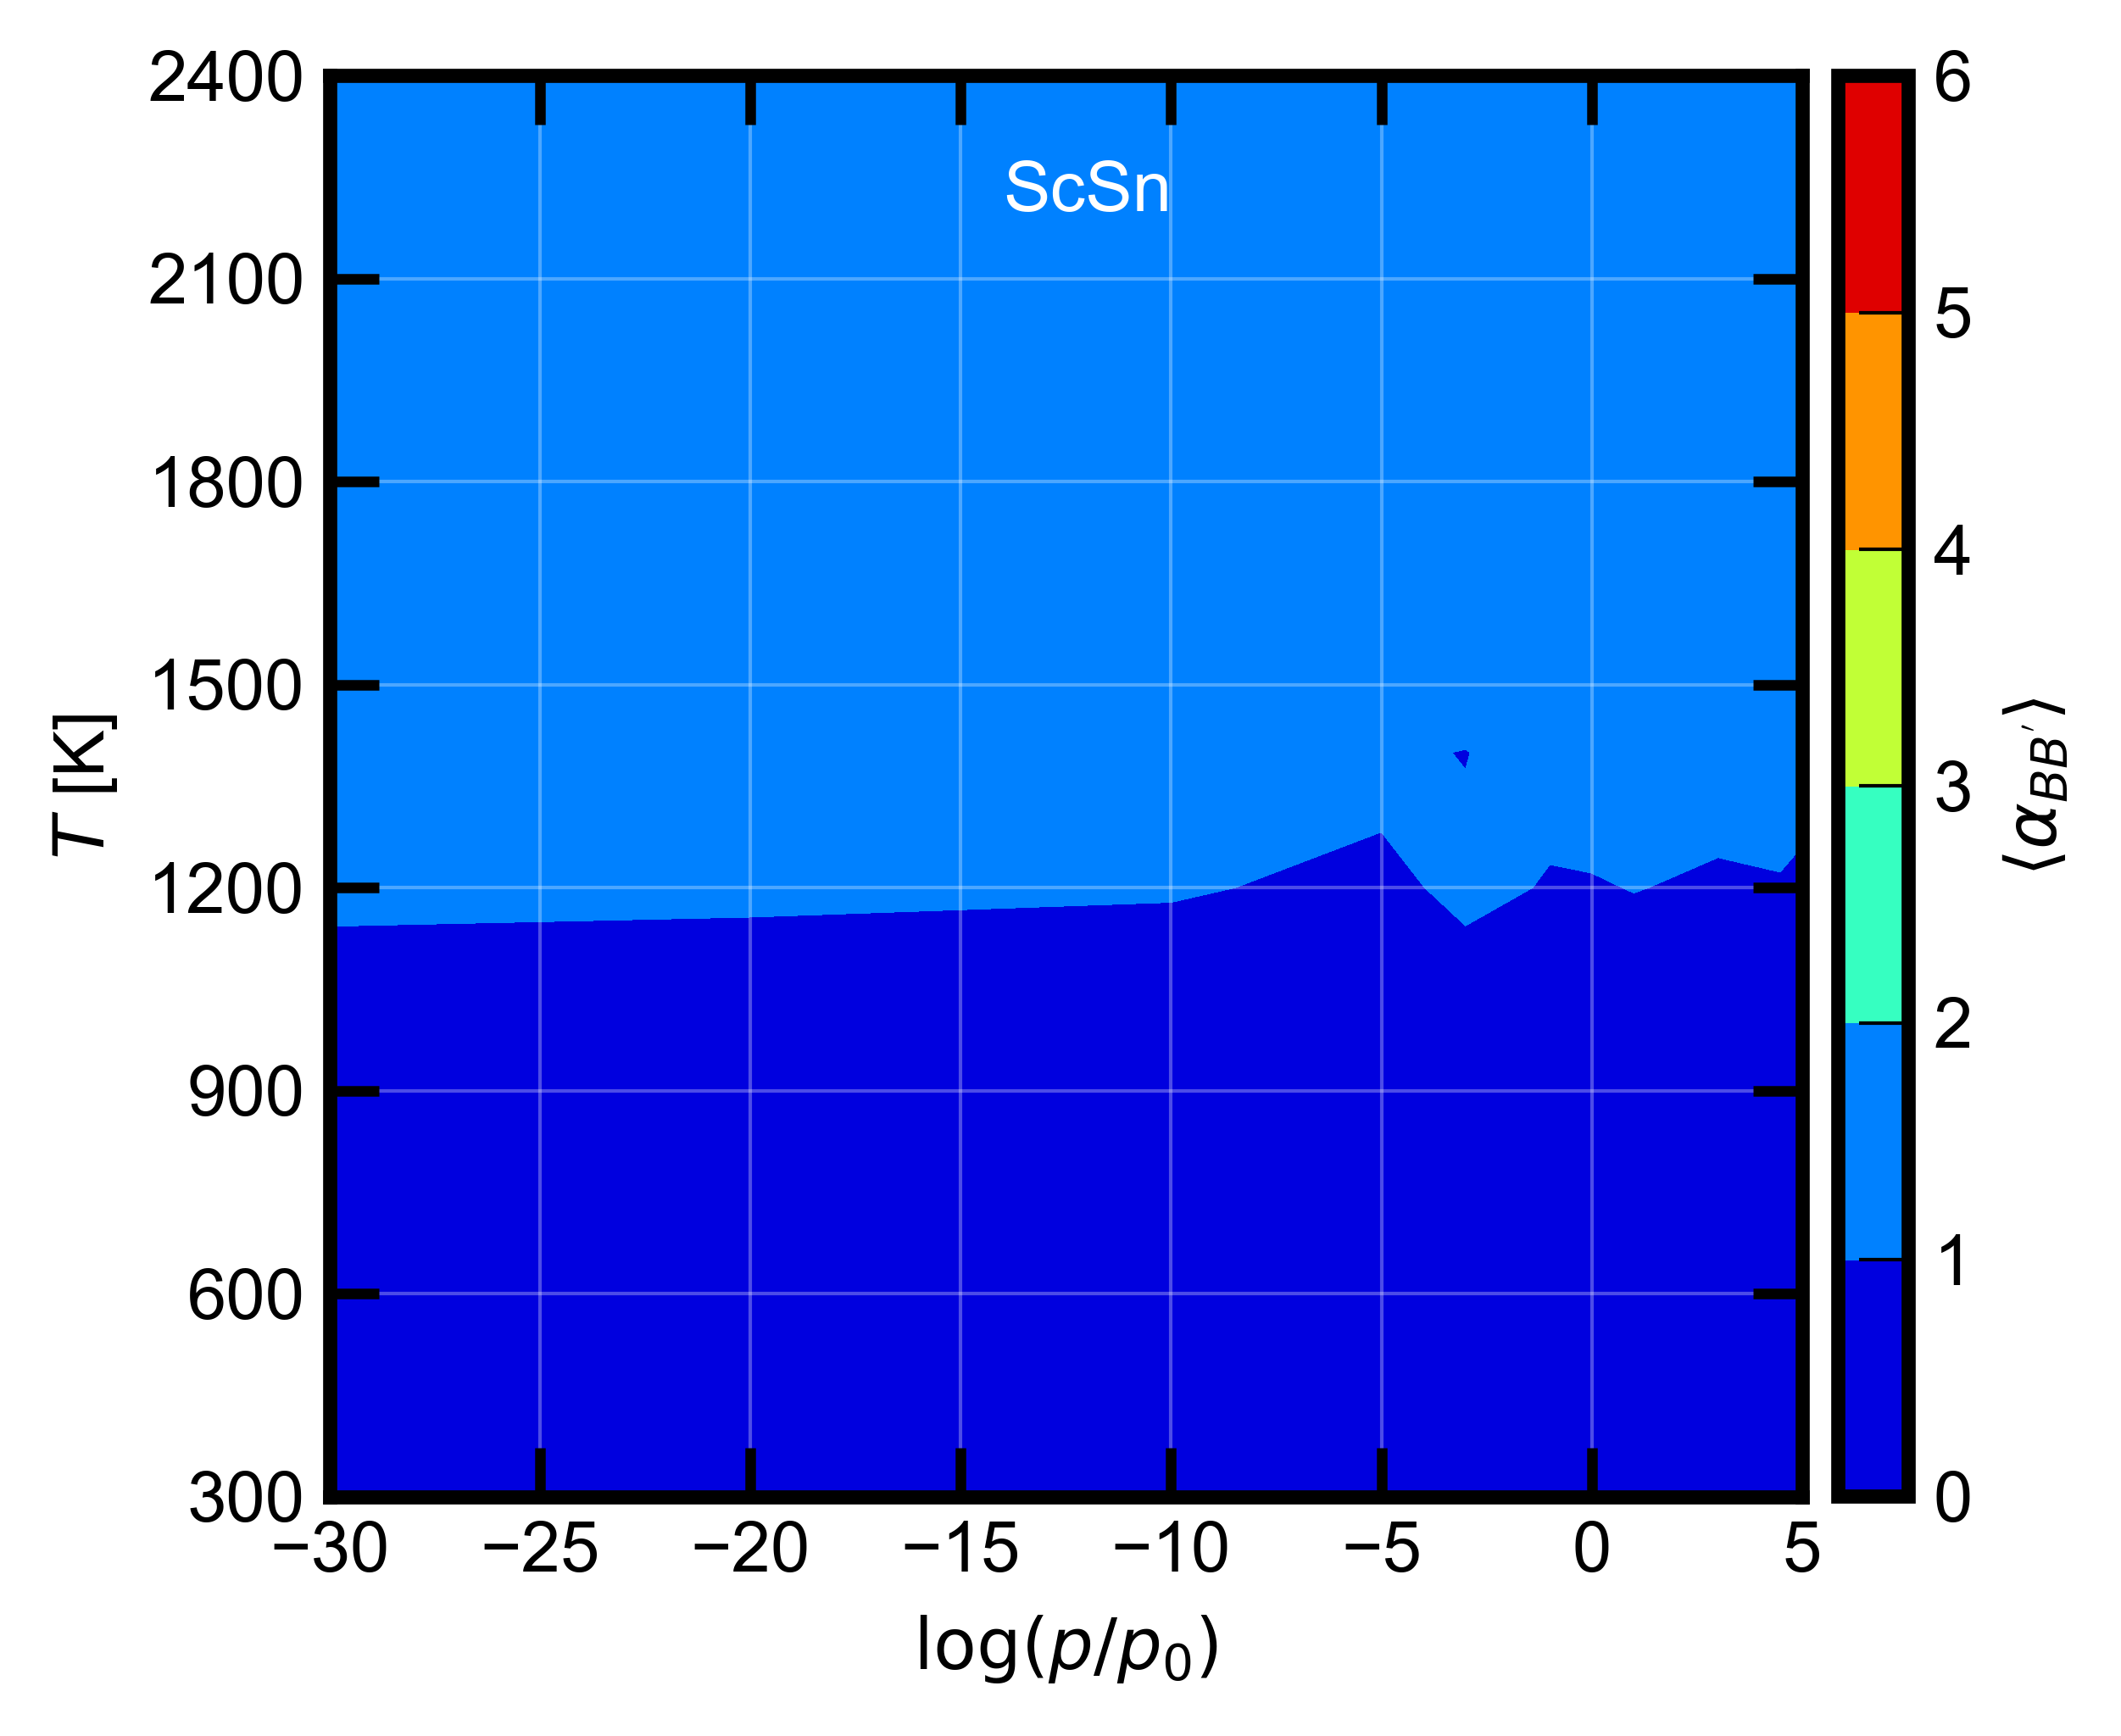

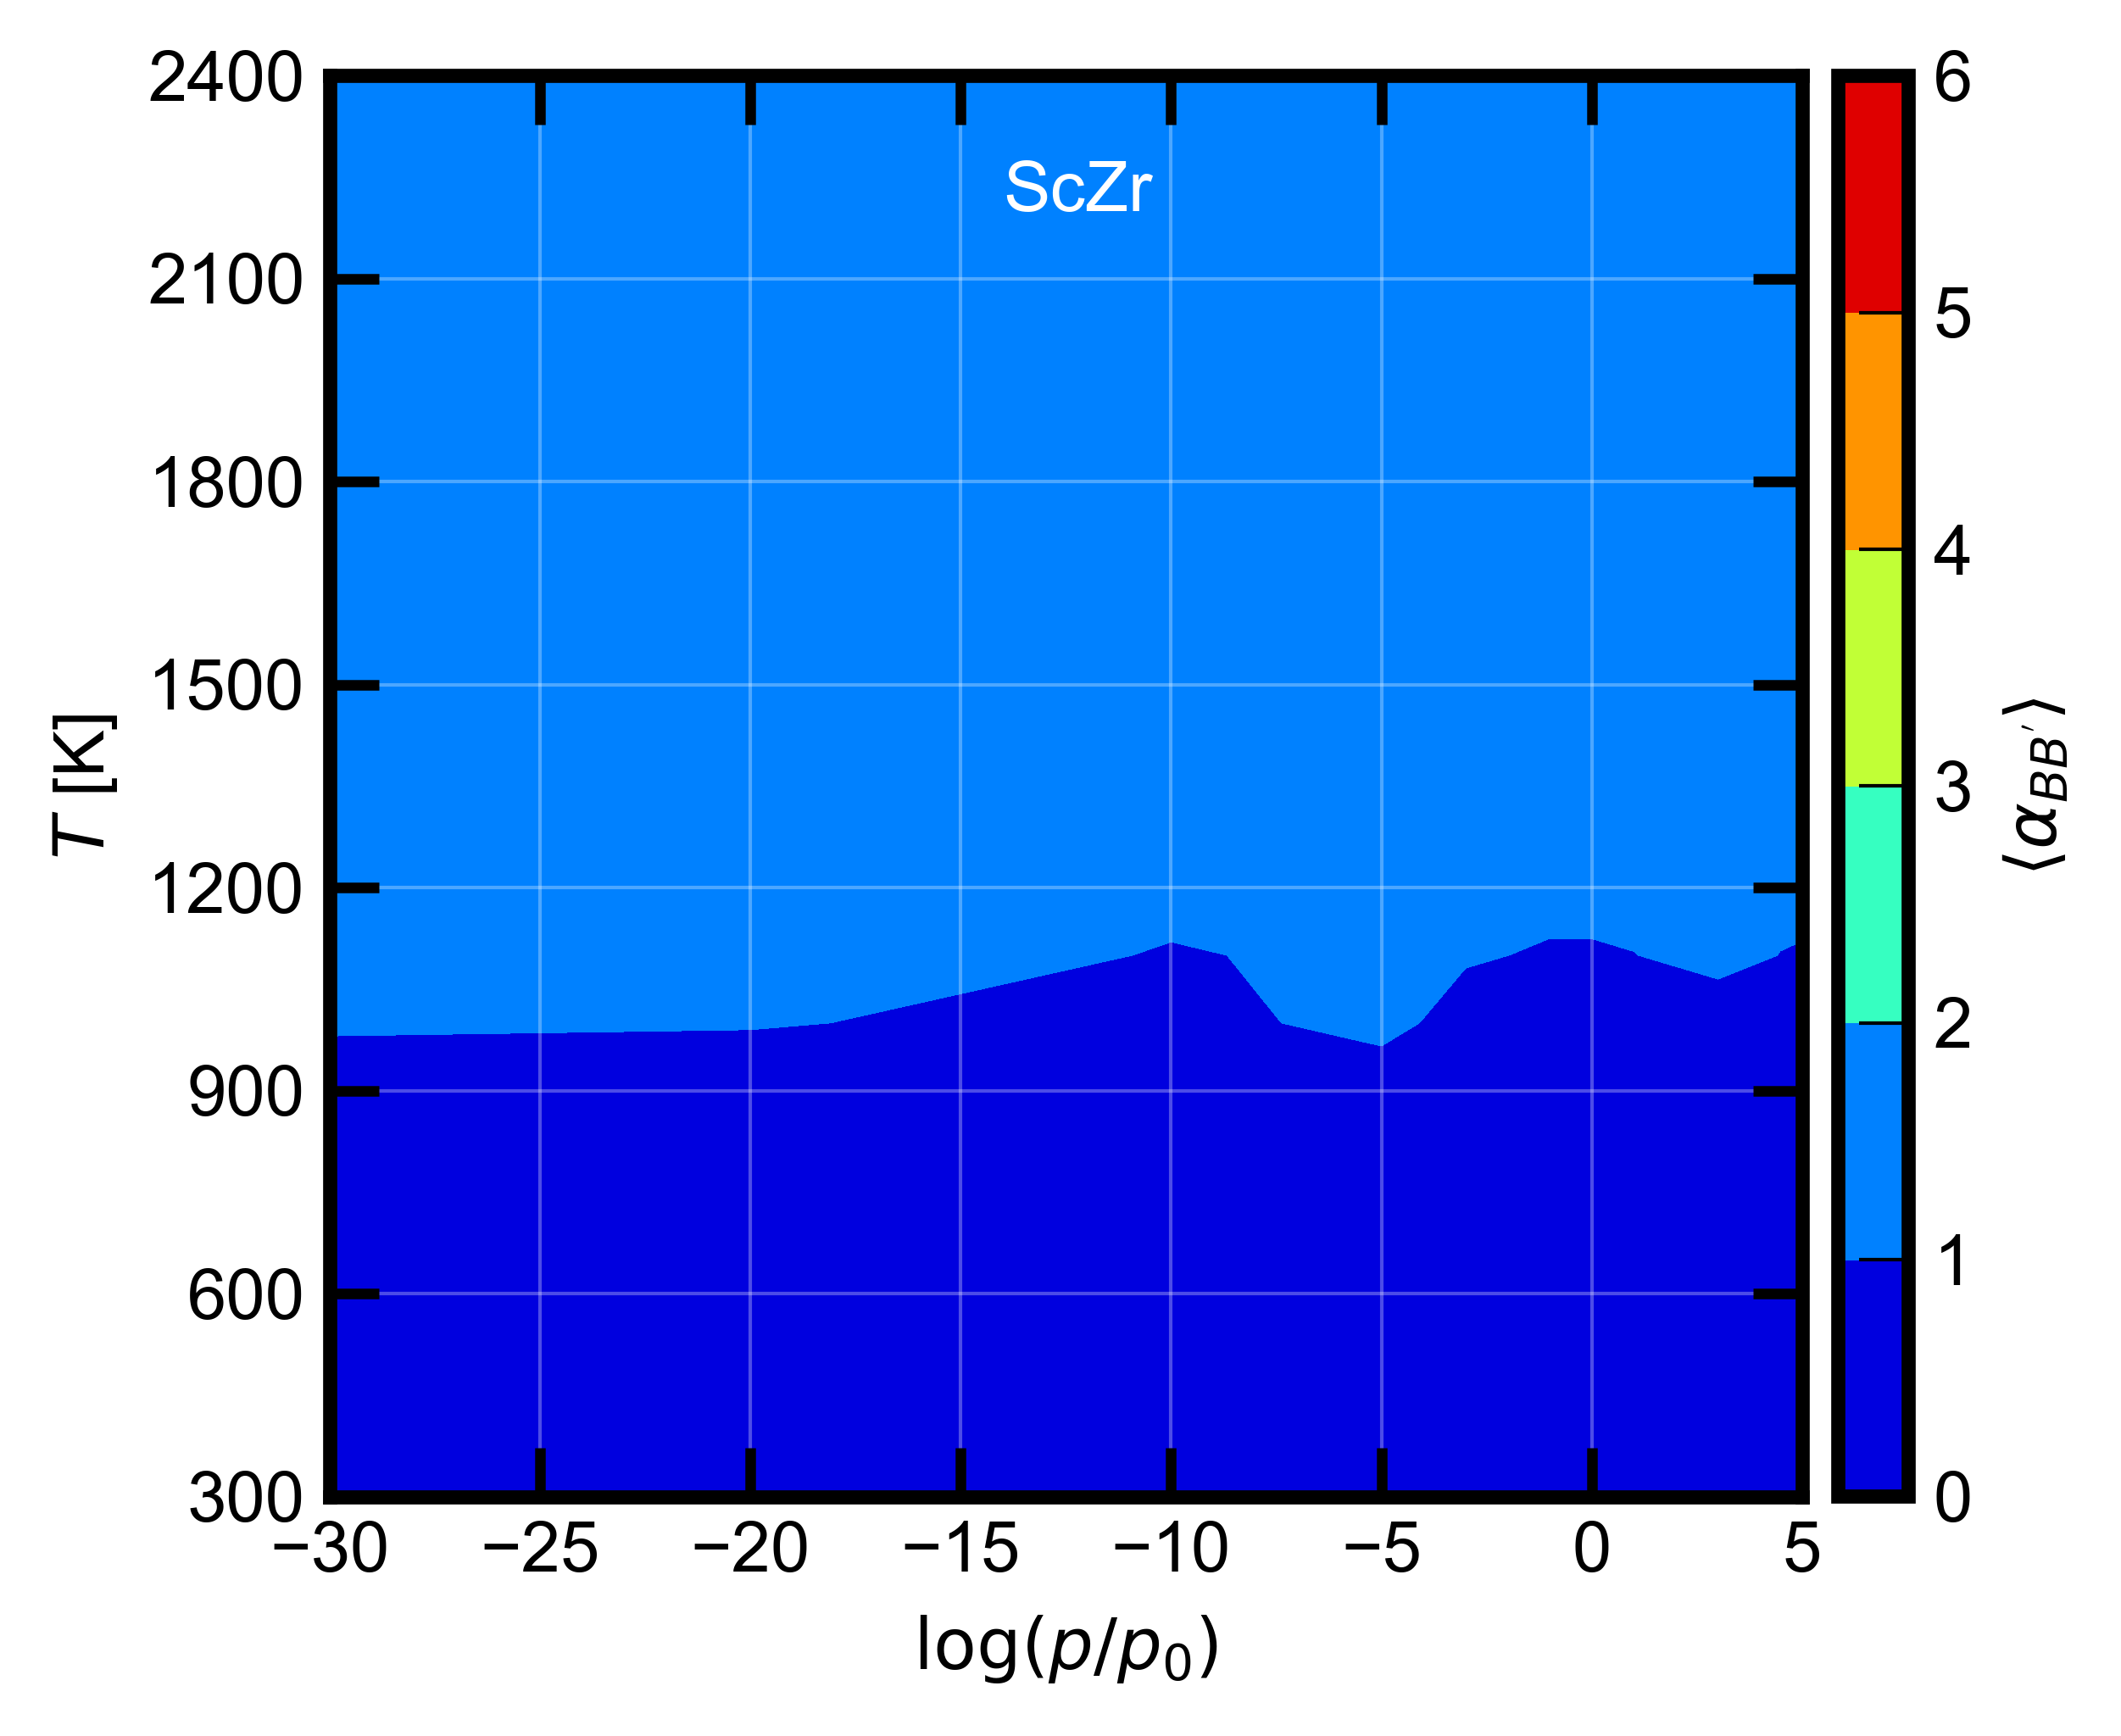

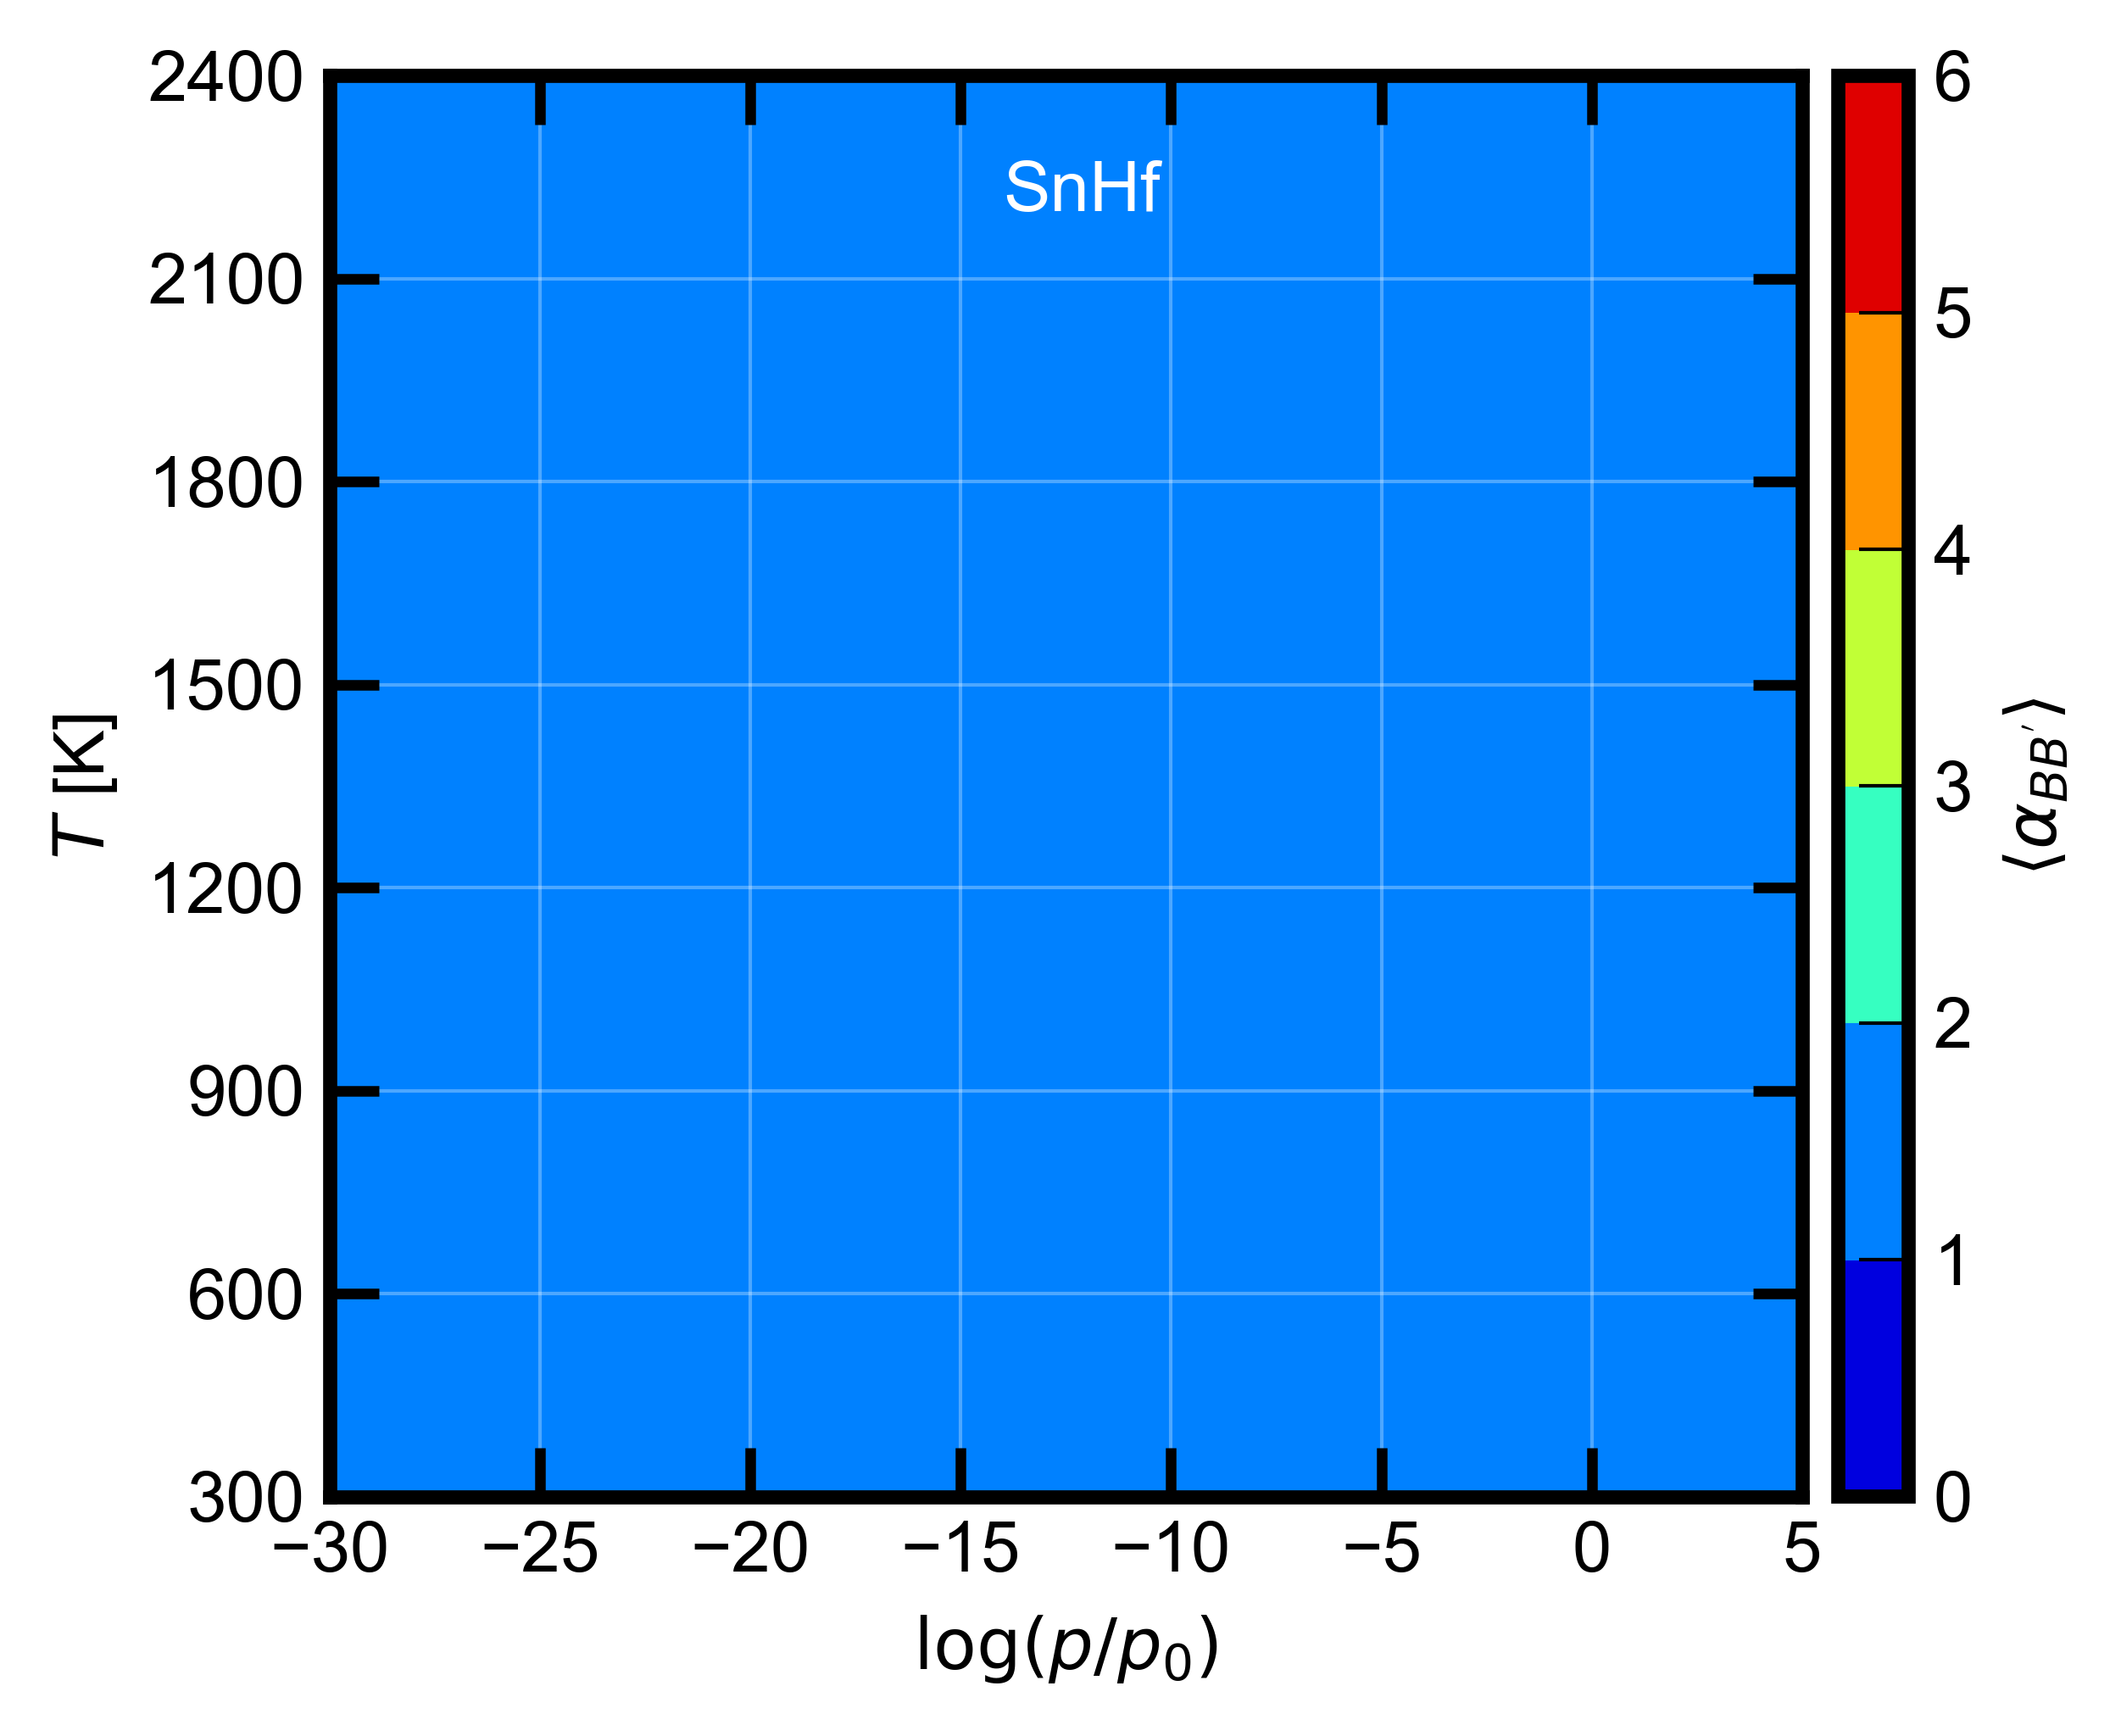

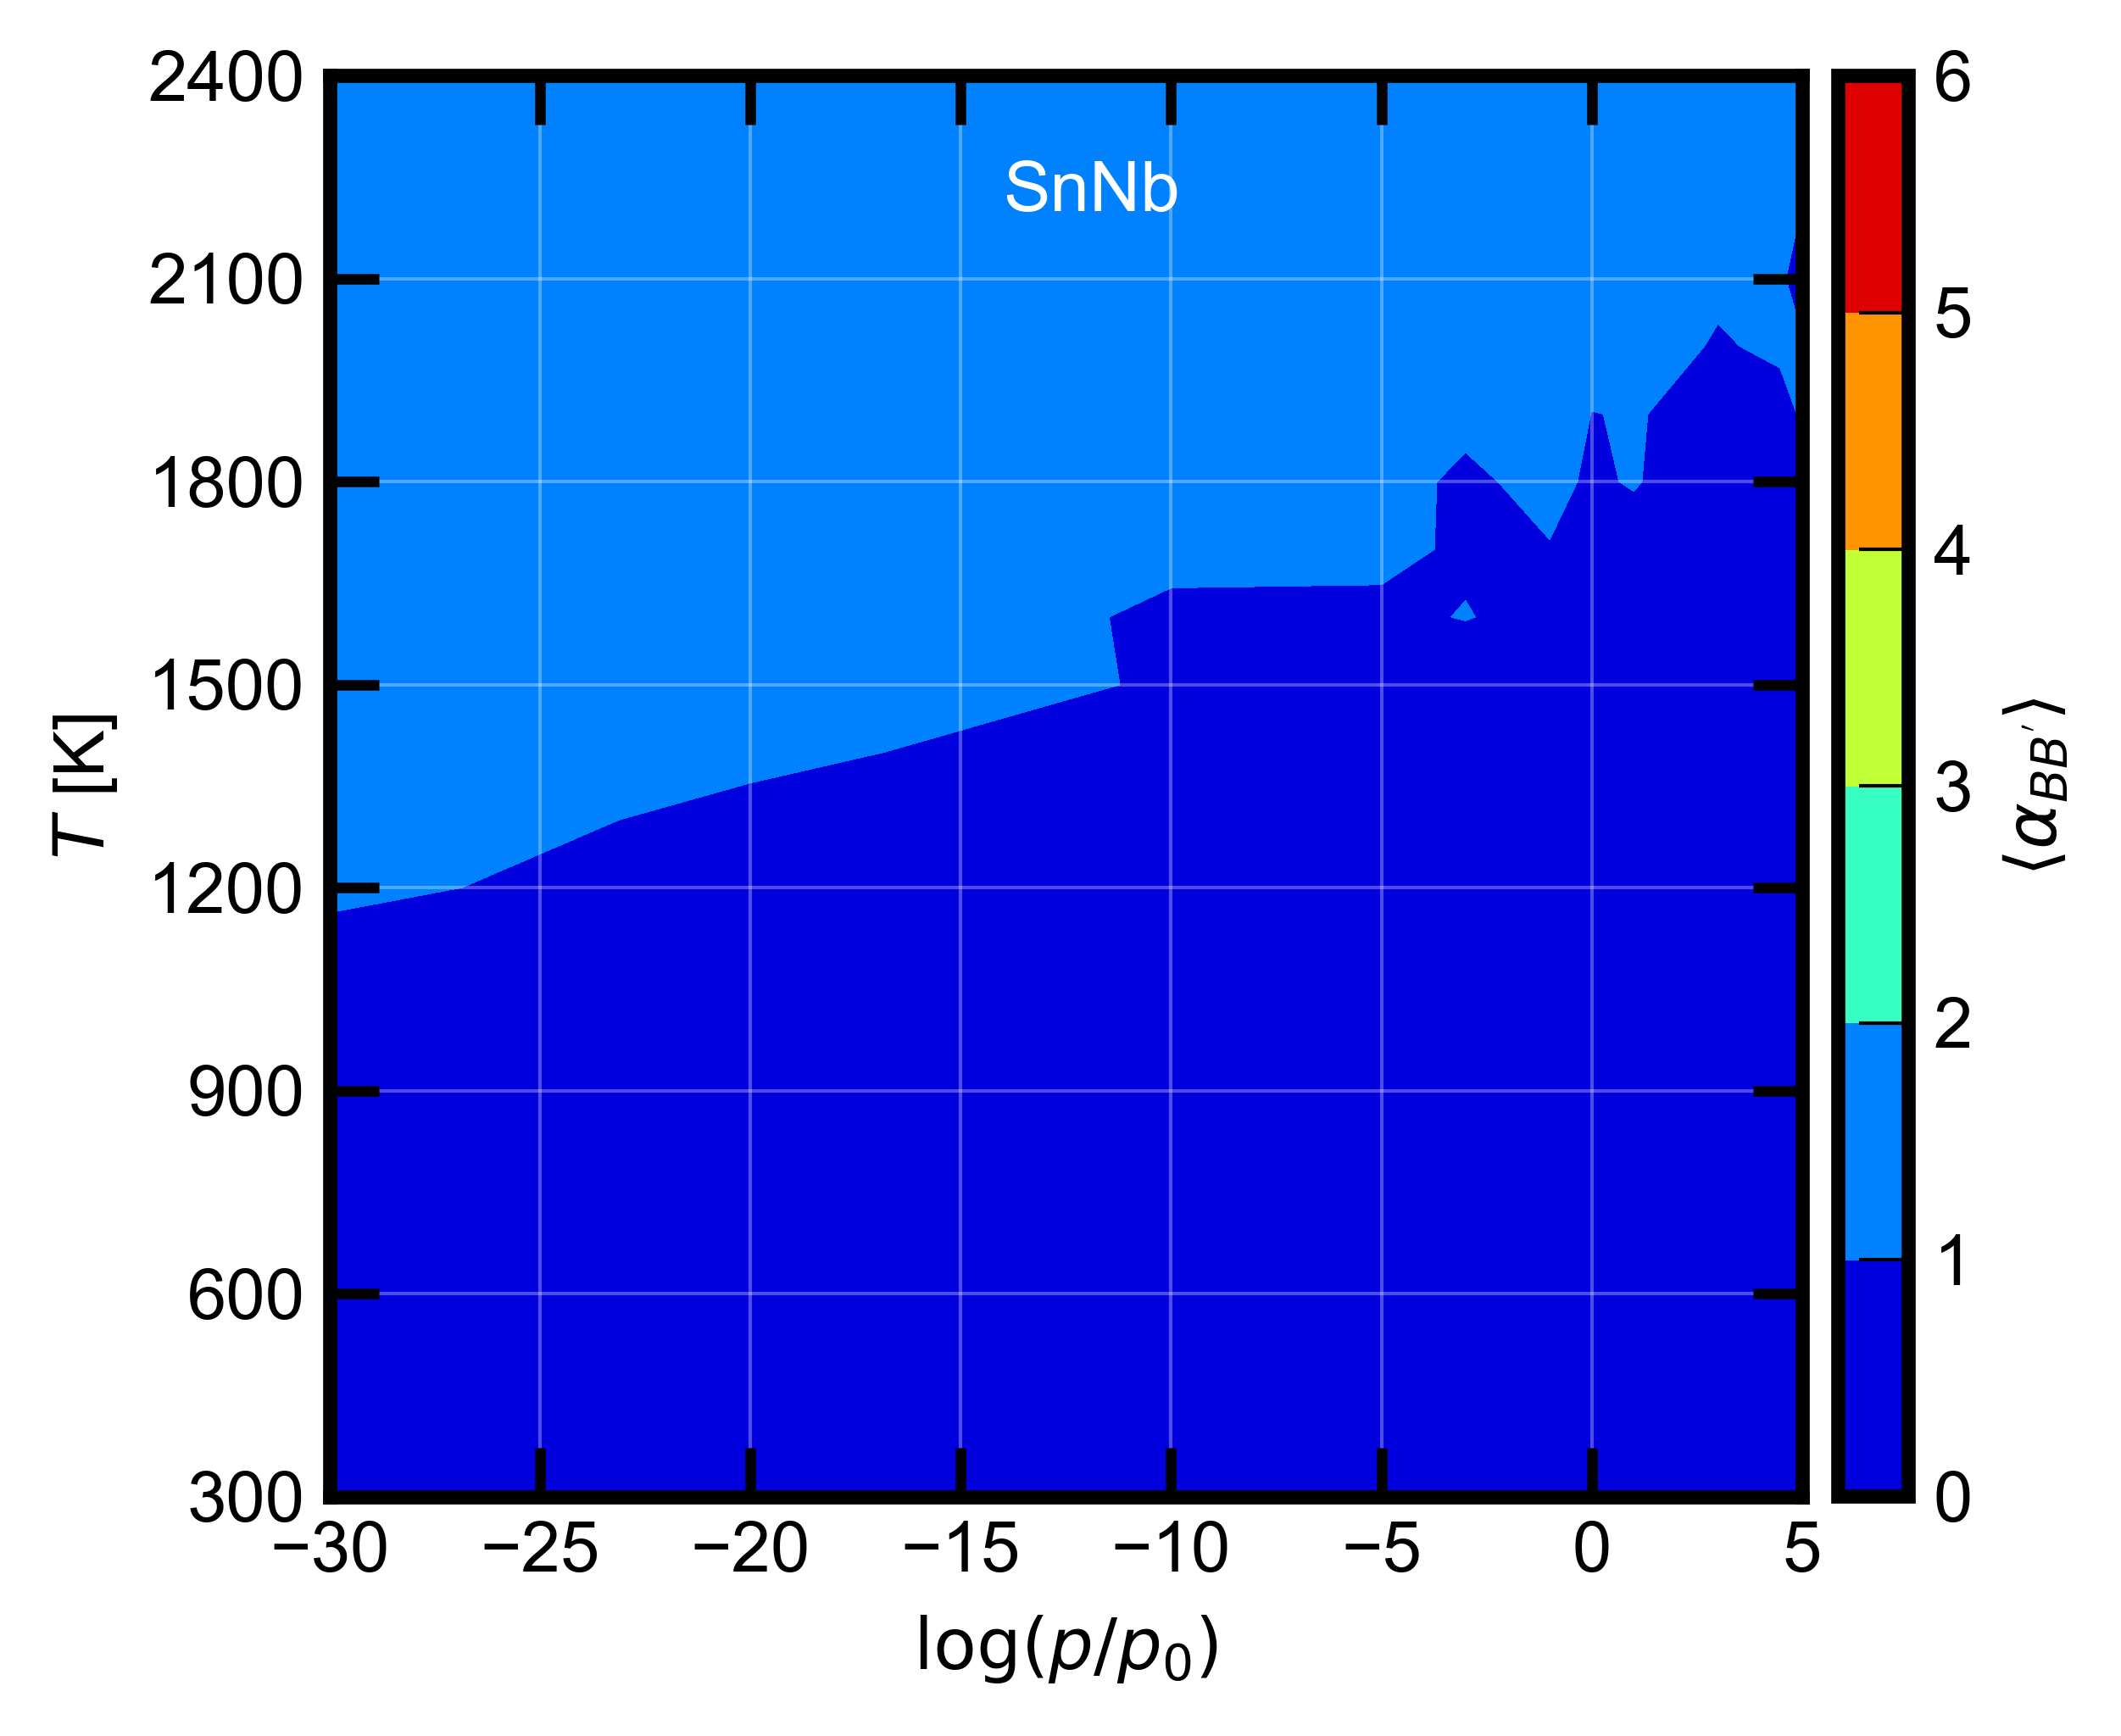

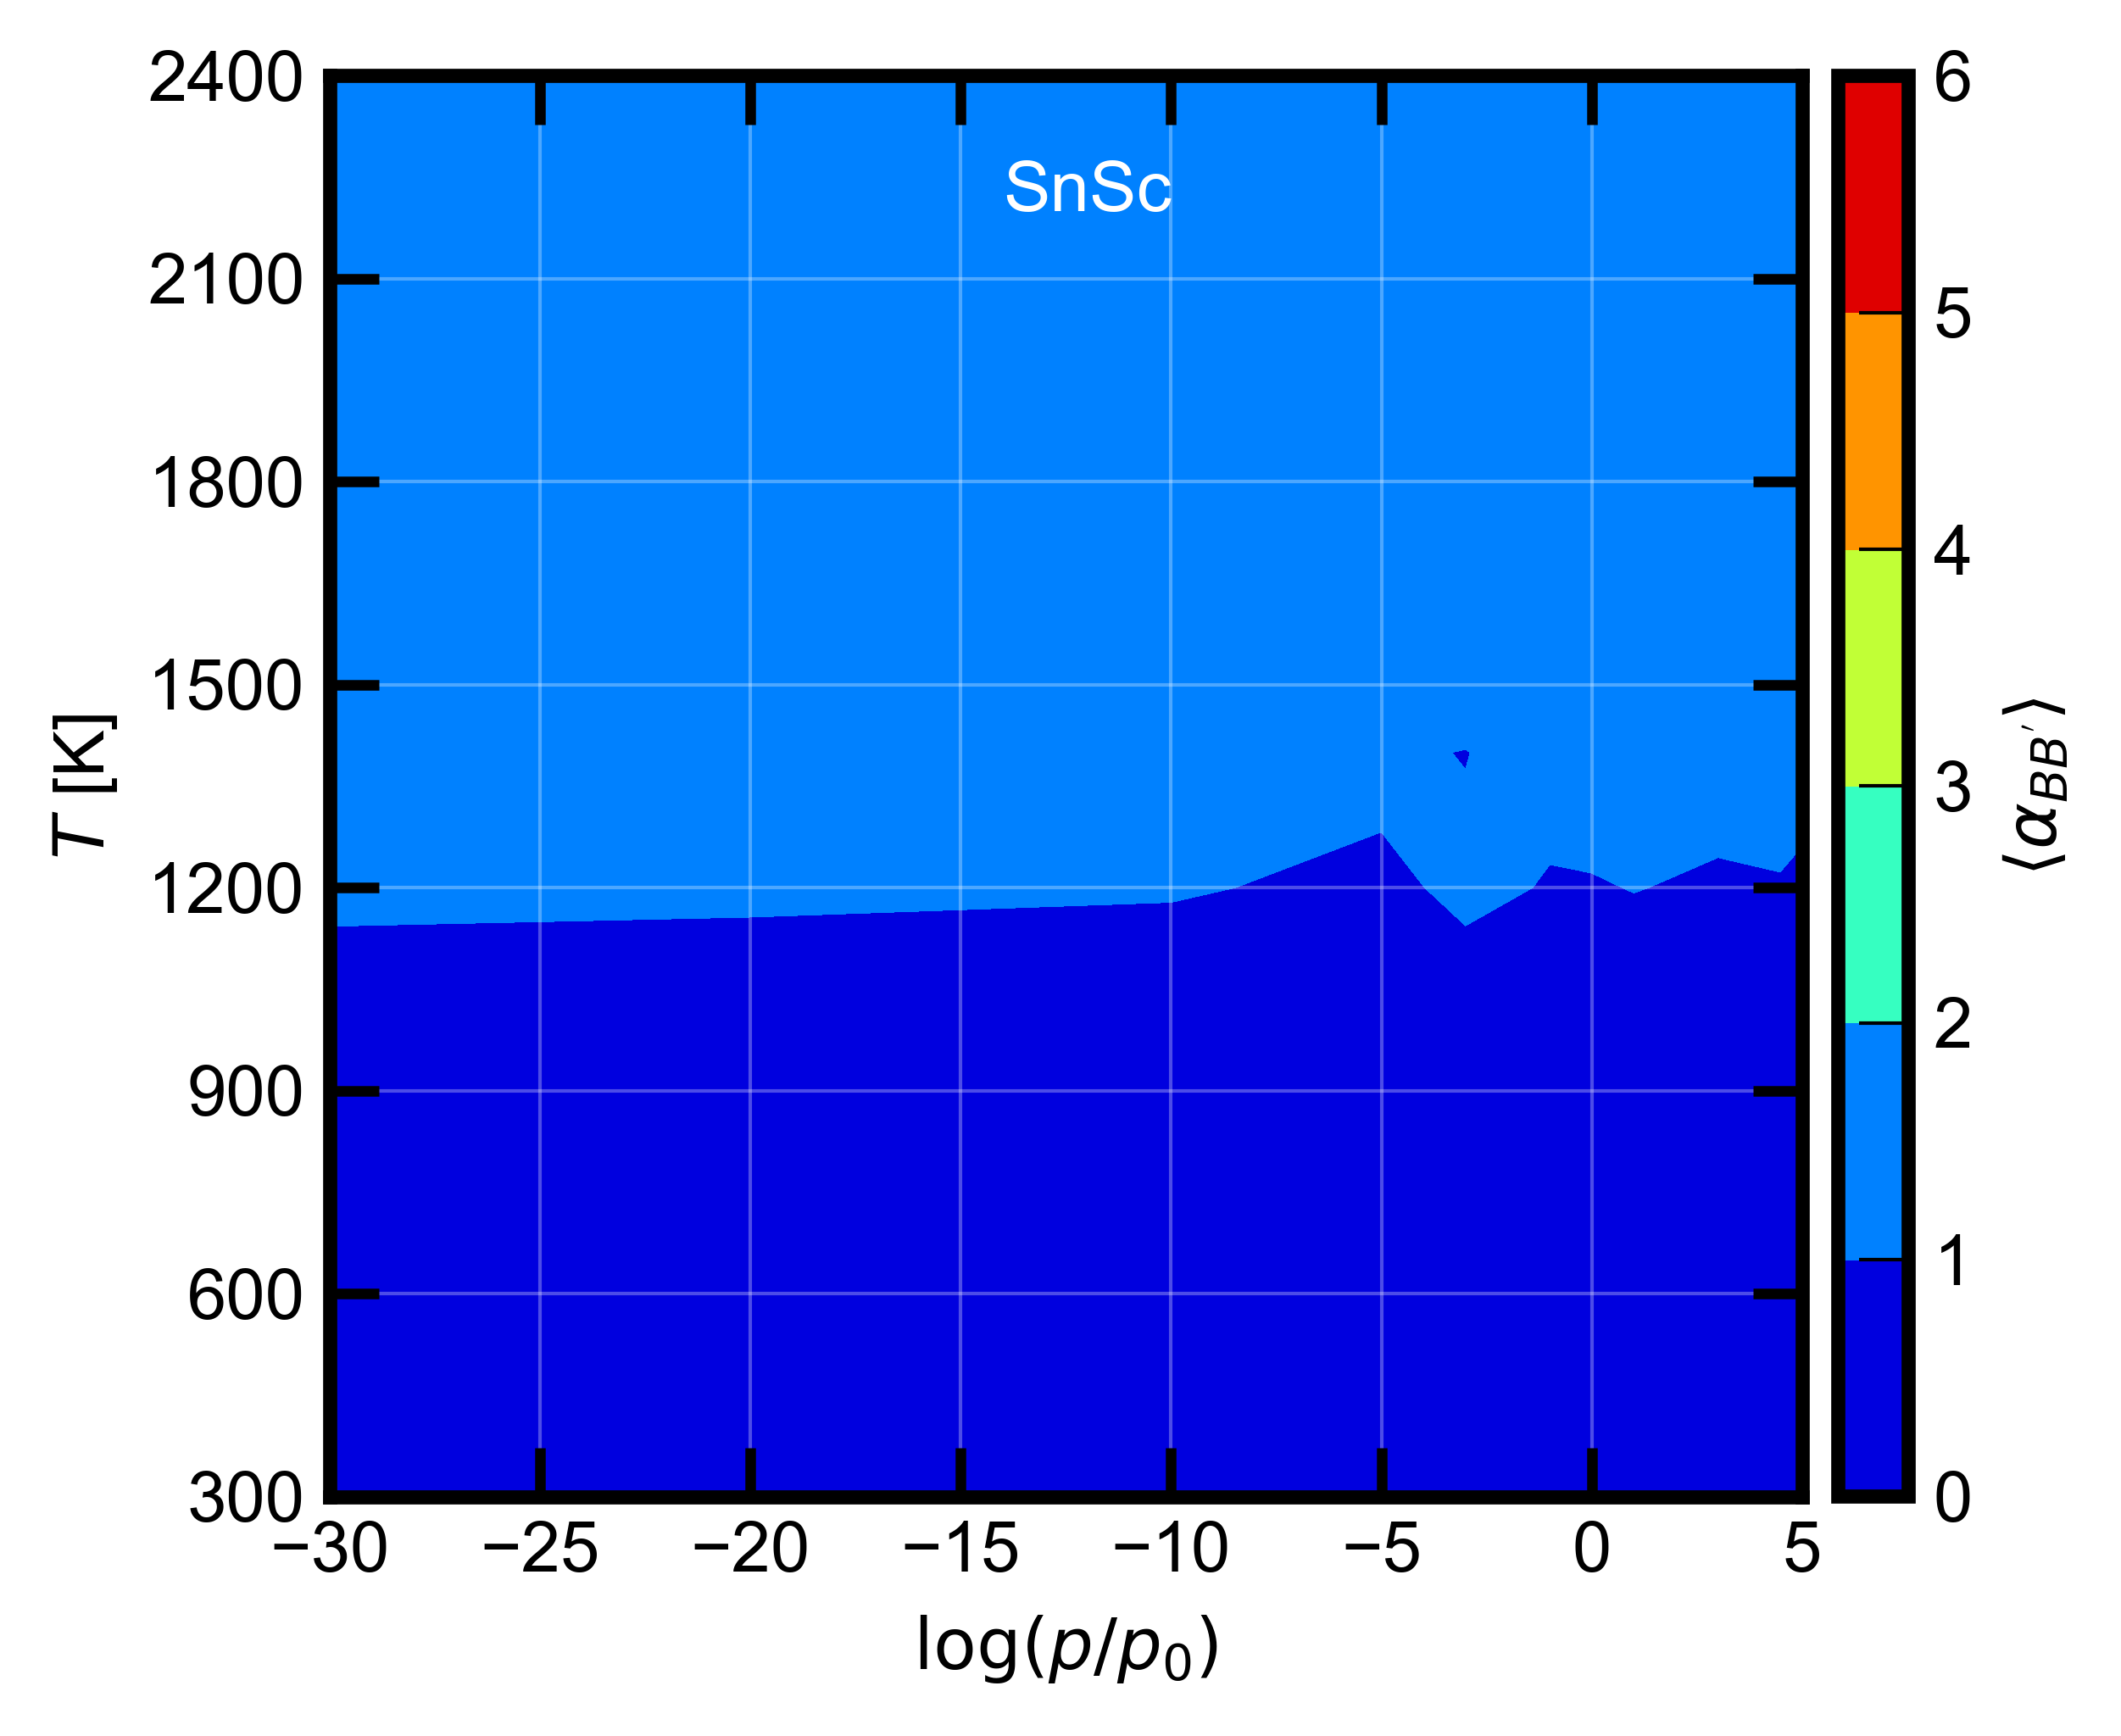

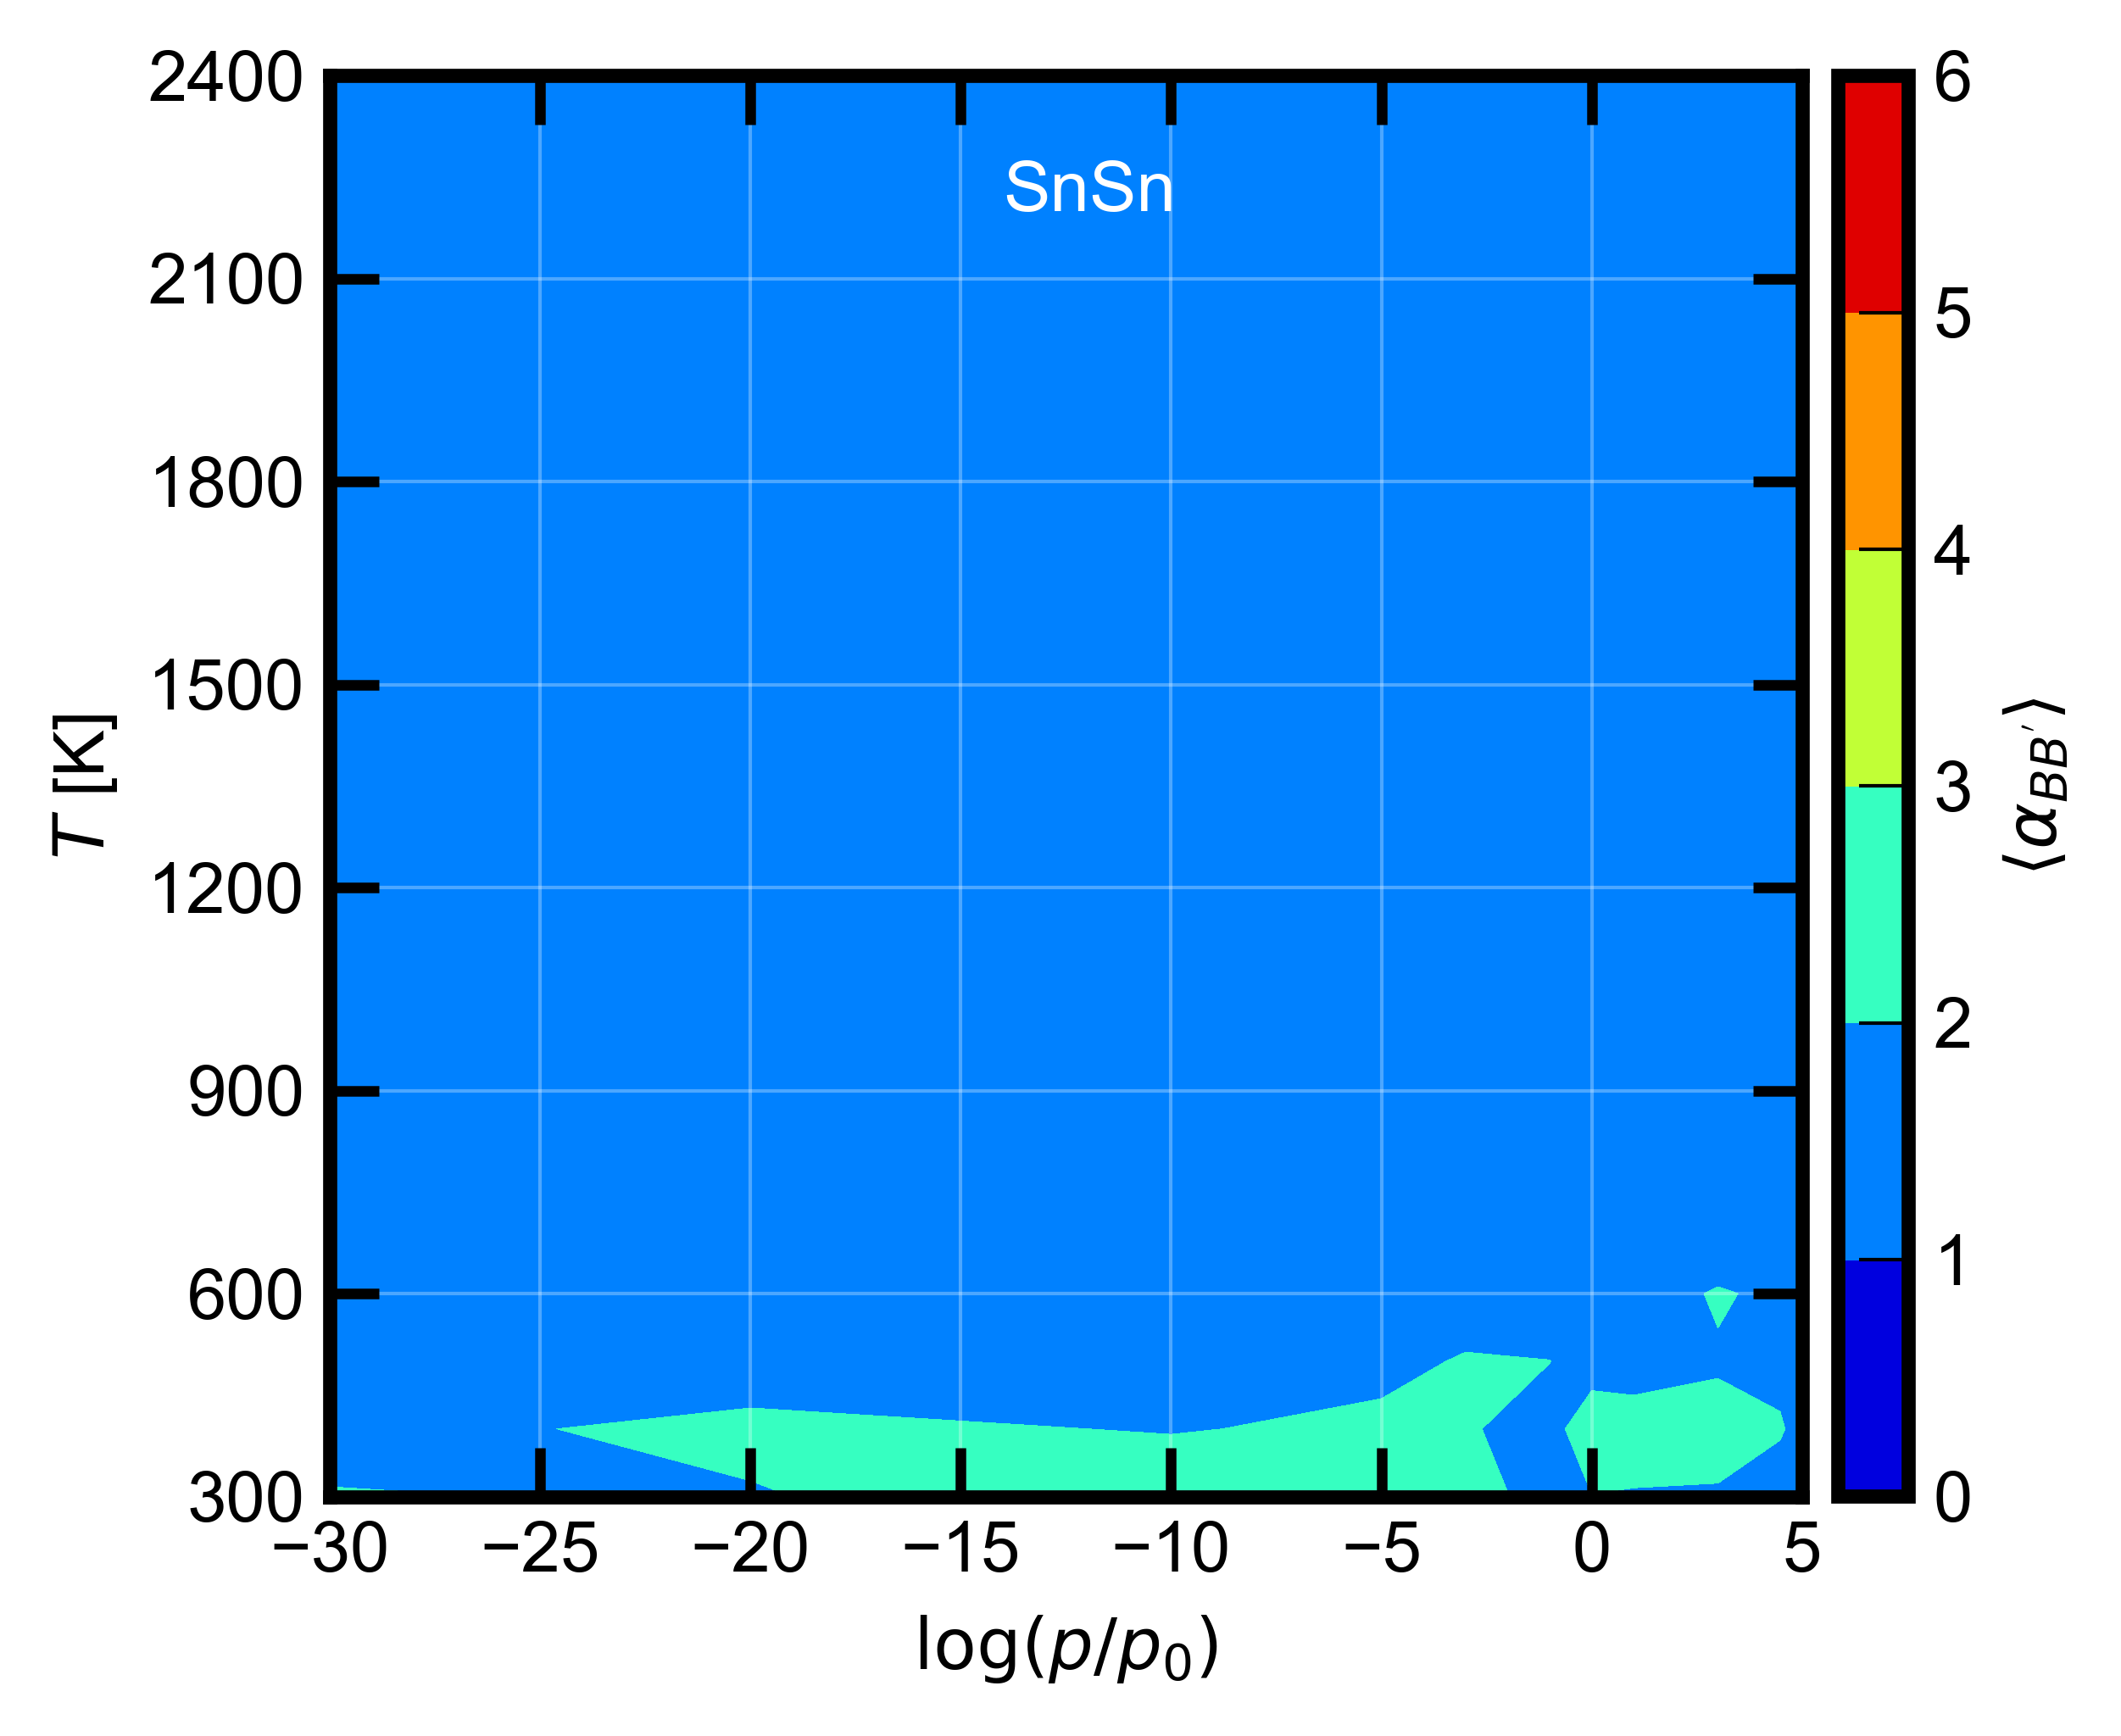

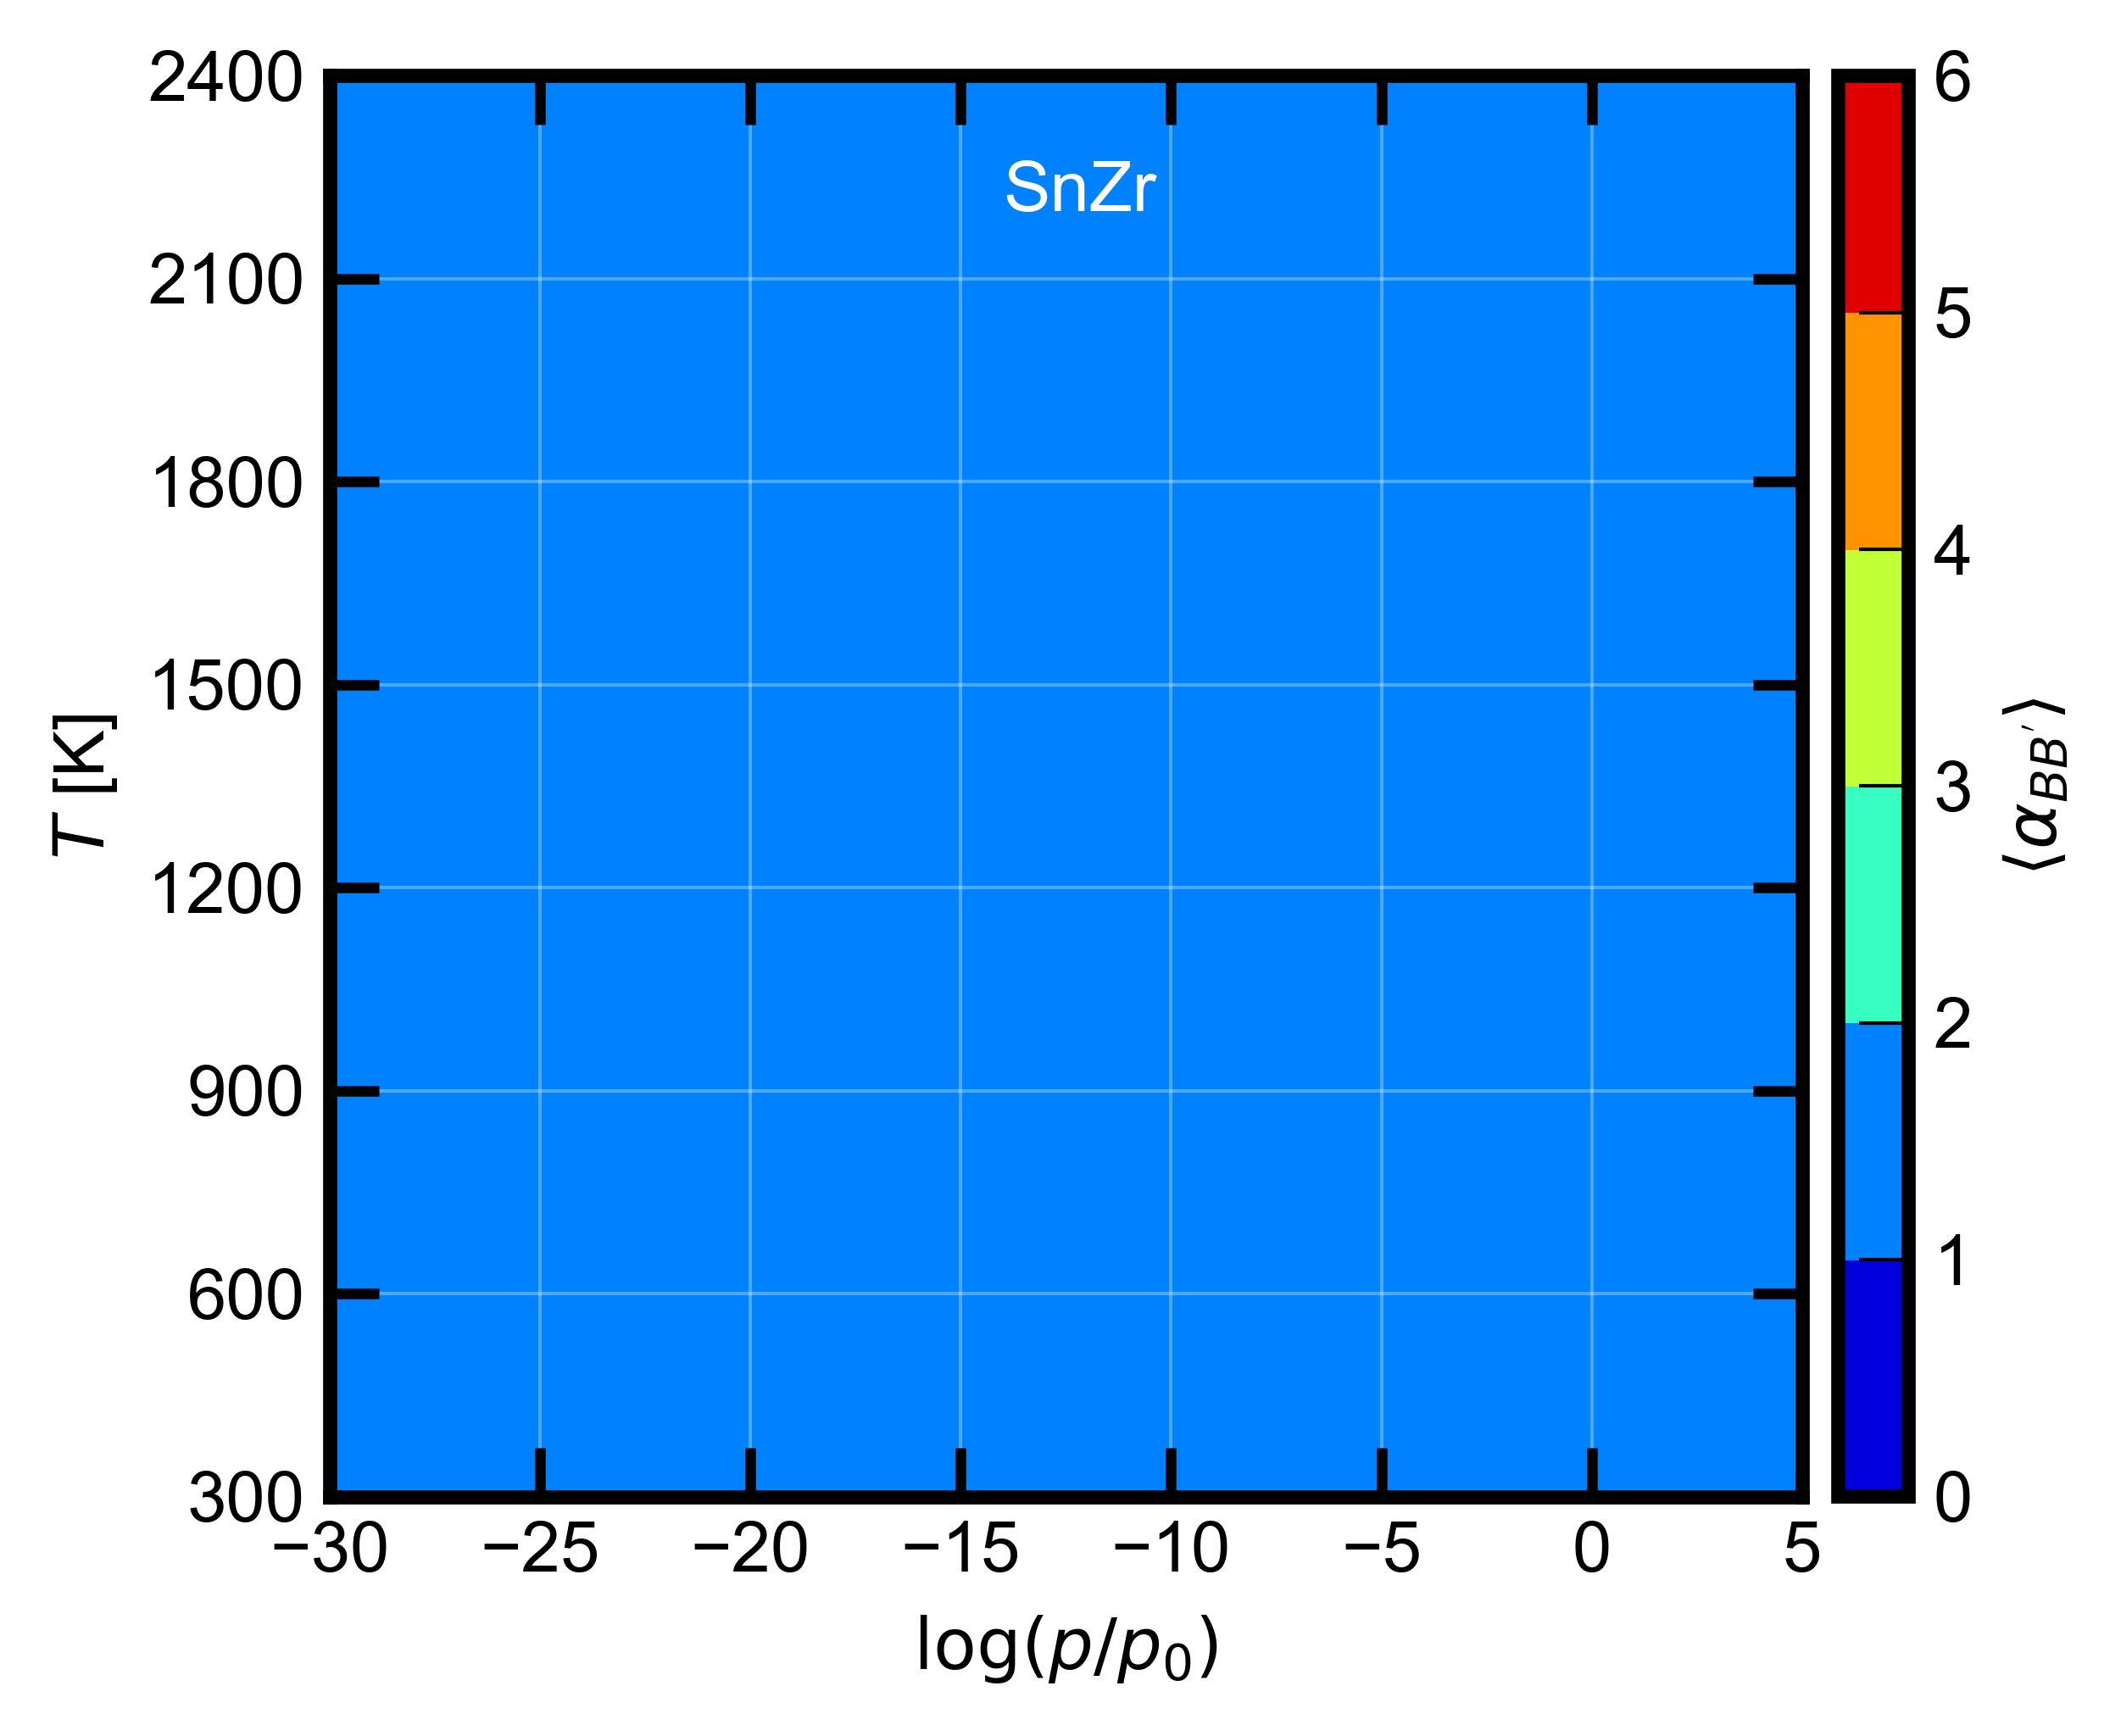

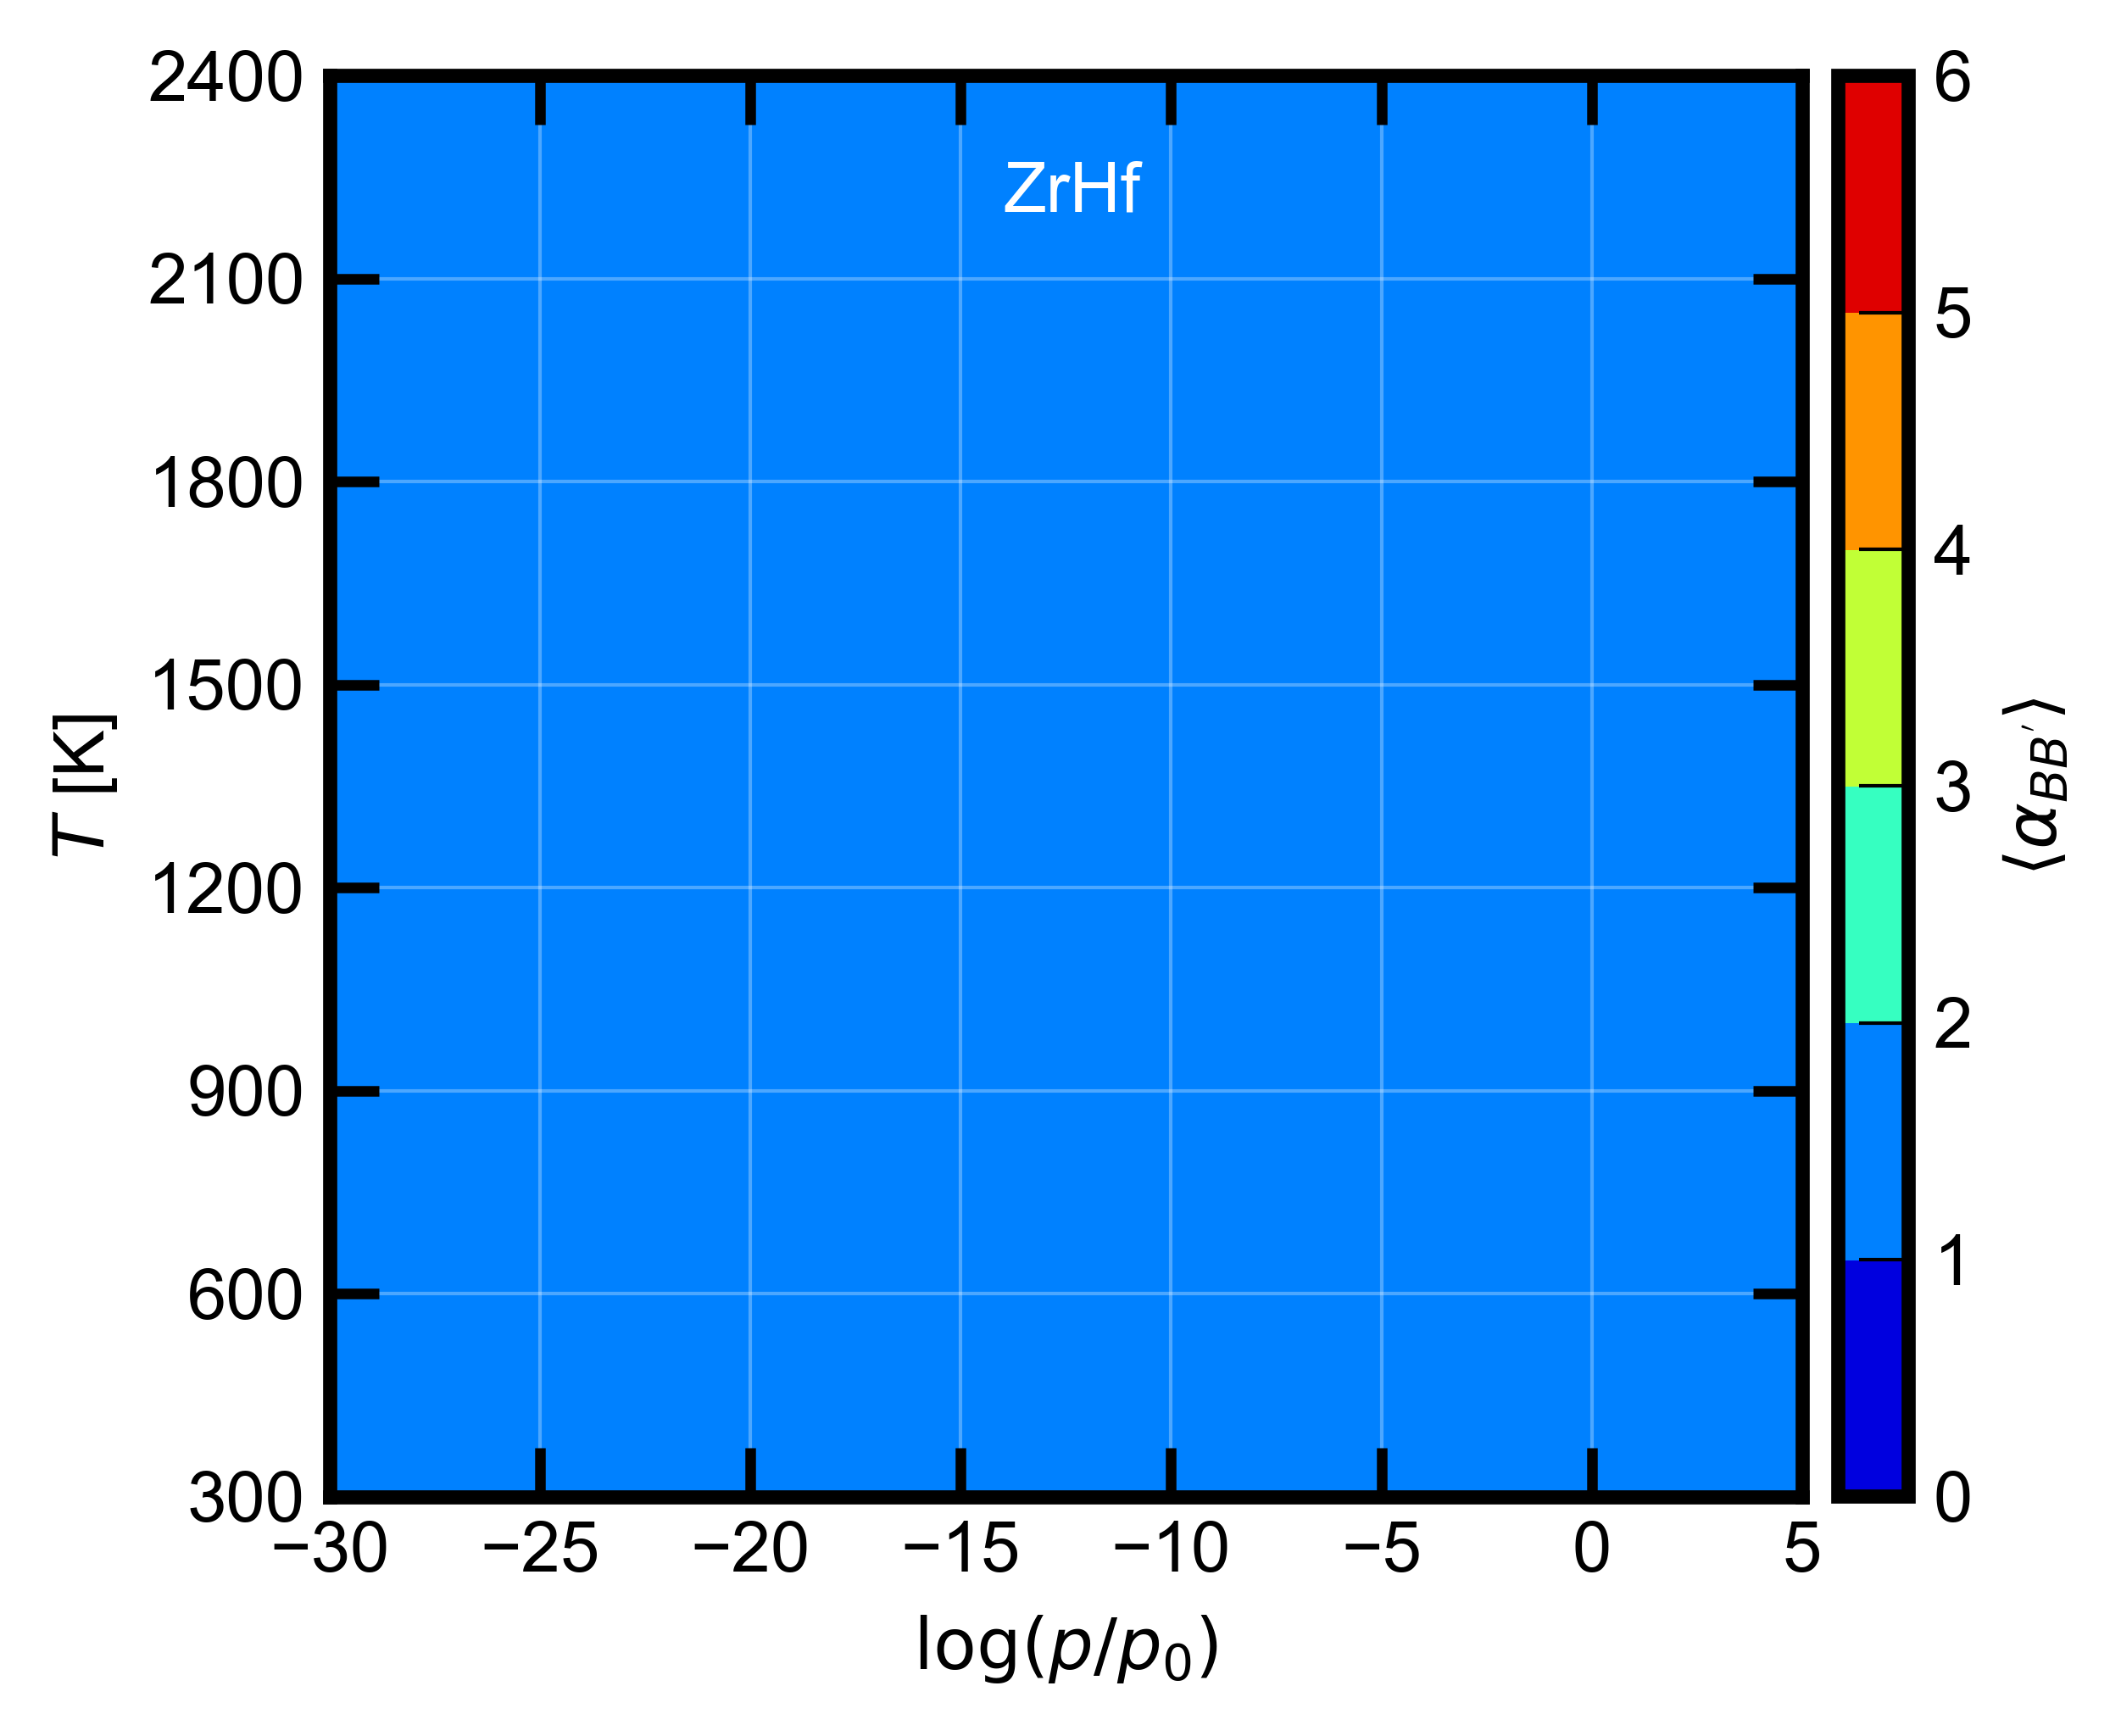

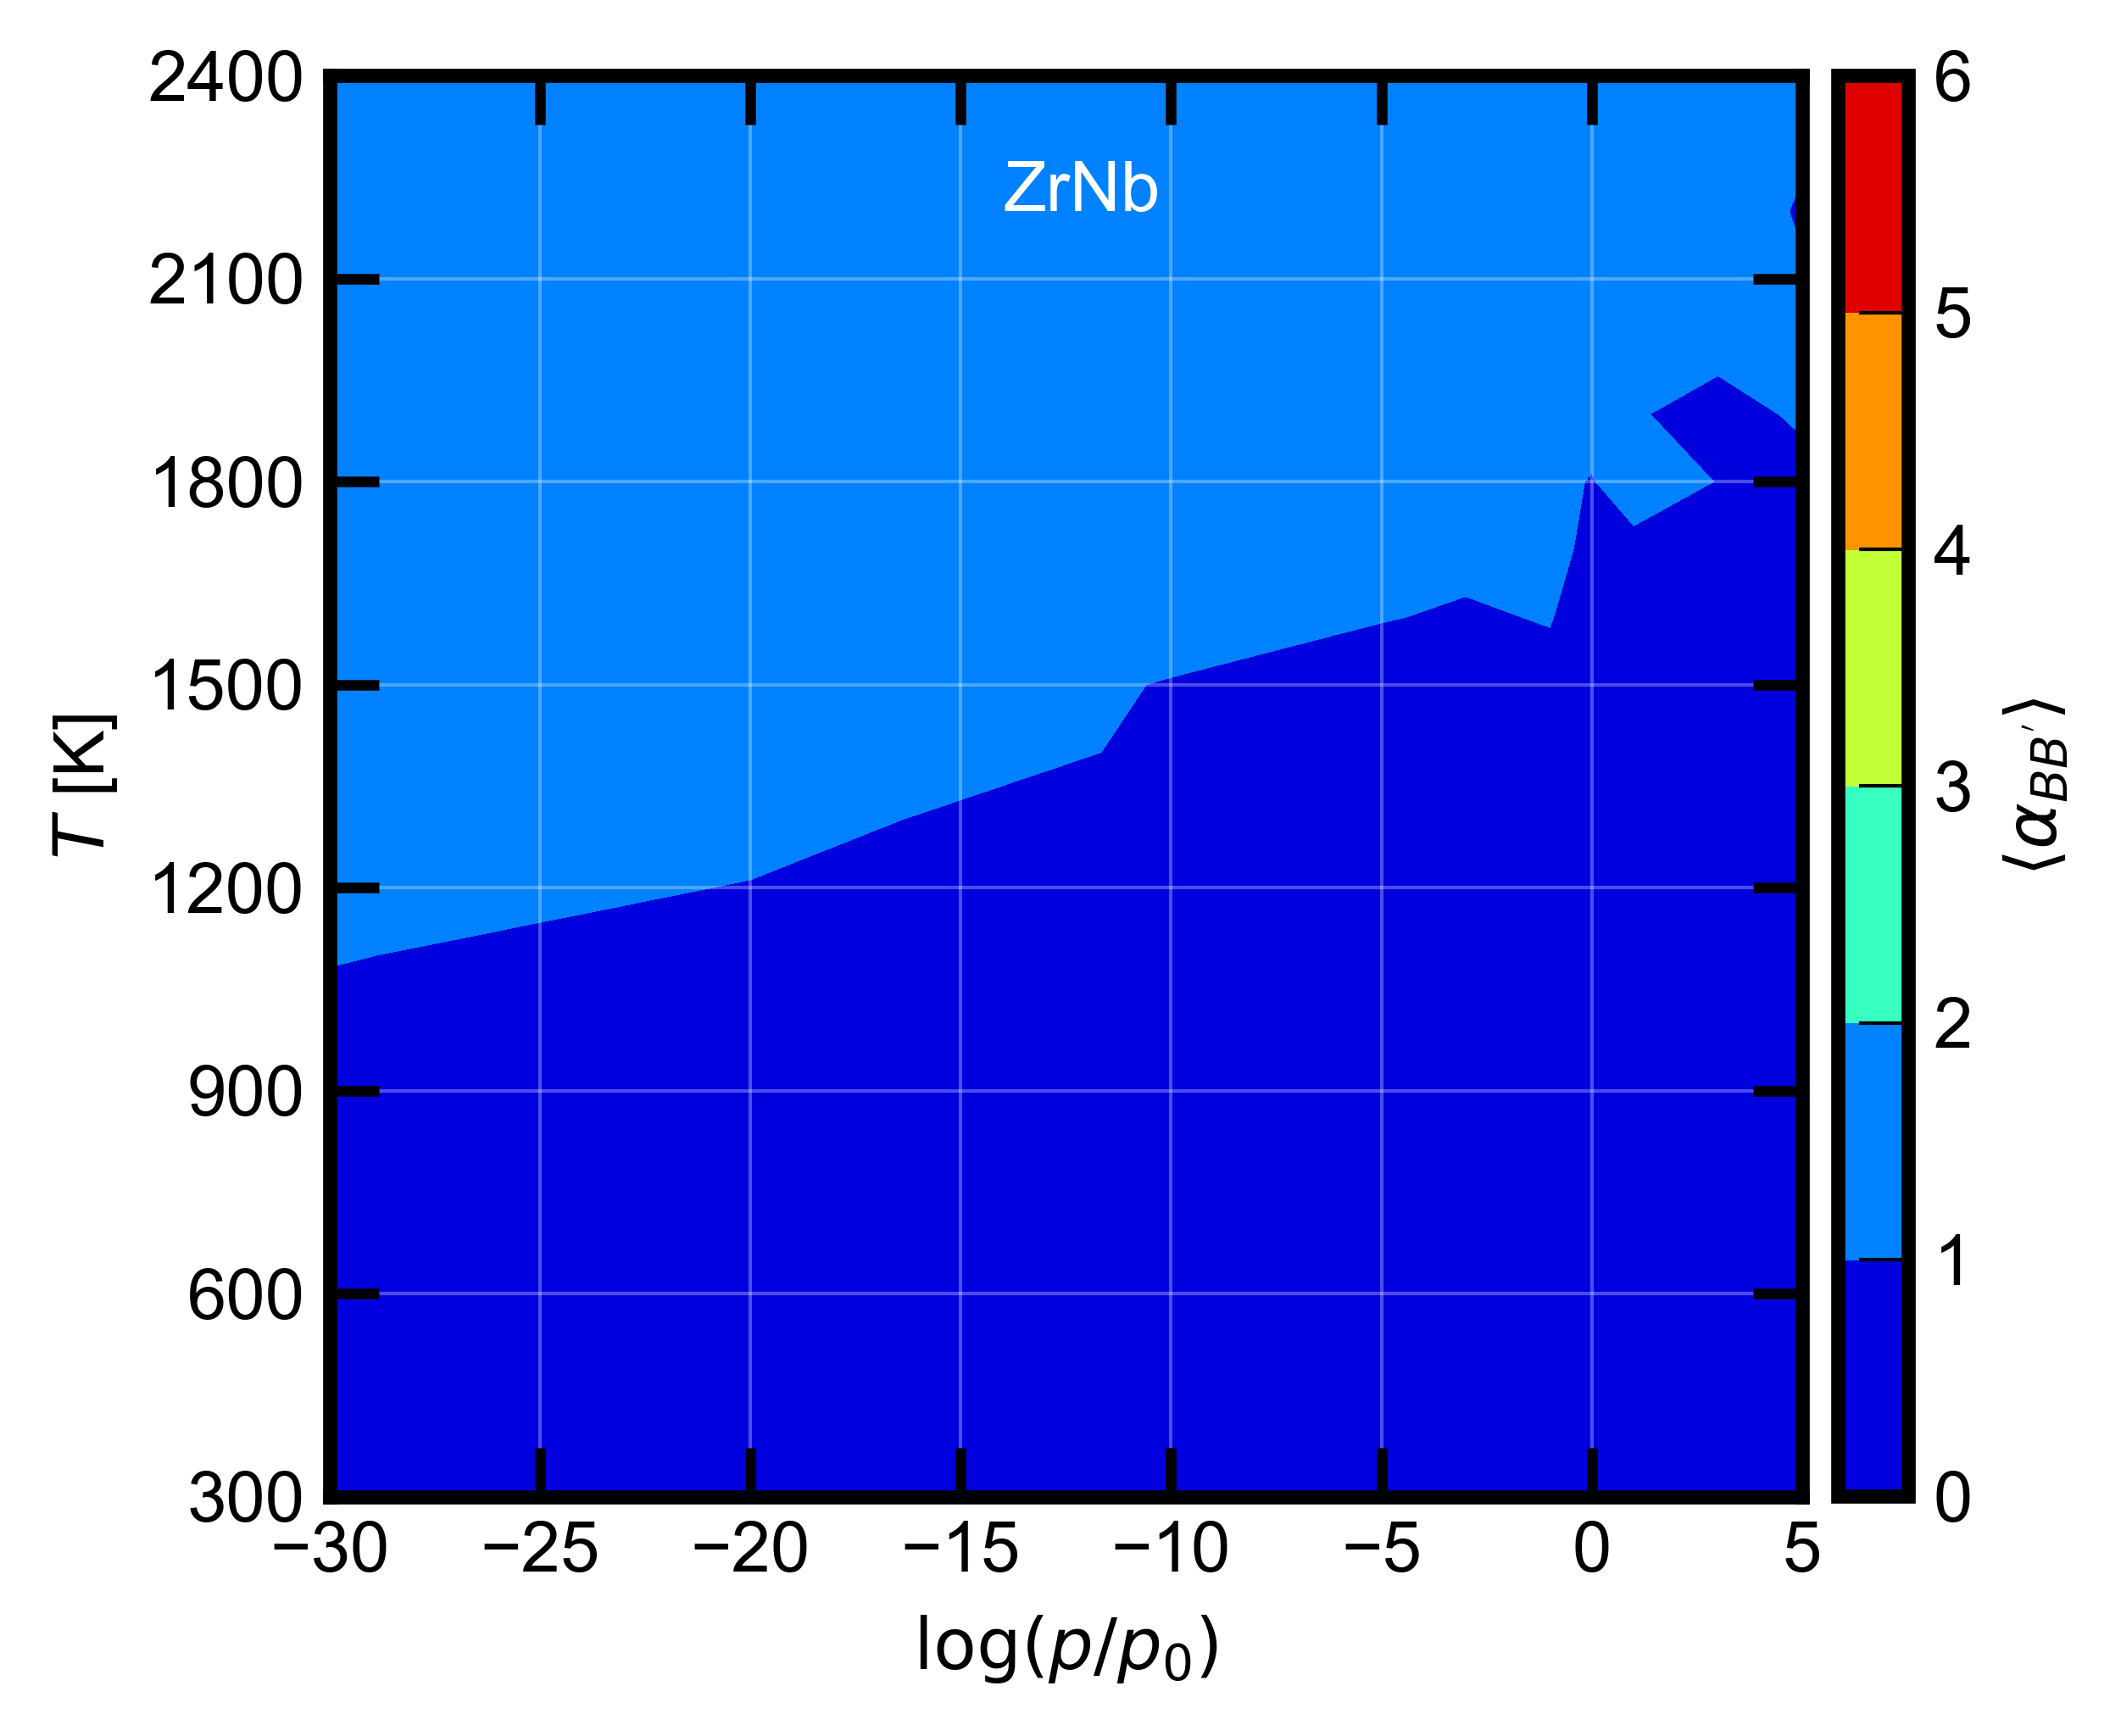

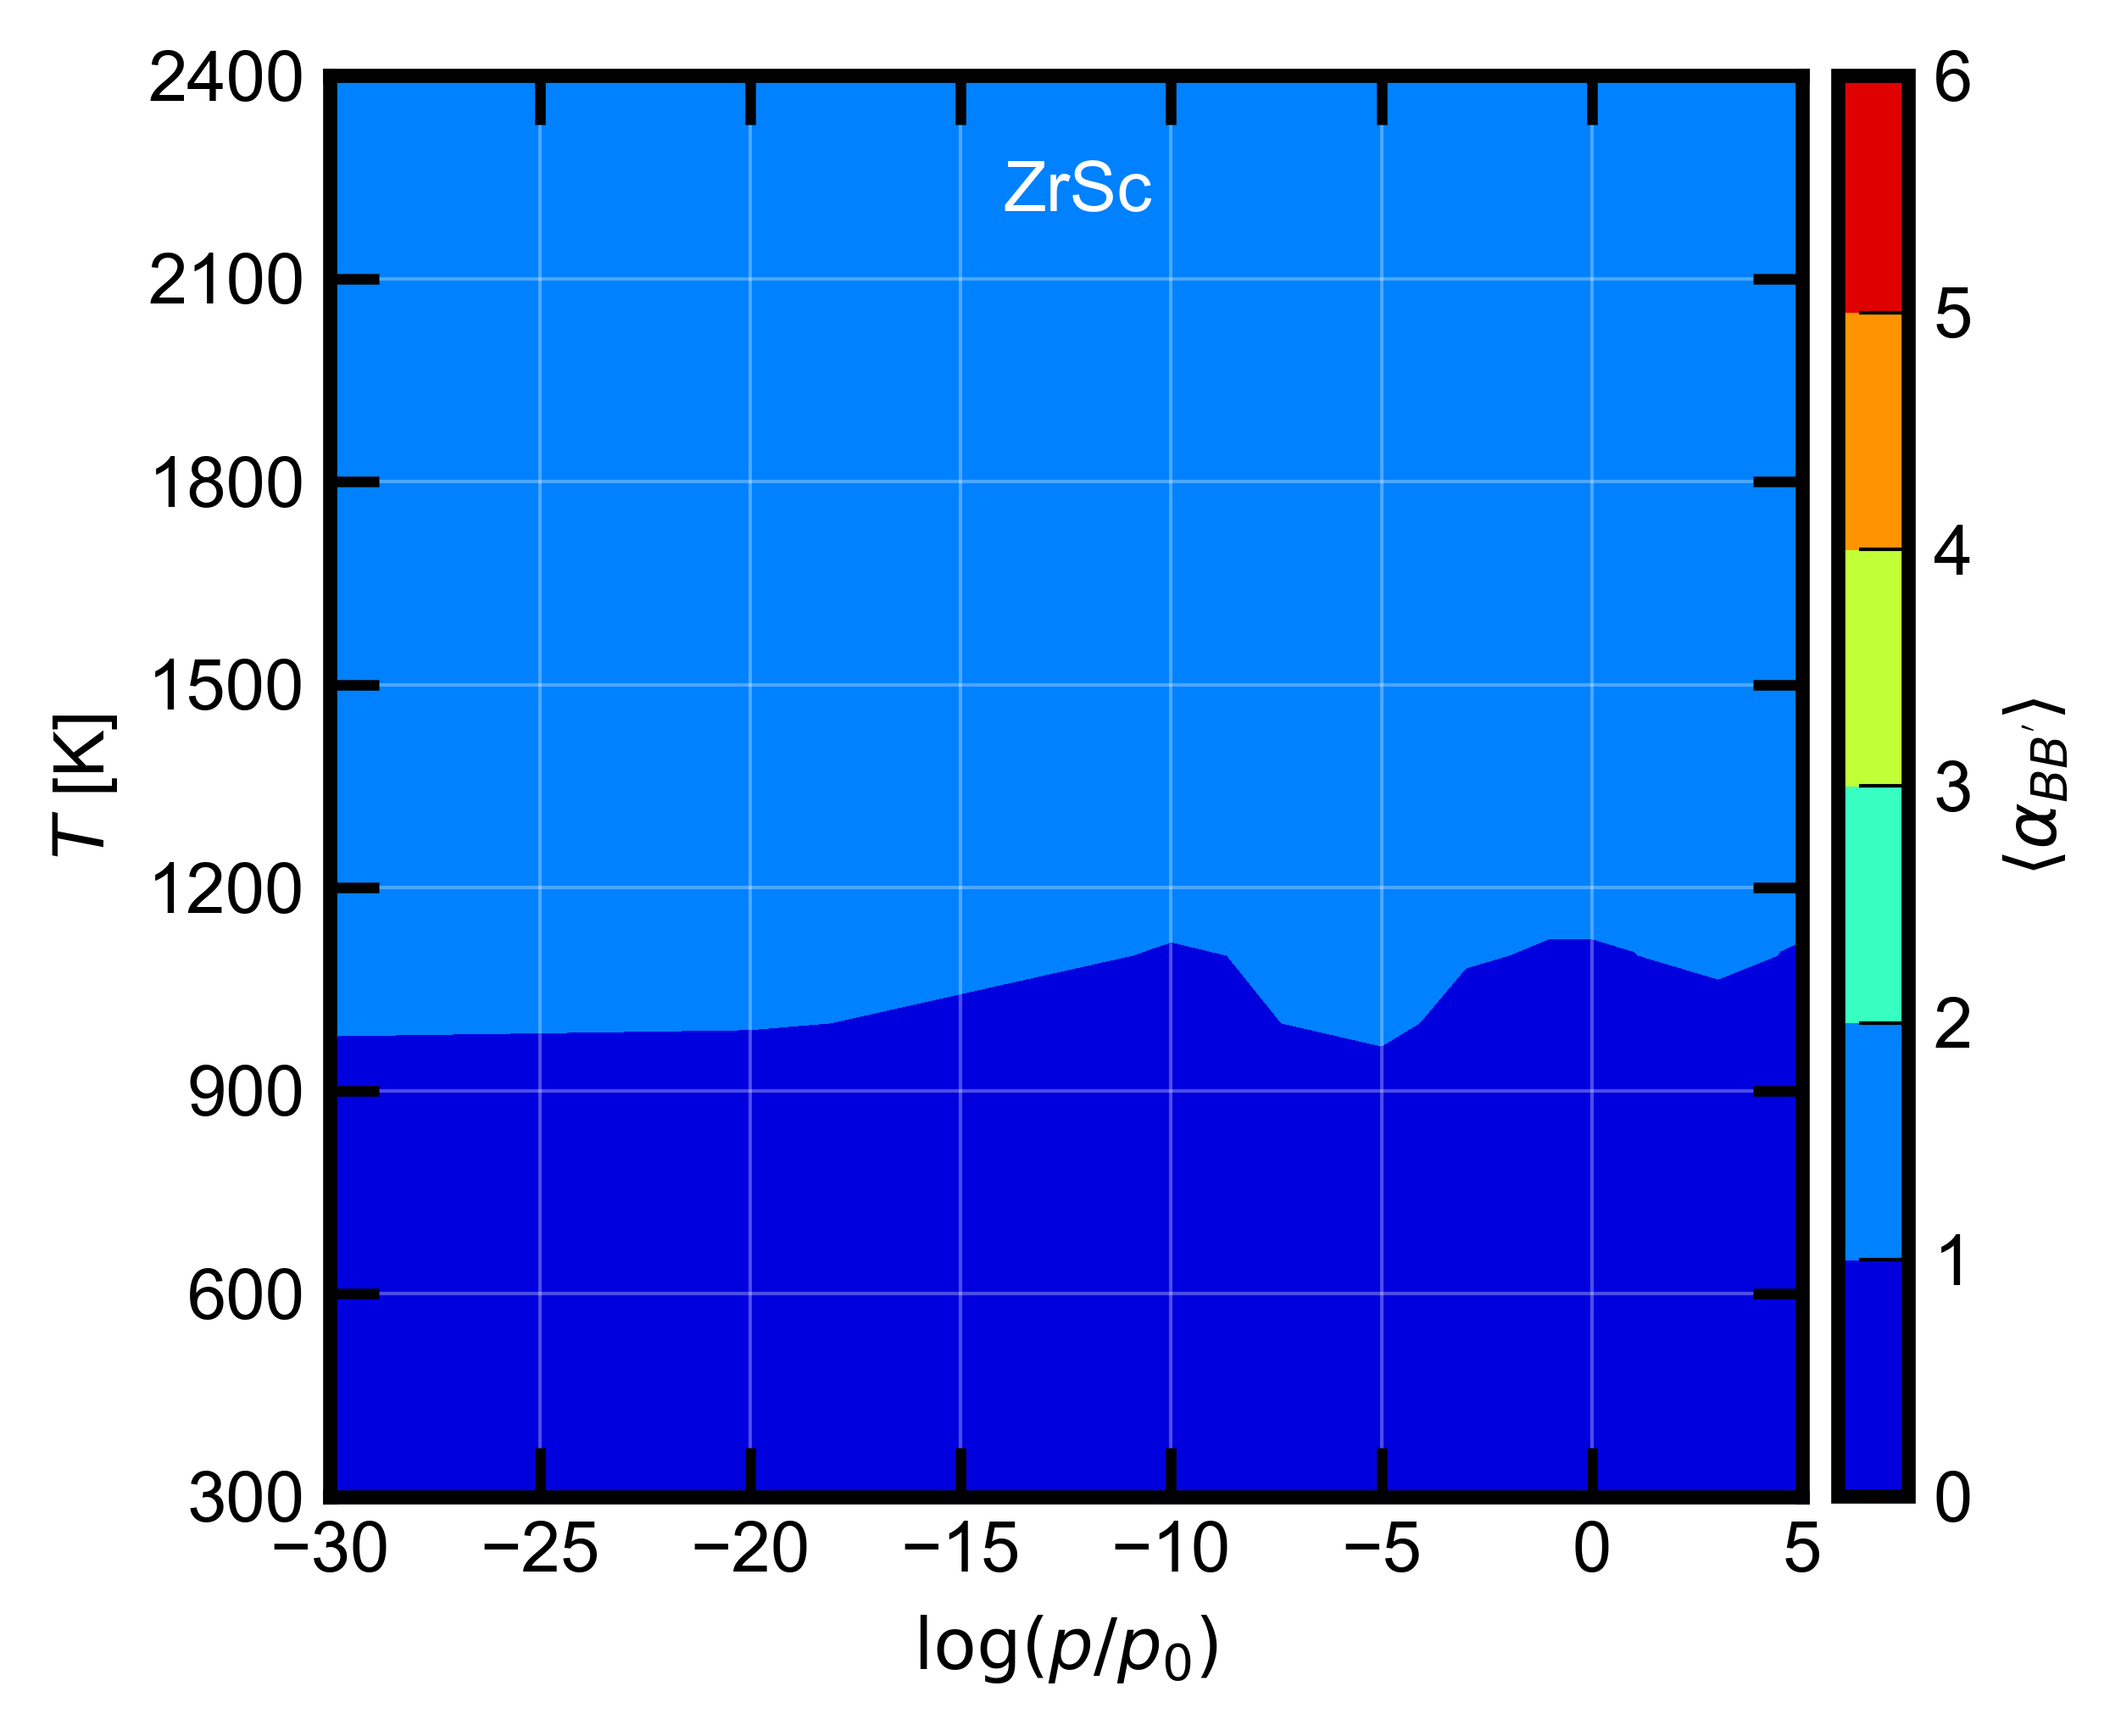

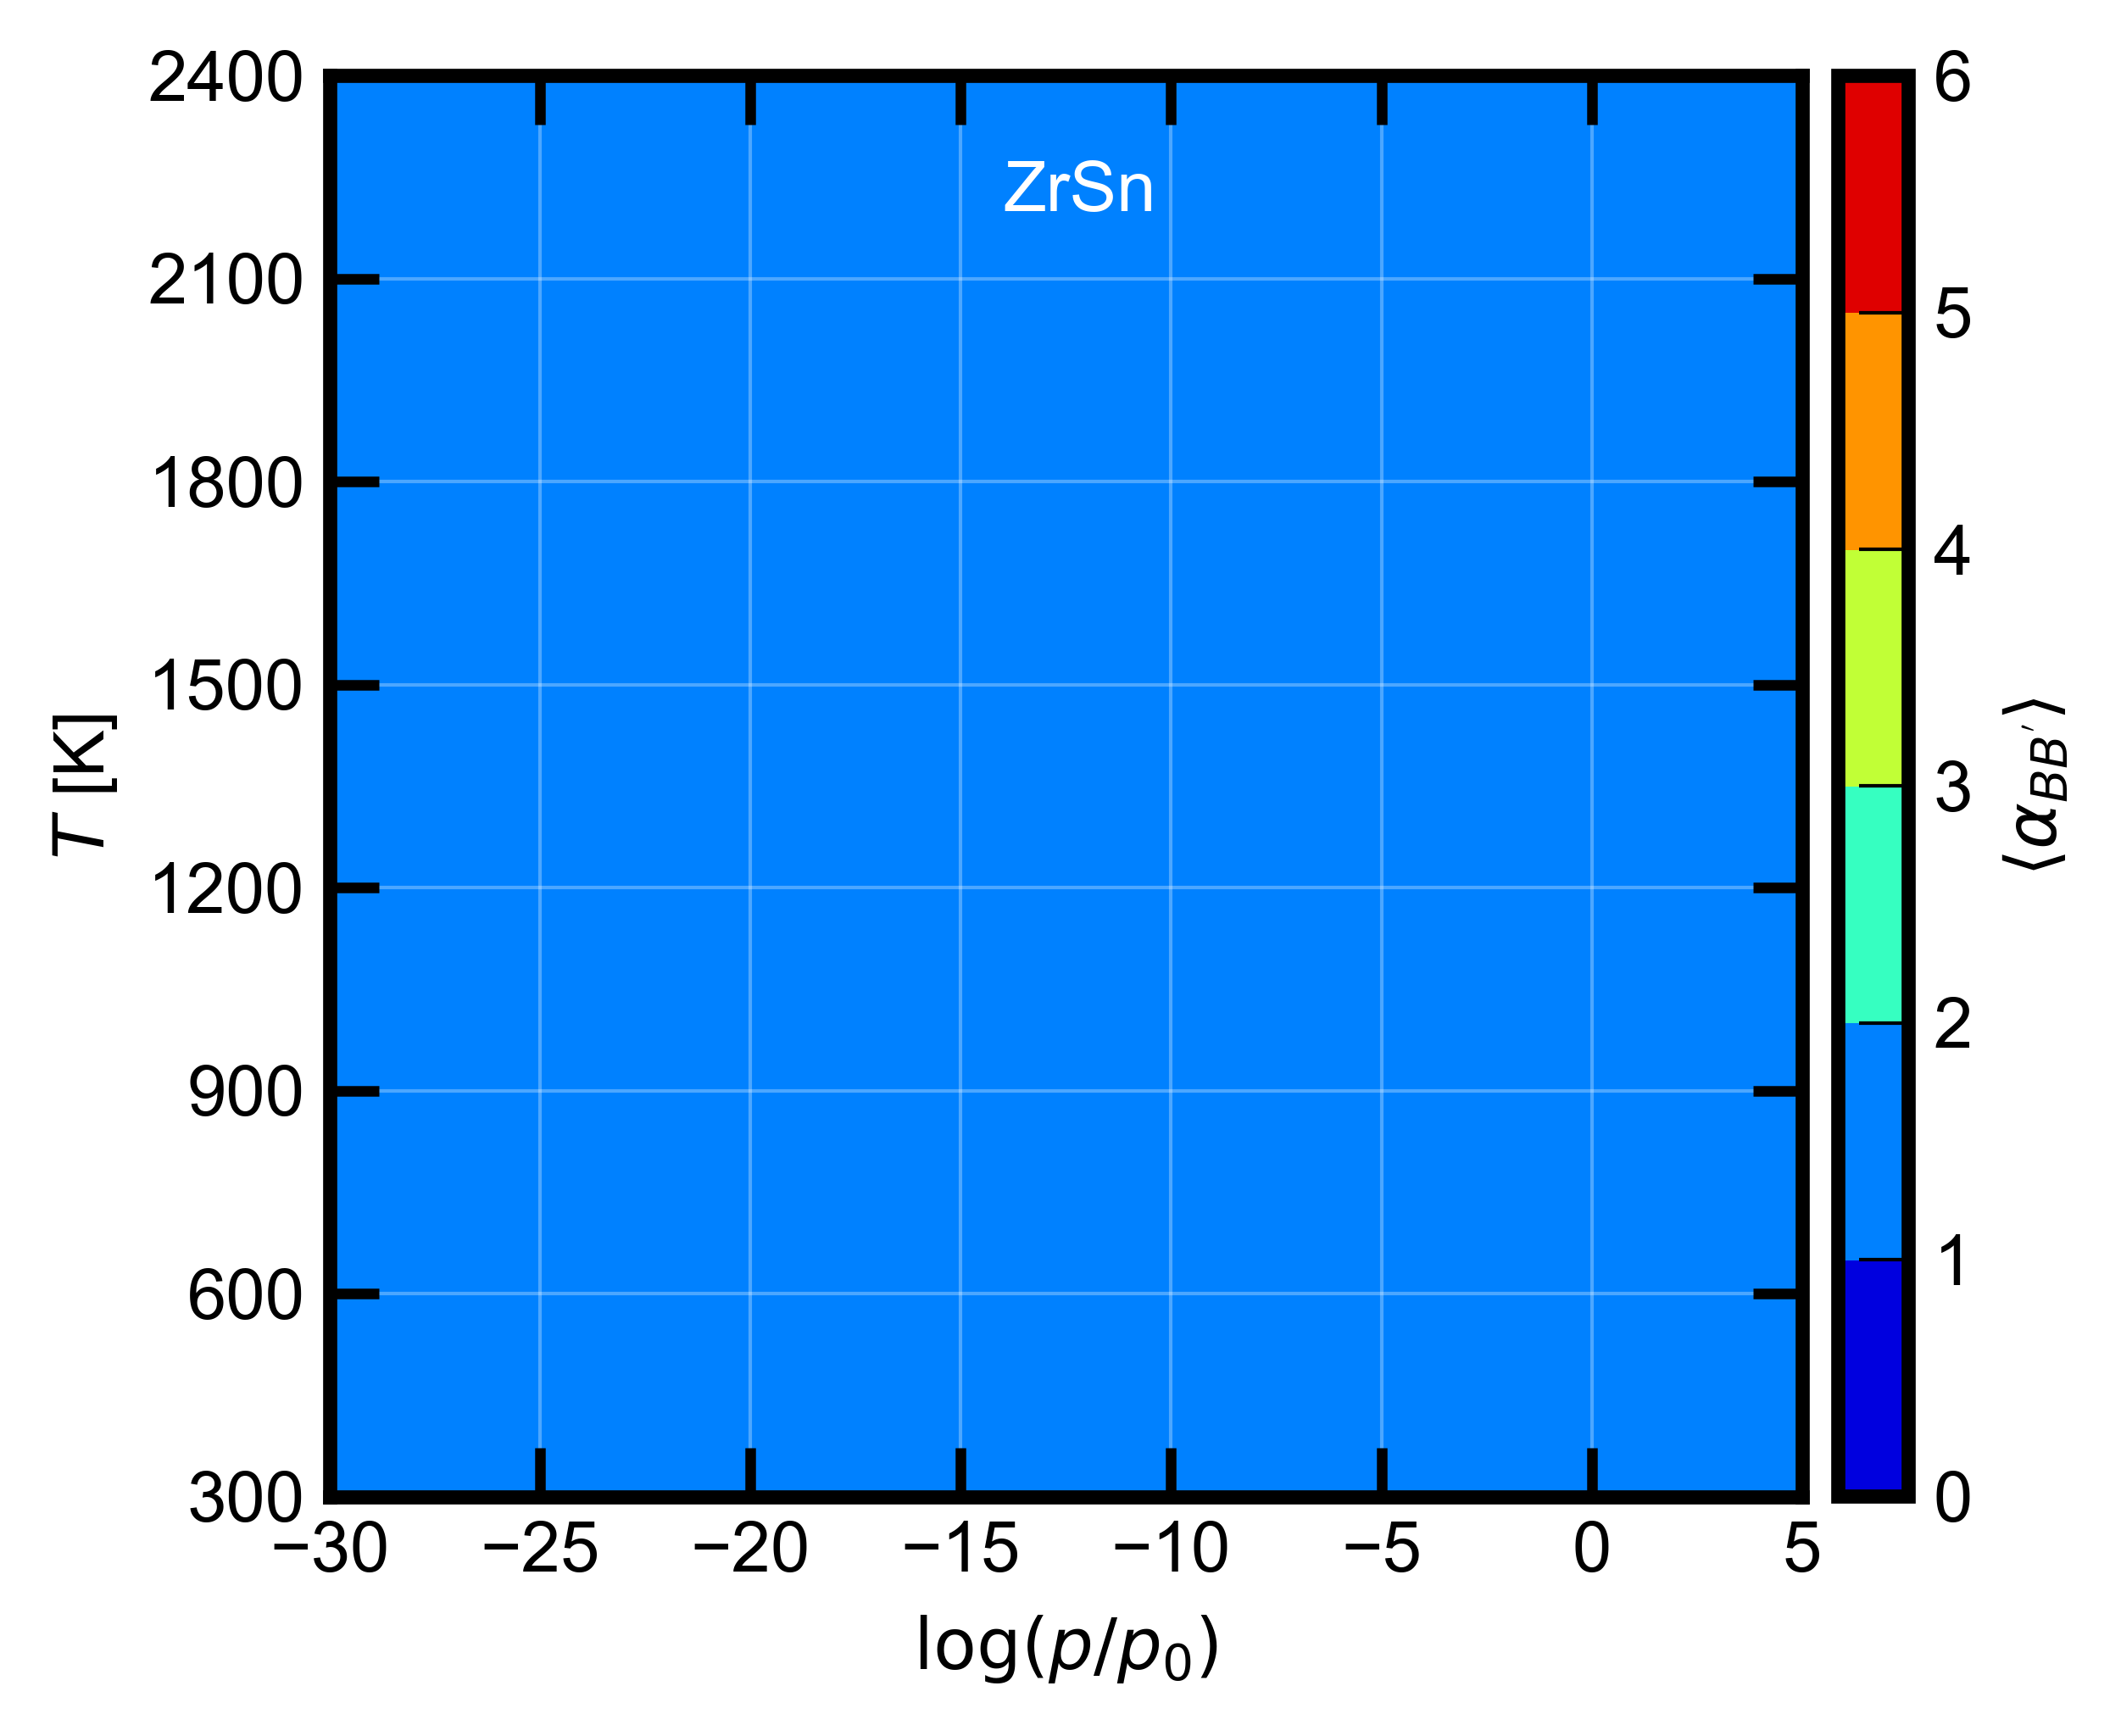

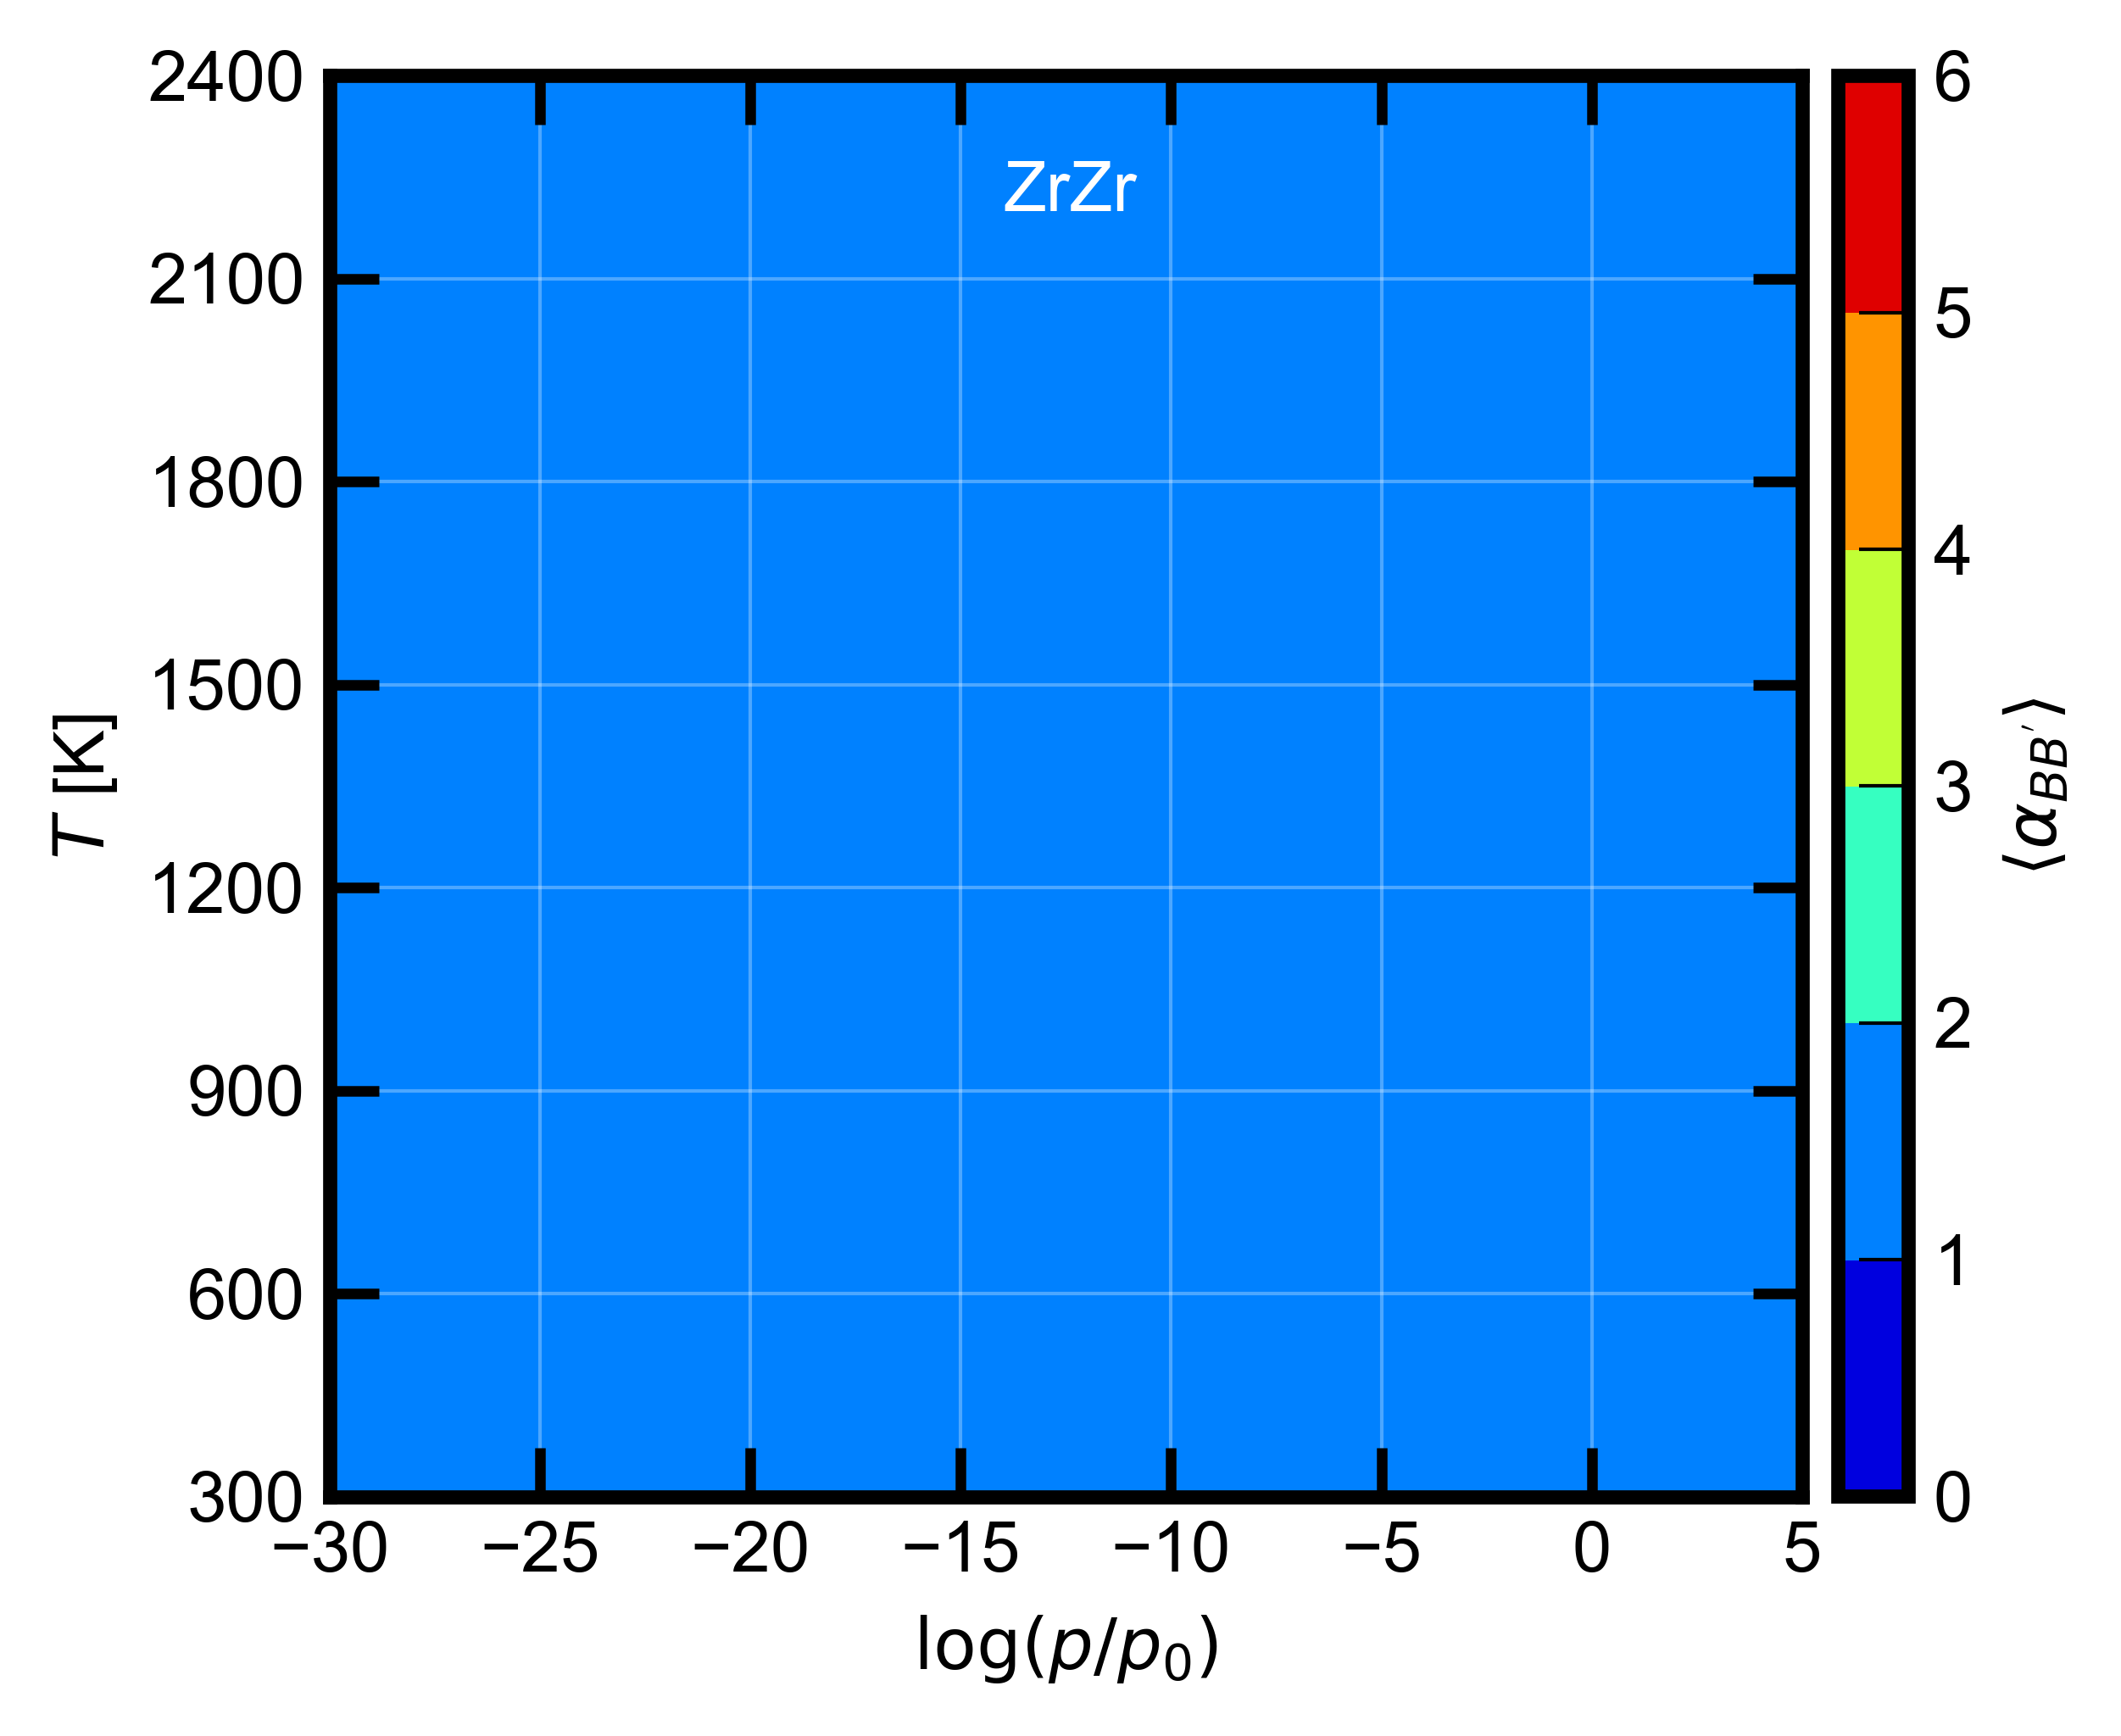

In [4]:
rcParams['axes.linewidth']   = 2
rcParams['figure.figsize']   = 4.5,3.7
rcParams['figure.dpi']       = 600

eMin=0
eMax=6 #1.6
eDiff=1

for it,val in enumerate(Z_short):
    Z=val*6
    levels=np.arange(eMin,eMax+eDiff,eDiff)
    ax=plt.axes()
    CTF=plt.contourf(X,Y,Z,levels,cmap='jet',vmin=eMin,vmax=eMax) #cmap='jet'
    plt.xlabel('$\mathrm{log}(p/p_0)$')
    plt.ylabel('$T$ [K]')
    #ax.set_yscale('log')
    plt.ylim(300,2400)
    plt.yticks(np.arange(300,2500,300))
    plt.xticks(np.arange(-30,10,5))
    plt.text(-14,2200,TCOl[it],color='W')
    ax.xaxis.grid(True, linewidth=0.5, alpha=0.3,color='w')
    ax.yaxis.grid(True, linewidth=0.5, alpha=0.3,color='w')
    plt.tick_params(labeltop=False, labelright=False, 
                    bottom=True, top=True, left=True, right=True, 
                    axis='both',direction='in')
    plt.colorbar(orientation='vertical',
                     ticks=levels,
                     spacing='uniform',
                     pad=0.02,
                     shrink=1,#norm=norm,
                     label="$\\langle \\alpha_{BB^{'}} \\rangle$").ax.tick_params(axis='y', direction='in',width=0.5)
    CS=plt.contour(np.log10(Y),X,Z,levels,colors=('k',),linestyles=('-.','--'),vmin=eMin,vmax=eMax) #vmin=0.0,vmax=1.4,
    ax.clabel(CS, inline=1, fontsize=10)
    plt.clim(eMin, eMax)
    plt.show()

In [5]:
np.array([10,20,30,40,50])/np.array([1,2,3,4,5])

array([10., 10., 10., 10., 10.])